# Countng readings
In this notebook we will try to extract  electric meters that have an uniform number of readings during their period analysis

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

## Reading csv

In [4]:
file_name1 = dir_origen_csv + "Data_limpia_windows.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df["fecha"] =  pd.to_datetime(df["fecha"]) #transforming "fecha" to datetime

## General counting

### Number of meters

In [5]:
df["medidor"].nunique()

112

### Number of readings per meter

In [6]:
df["medidor"].value_counts()

58706656    2947
52073163    1392
15029977     736
15029846     726
20037228     722
58706706     721
15029835     719
15842894     718
16951216     716
16951175     715
16951221     714
16567743     713
16951176     713
16951203     712
15842885     711
16951181     711
16567753     710
16951209     710
15029844     710
16951220     708
16951205     706
16951201     703
16567760     701
20037214     701
15029847     701
16567746     700
16951206     699
16567761     699
16951222     698
16951177     697
            ... 
53307830     360
59814806     360
52071420     360
58706663     359
35924882     358
52073359     357
52071428     356
52073331     356
35924864     356
58706634     355
41175730     355
52073348     348
35947180     346
28006904     346
53307871     344
52071447     342
52073201     341
58706740     339
58706704     333
52073382     332
35924866     331
35925291     331
52073290     327
58706662     315
52073198     312
58706713     286
52071455     275
58706709     2

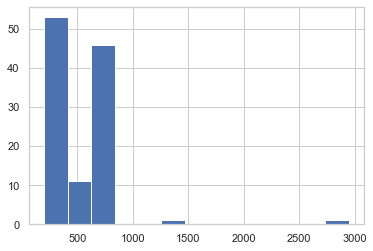

In [7]:
plt.figure()
df["medidor"].value_counts().hist(bins = 13)

### Histogram #Readings per day of Month (0 -> 30)
(be careful if is there are more than one month in your dataset)

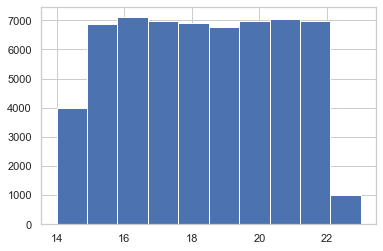

In [8]:
df["dayMonth"].hist()

## Individual graphs

### Number of readings per day of Month

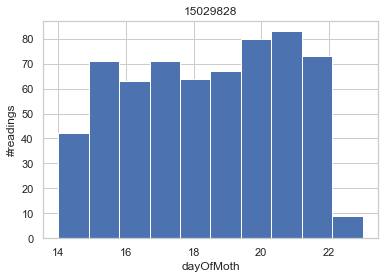

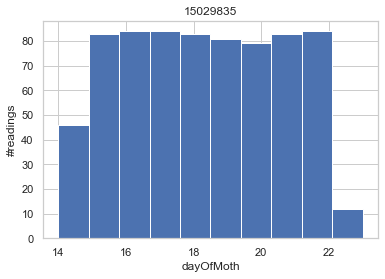

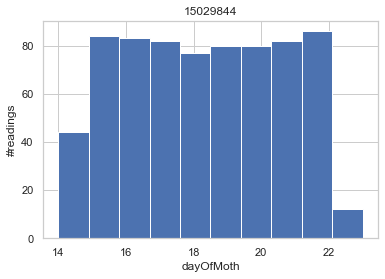

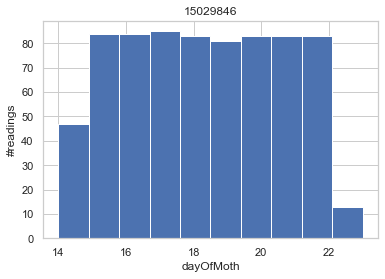

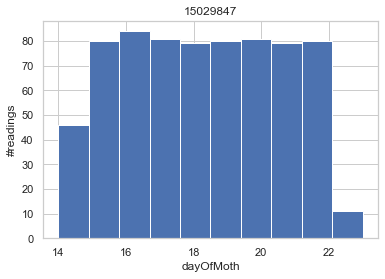

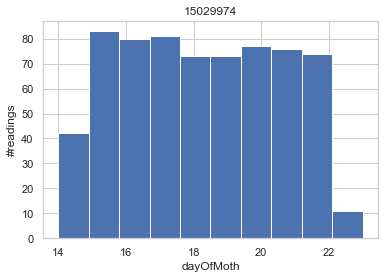

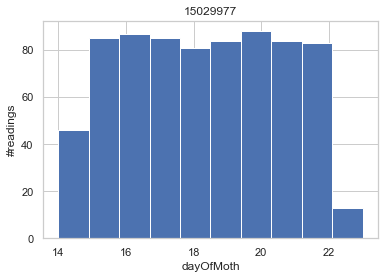

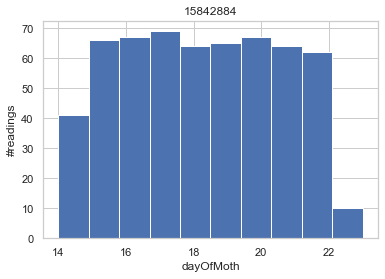

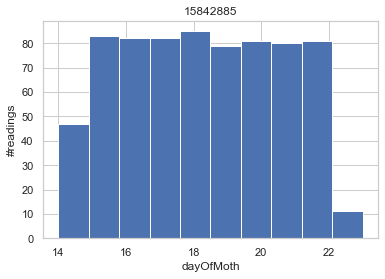

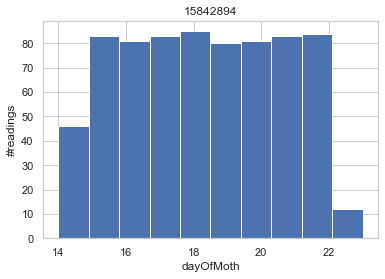

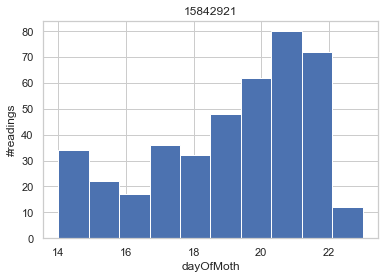

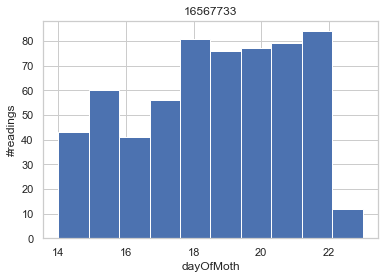

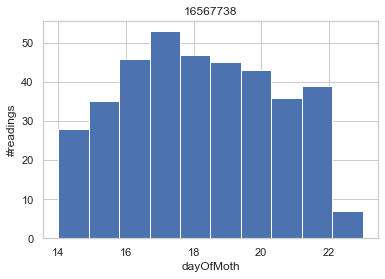

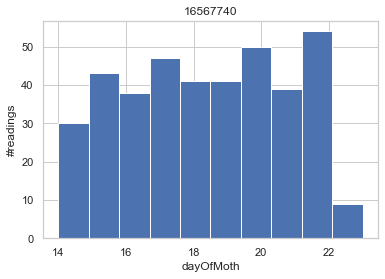

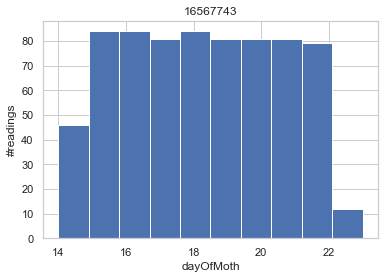

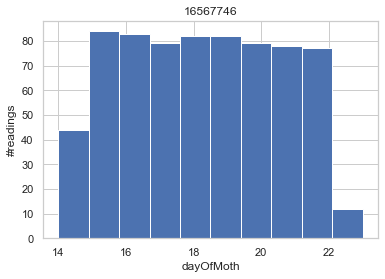

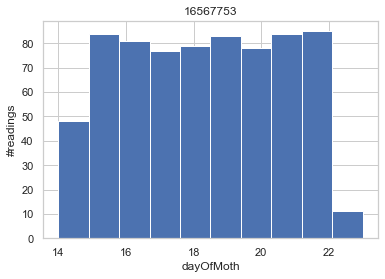

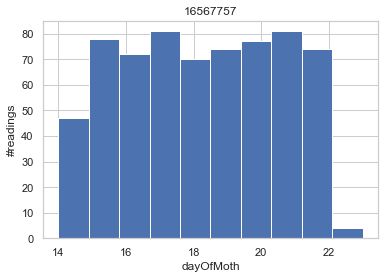

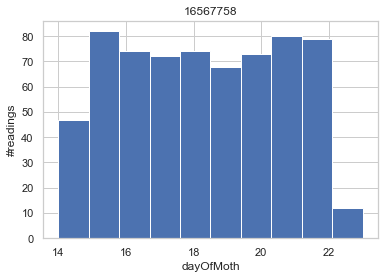

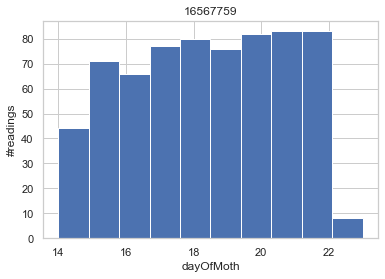

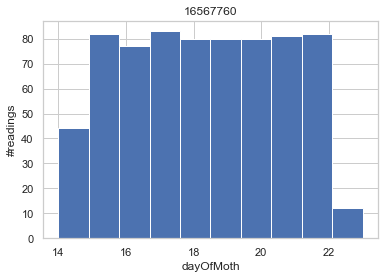

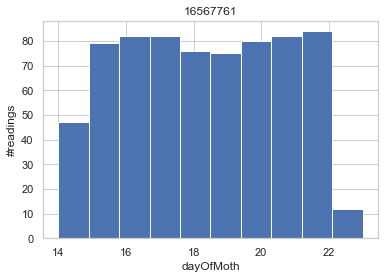

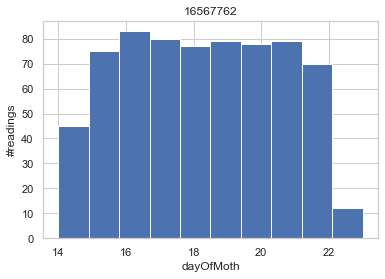

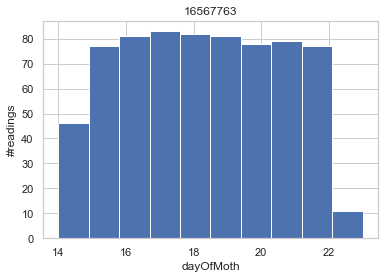

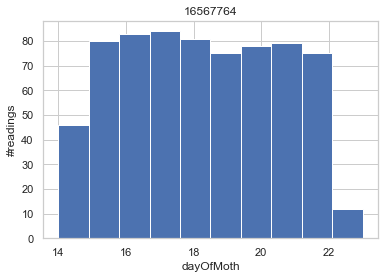

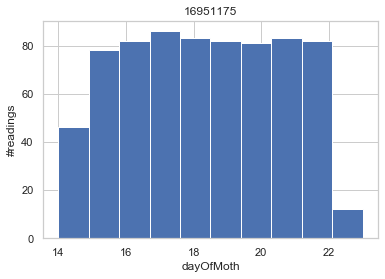

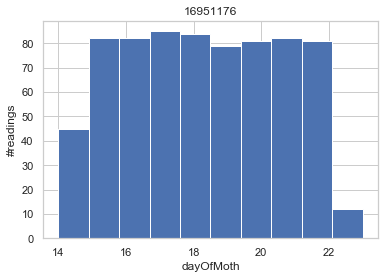

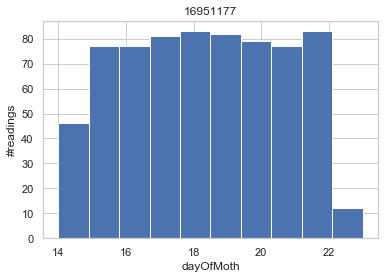

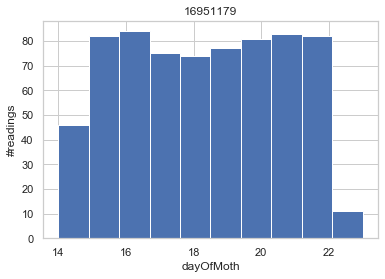

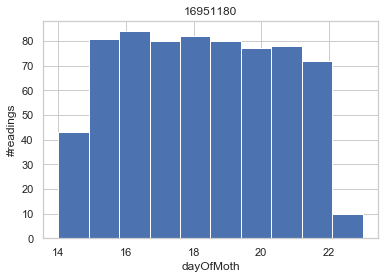

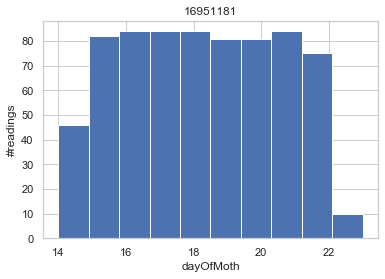

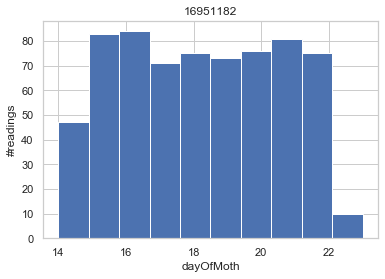

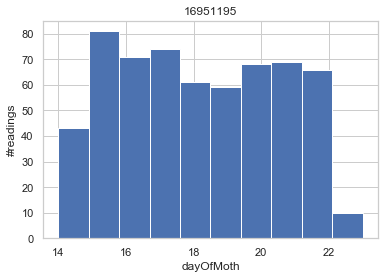

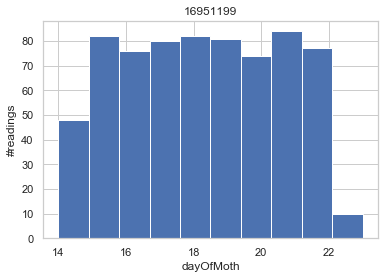

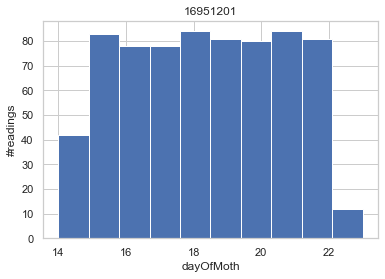

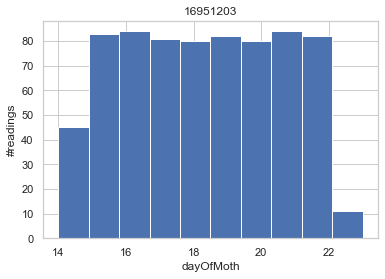

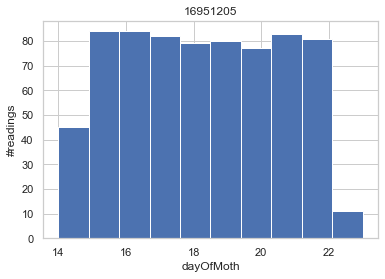

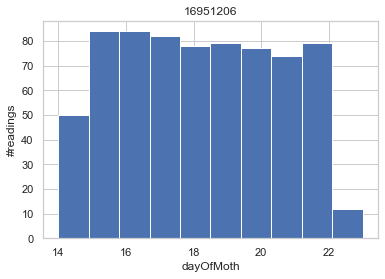

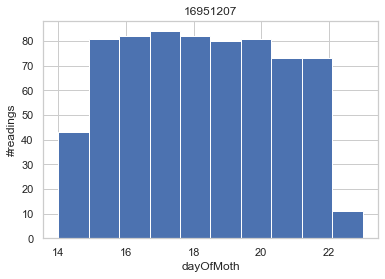

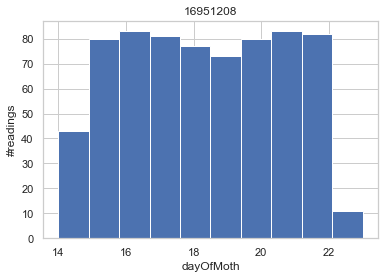

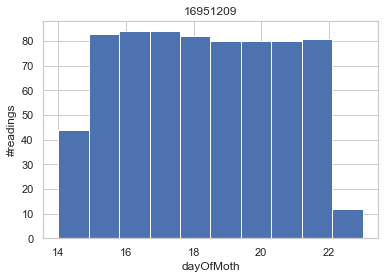

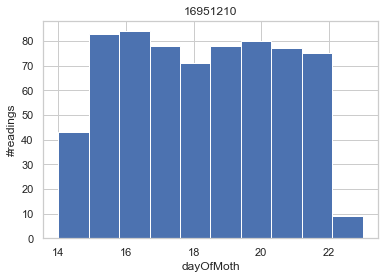

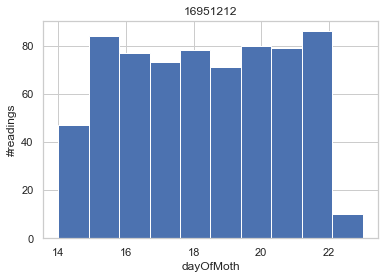

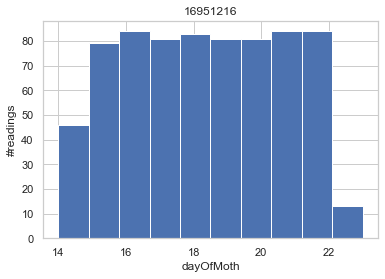

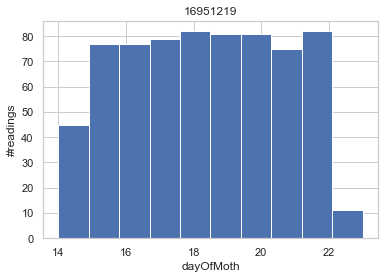

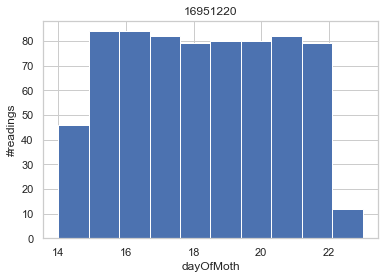

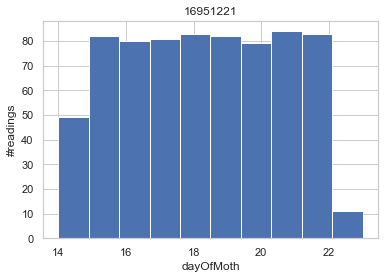

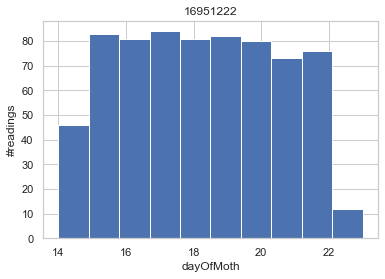

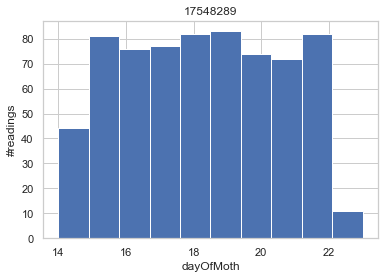

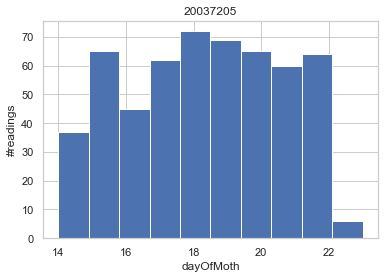

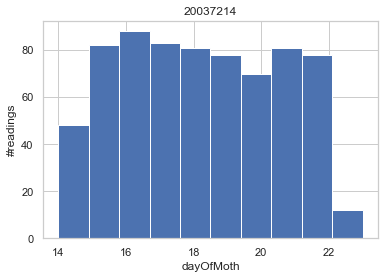

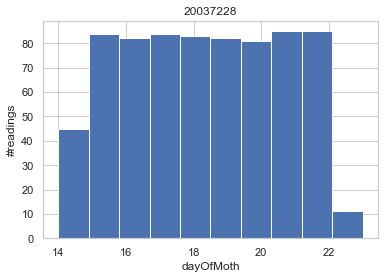

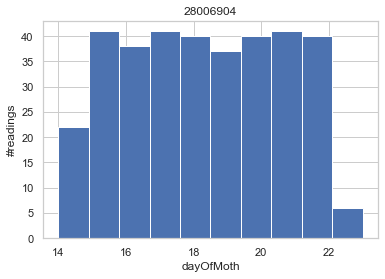

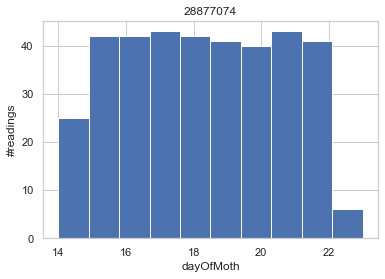

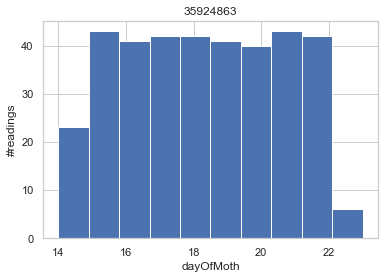

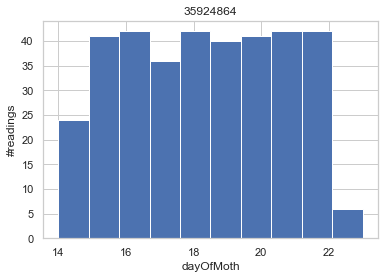

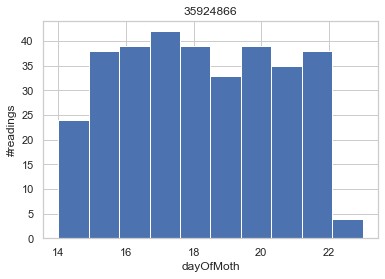

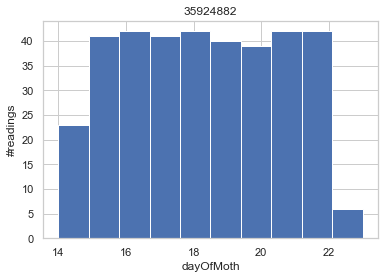

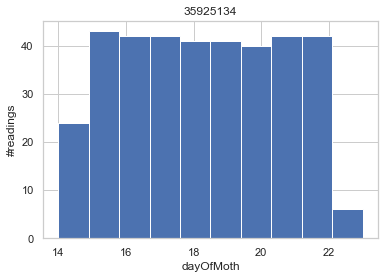

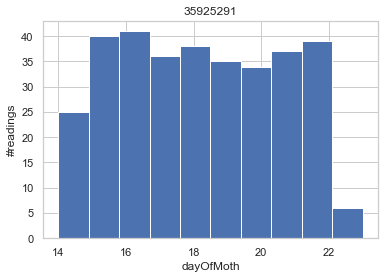

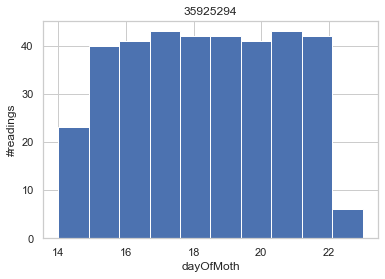

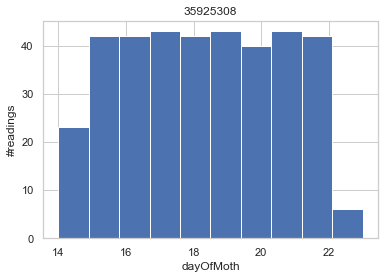

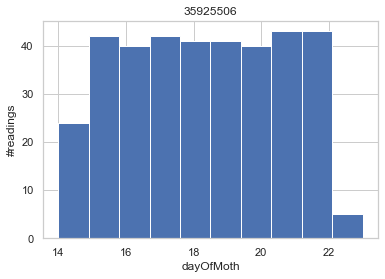

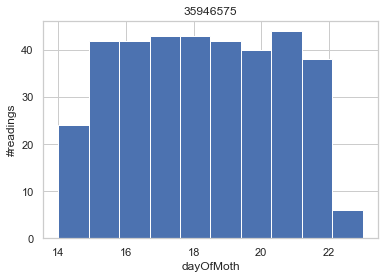

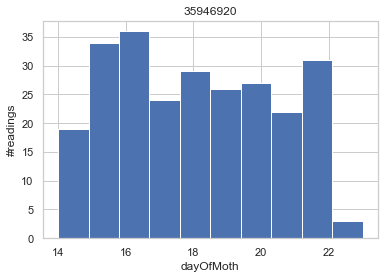

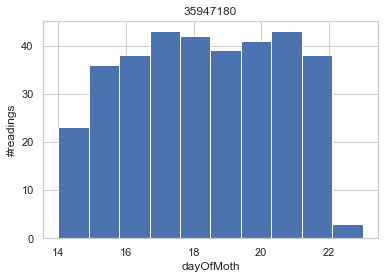

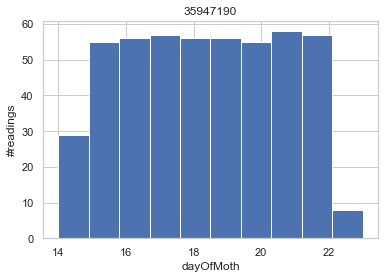

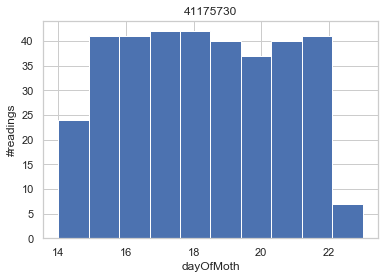

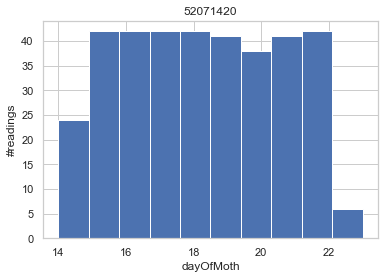

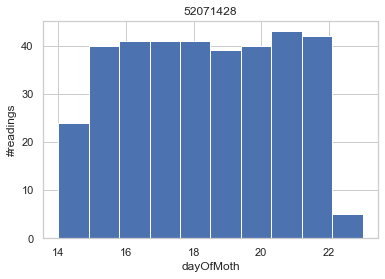

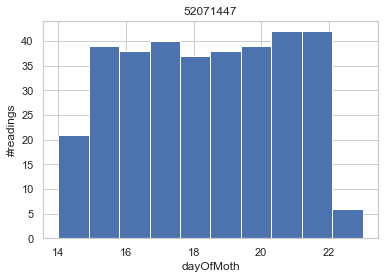

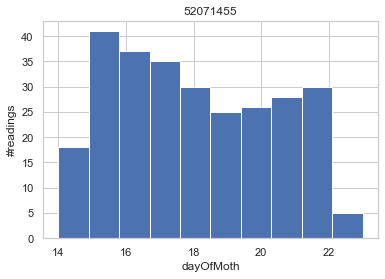

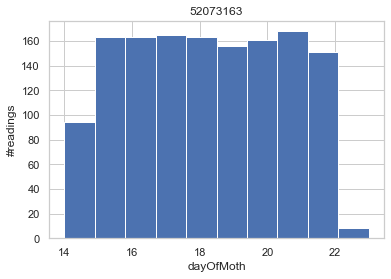

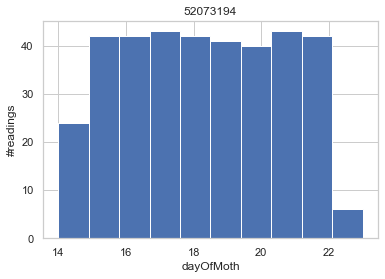

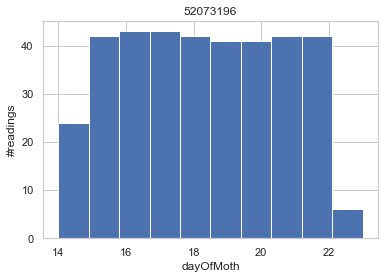

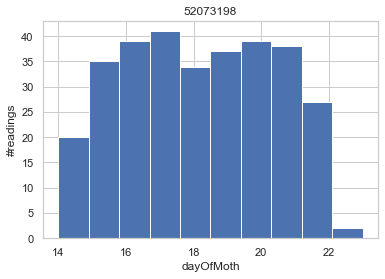

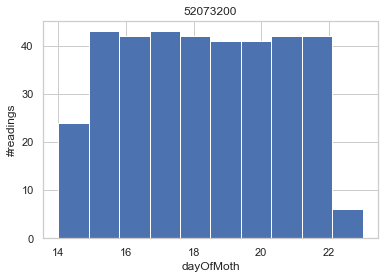

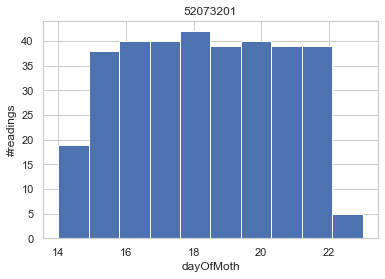

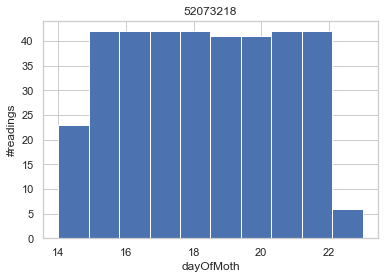

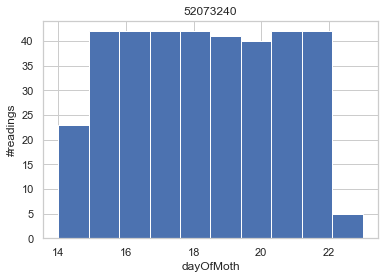

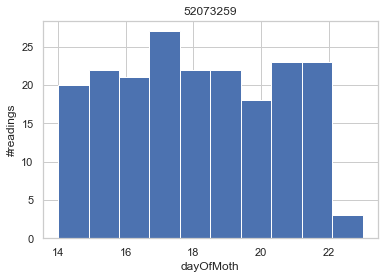

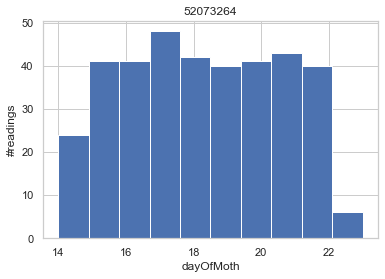

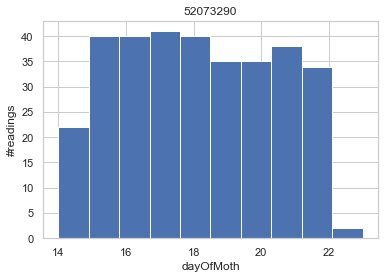

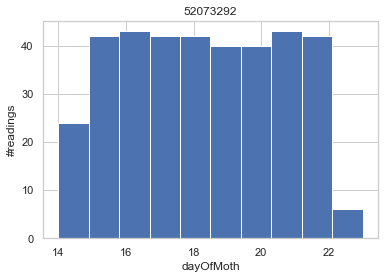

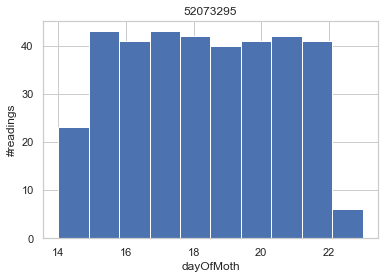

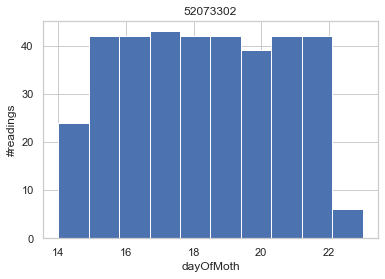

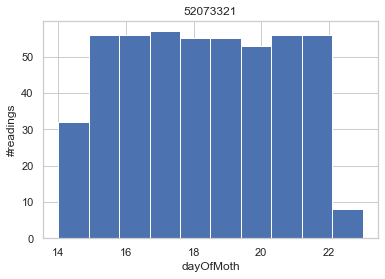

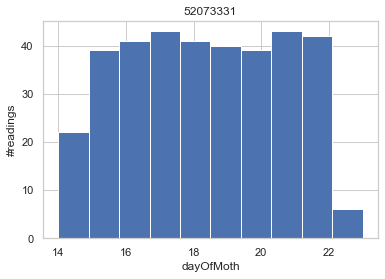

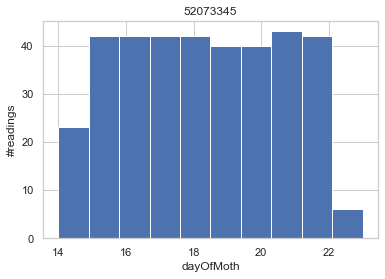

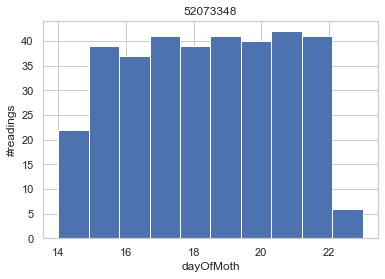

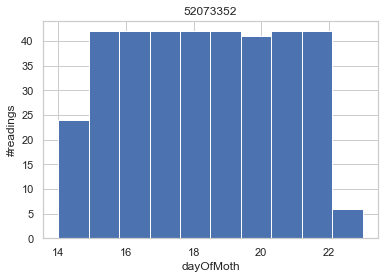

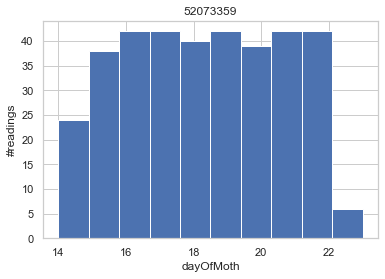

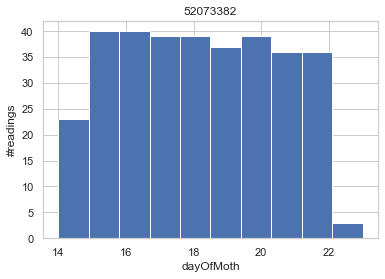

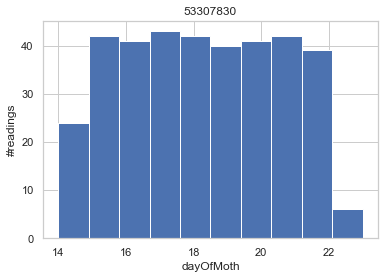

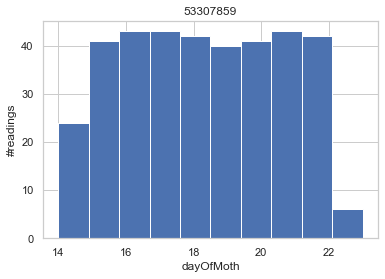

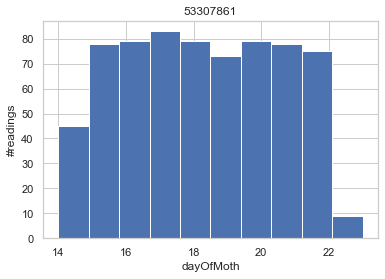

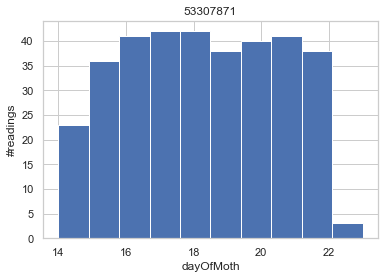

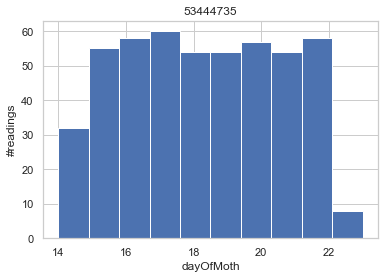

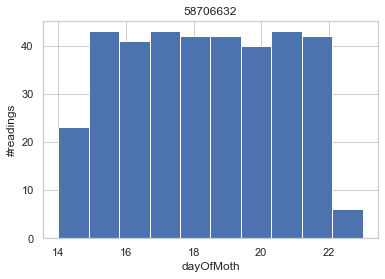

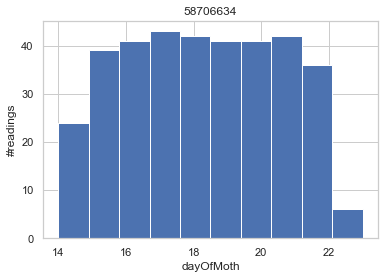

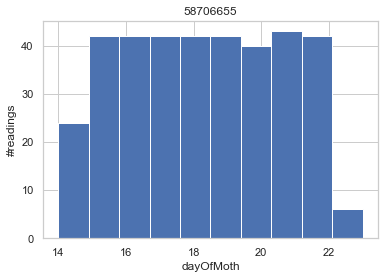

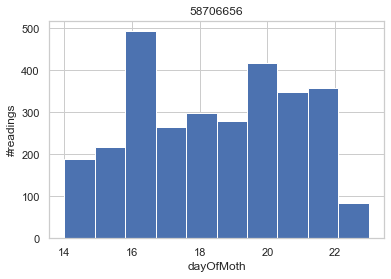

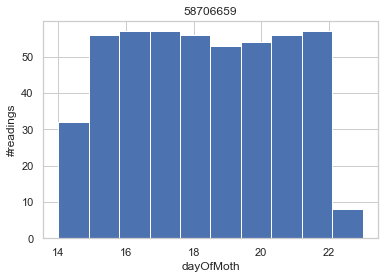

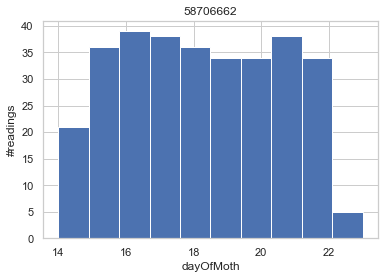

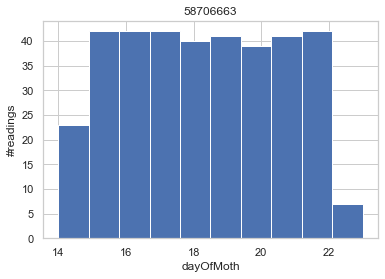

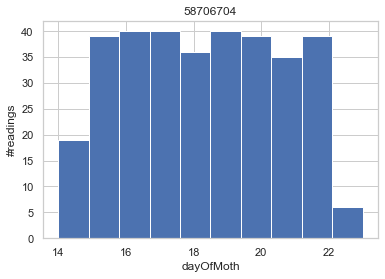

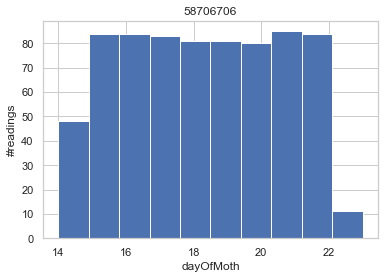

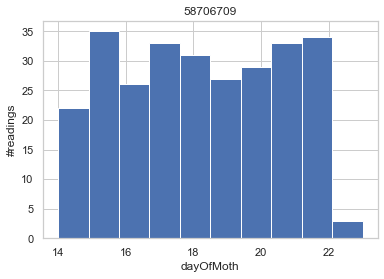

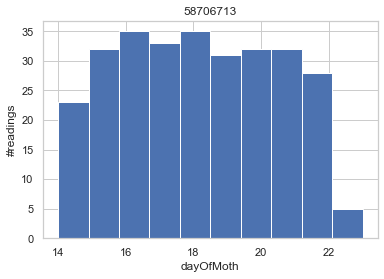

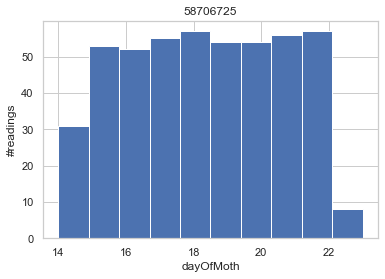

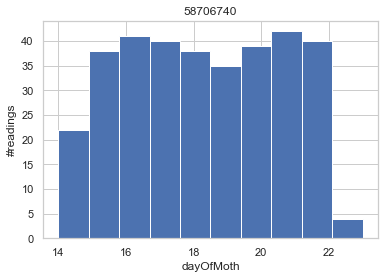

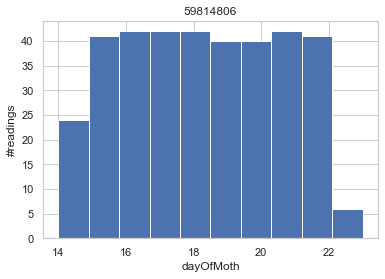

In [9]:

with PdfPages(dir_export + "Number of readings per day of Month _windows.pdf") as pdf:

    for n,g in df.groupby("medidor")["dayMonth"]:
        fig = plt.figure()
        plt.title(n)
        plt.xlabel("dayOfMoth")
        plt.ylabel("#readings")
        g.hist()
        pdf.savefig(fig)

In [9]:
'''
def unique(df):
    a_month =df["fecha"].apply(lambda x: x.day)
    a_month =df["fecha"].apply(lambda x: x.month)

    b = df["fecha"].shift()
    b_day = b.apply(lambda x: x.day)
    b_month = b.apply(lambda x: x.month)
    diff = ((a_month != b_month) | (a_month != b_day))     
    count = -1
    before = 0
    serie = []
    for i in diff:
        if (count == -1):
            before = i
            count +=1
        else:
            if (i != before):
                count += 1
            before = i
            serie.append(count)
    dataframe = pd.DataFrame(serie)
    return dataframe

for n,g in df.groupby("medidor"):
    reading_per_day = unique(df)
    figure = plt.figure()
    reading_per_day.hist()
'''

'\ndef unique(df):\n    a_month =df["fecha"].apply(lambda x: x.day)\n    a_month =df["fecha"].apply(lambda x: x.month)\n\n    b = df["fecha"].shift()\n    b_day = b.apply(lambda x: x.day)\n    b_month = b.apply(lambda x: x.month)\n    diff = ((a_month != b_month) | (a_month != b_day))     \n    count = -1\n    before = 0\n    serie = []\n    for i in diff:\n        if (count == -1):\n            before = i\n            count +=1\n        else:\n            if (i != before):\n                count += 1\n            before = i\n            serie.append(count)\n    dataframe = pd.DataFrame(serie)\n    return dataframe\n\nfor n,g in df.groupby("medidor"):\n    reading_per_day = unique(df)\n    figure = plt.figure()\n    reading_per_day.hist()\n'

### Frequency number of readings: barplot

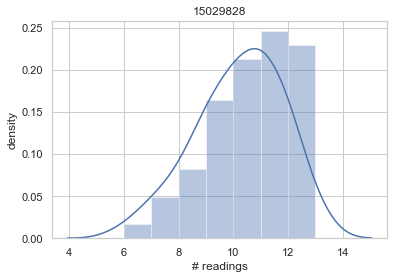

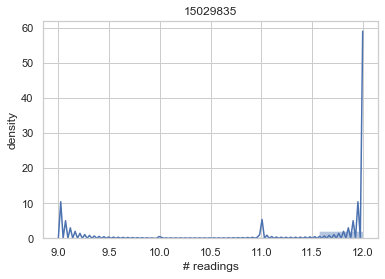

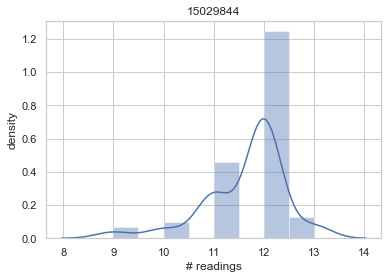

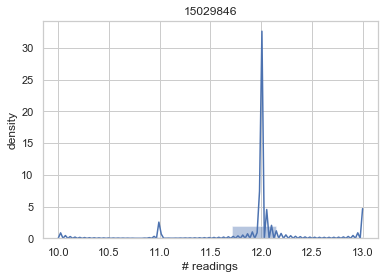

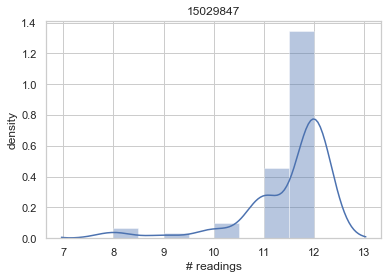

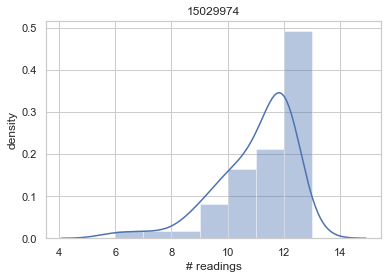

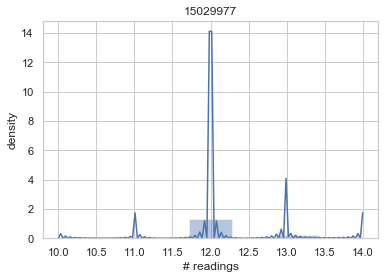

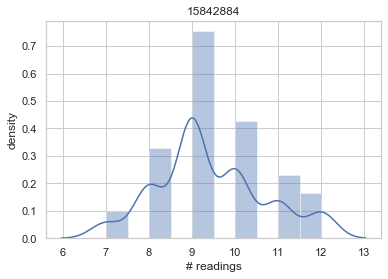

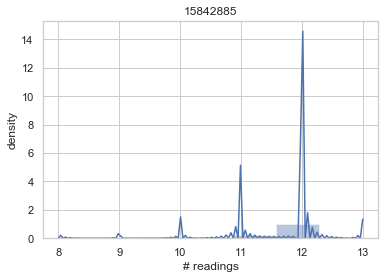

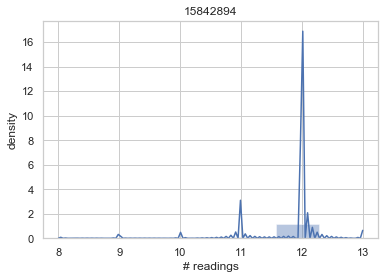

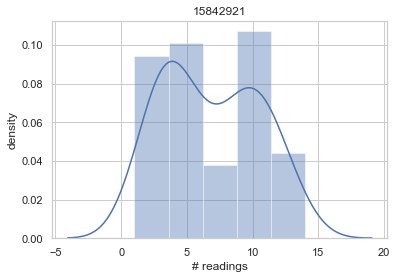

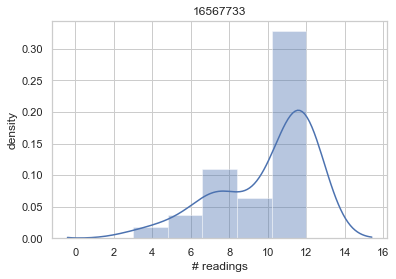

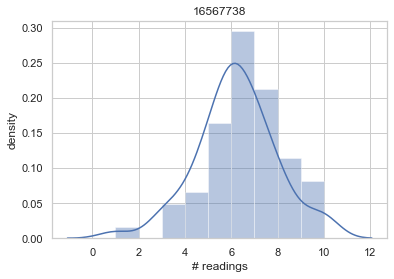

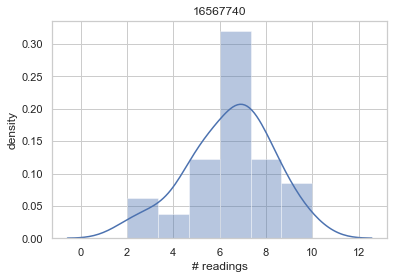

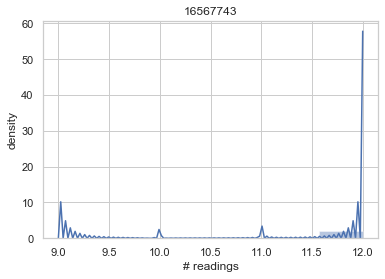

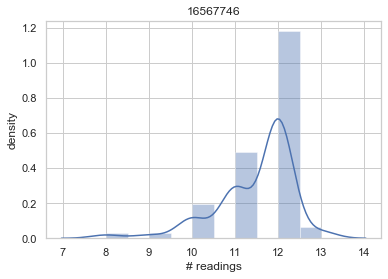

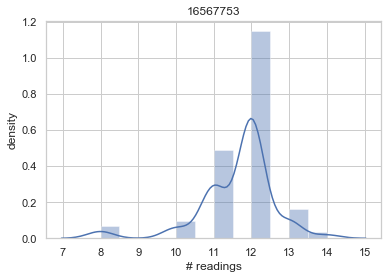

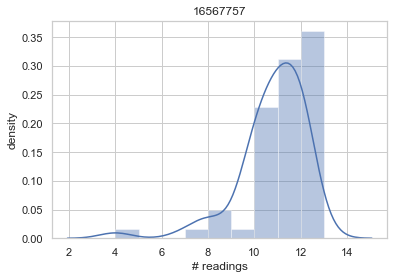

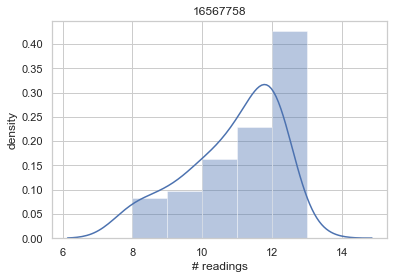

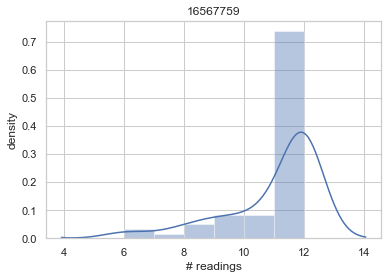

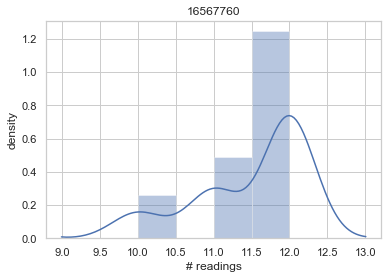

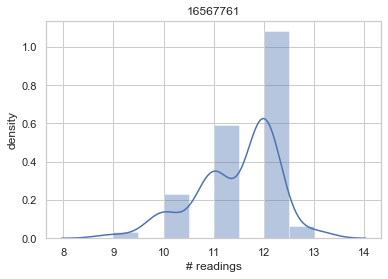

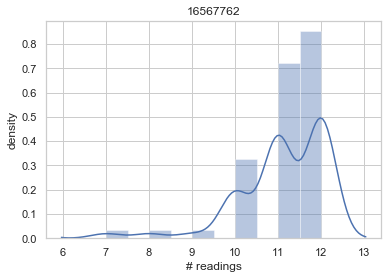

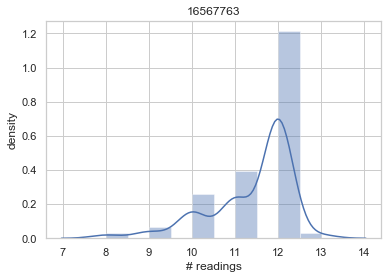

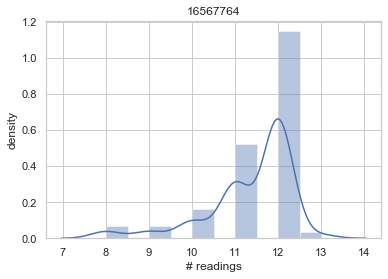

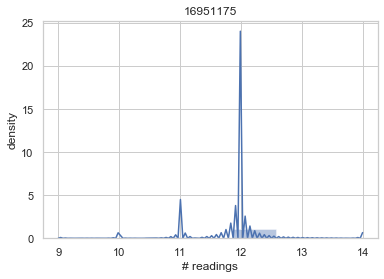

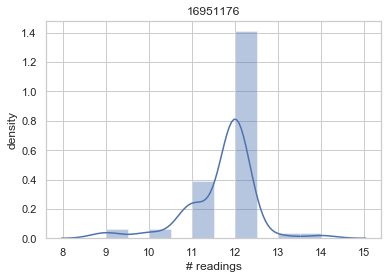

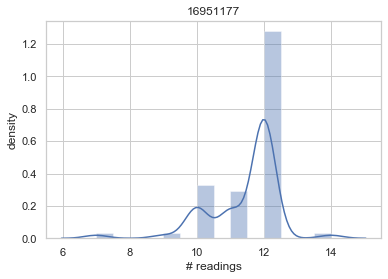

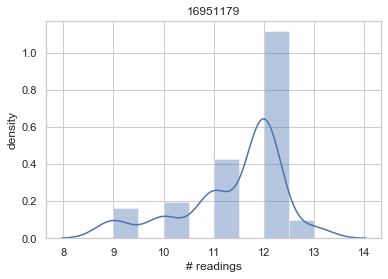

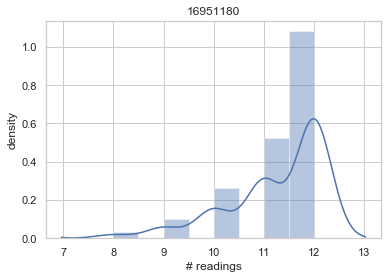

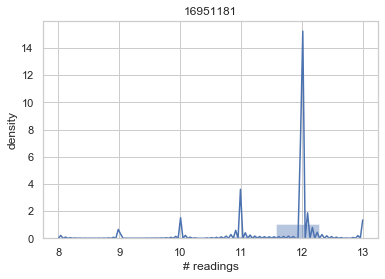

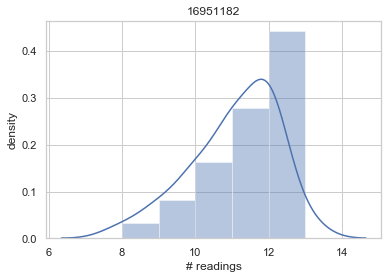

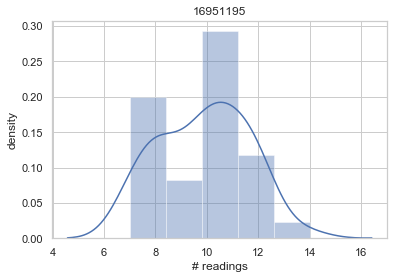

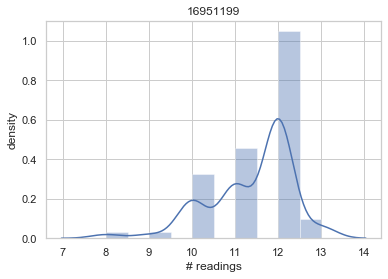

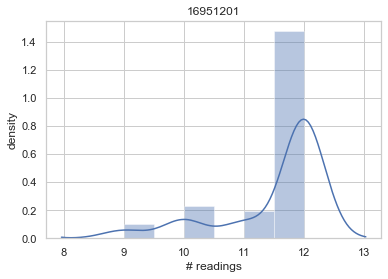

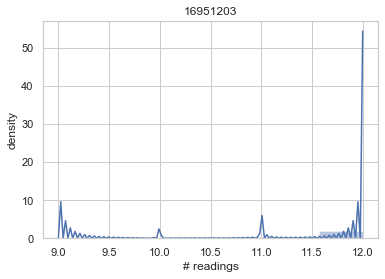

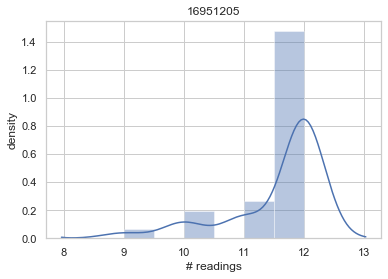

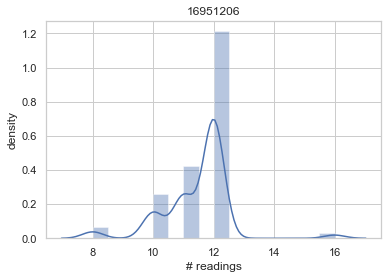

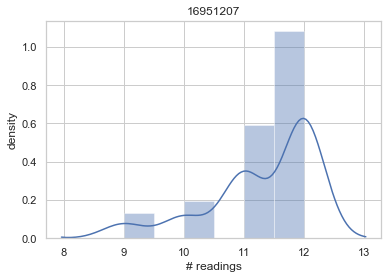

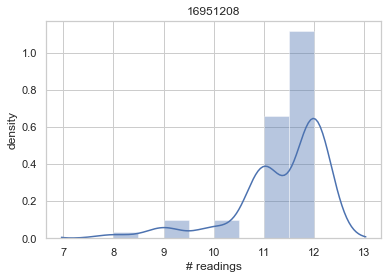

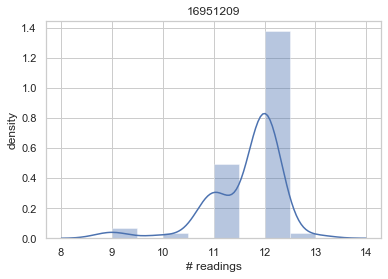

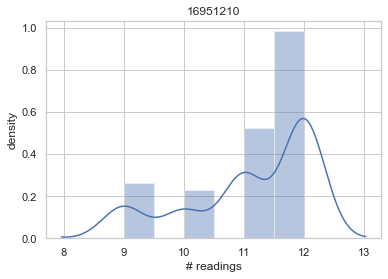

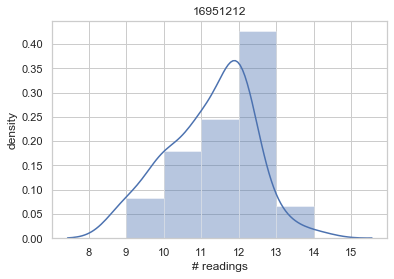

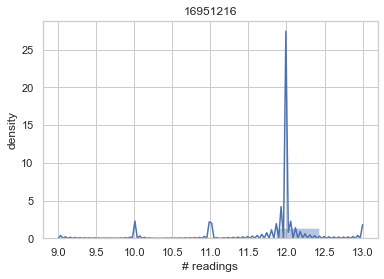

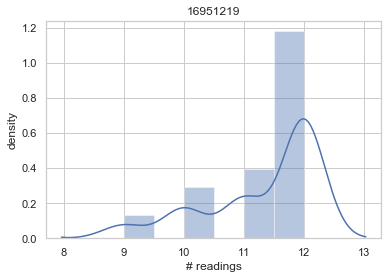

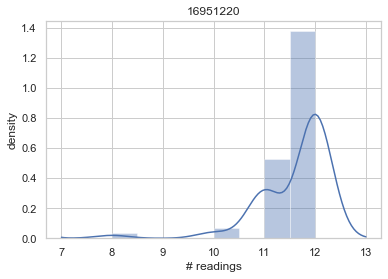

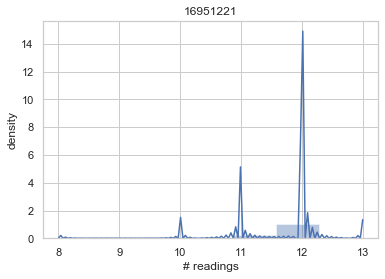

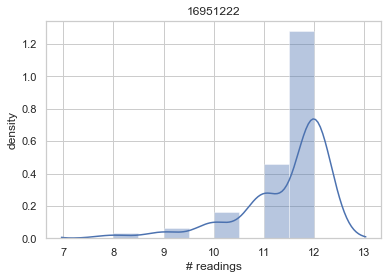

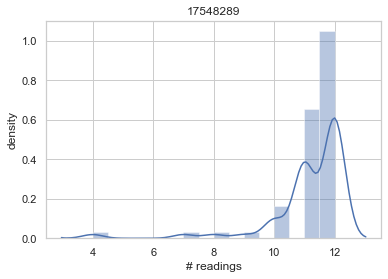

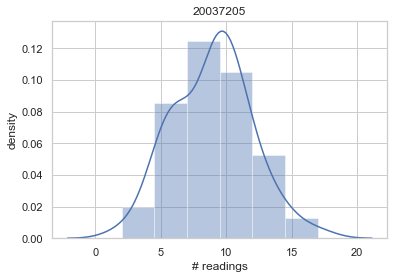

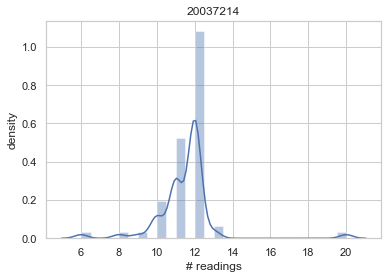

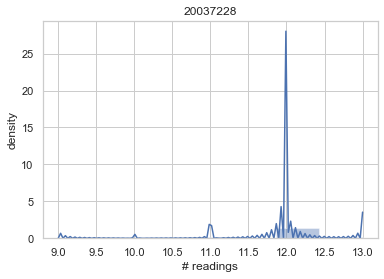

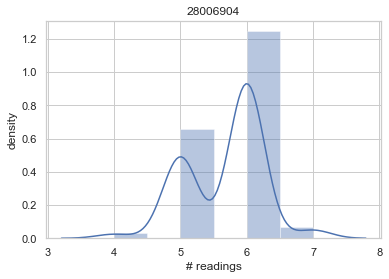

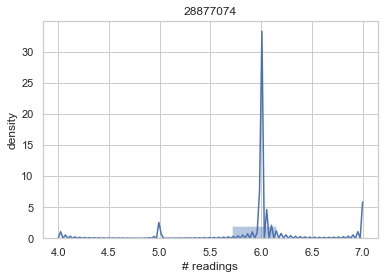

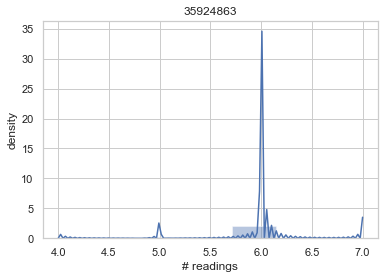

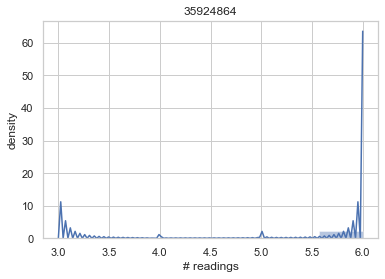

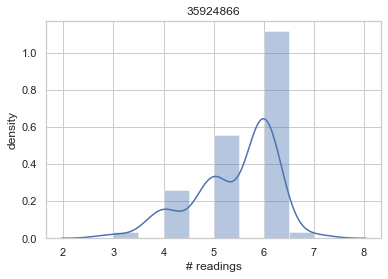

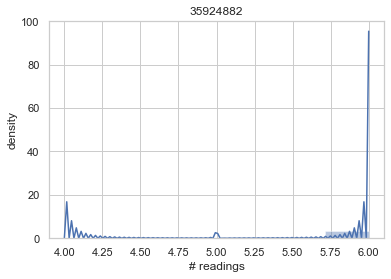

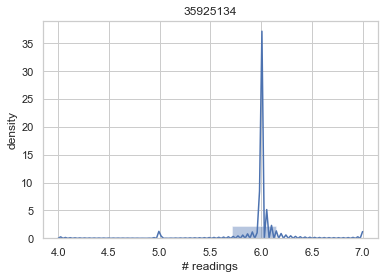

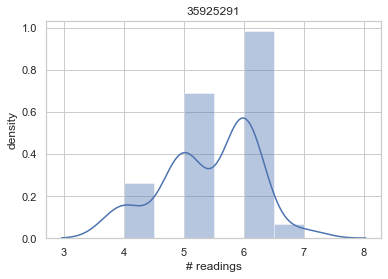

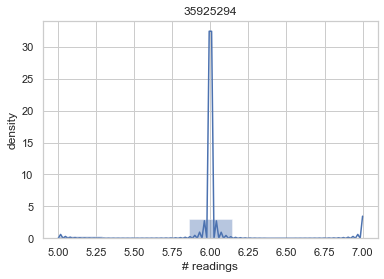

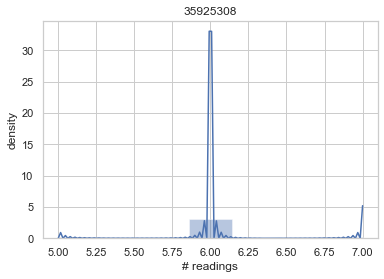

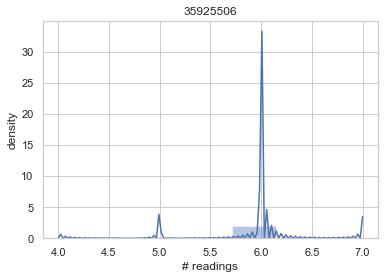

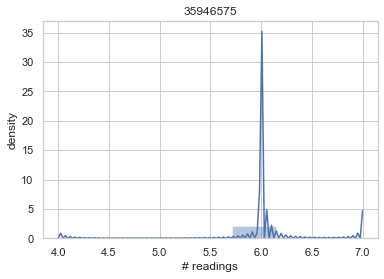

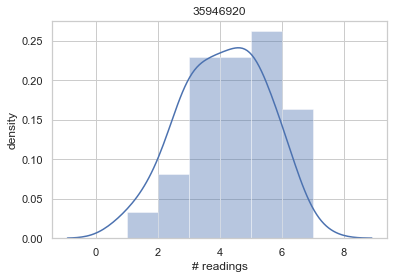

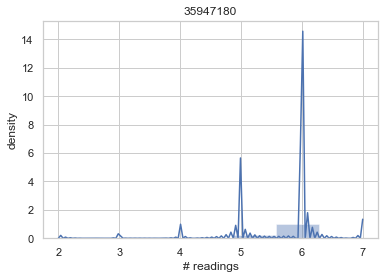

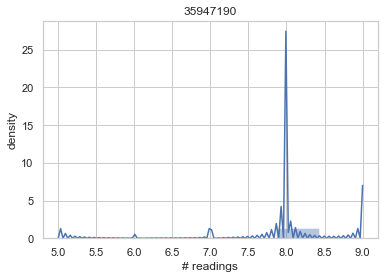

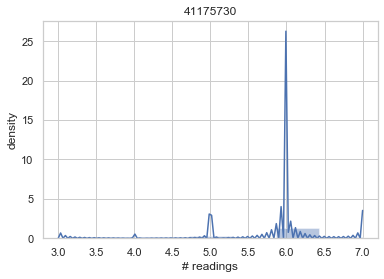

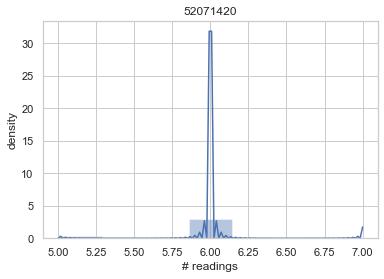

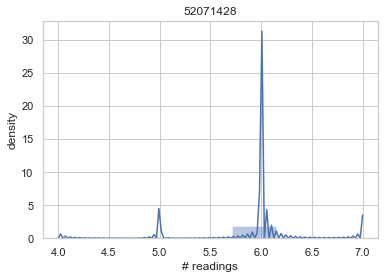

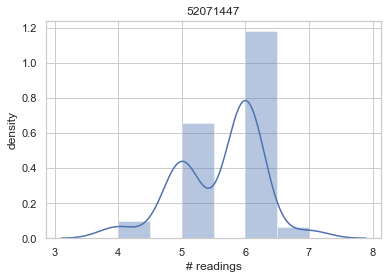

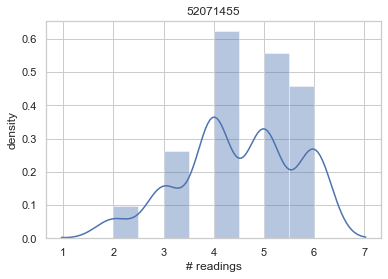

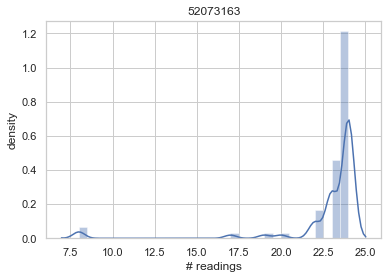

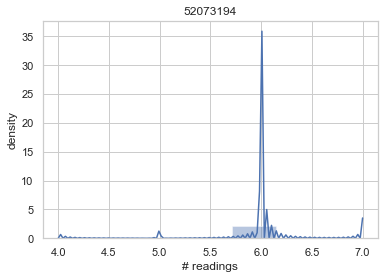

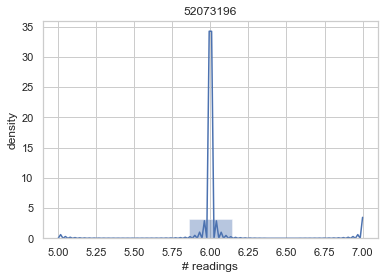

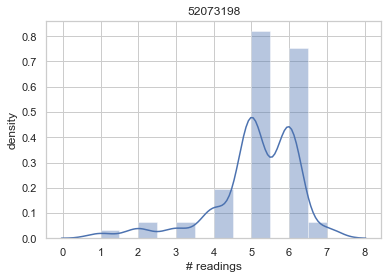

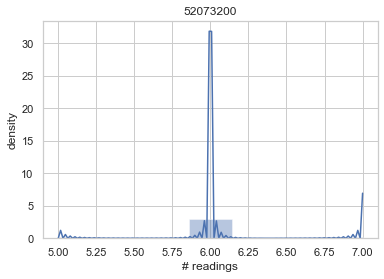

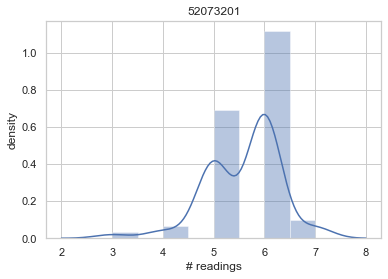

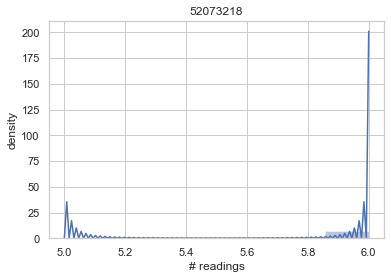

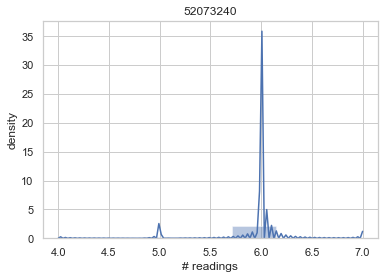

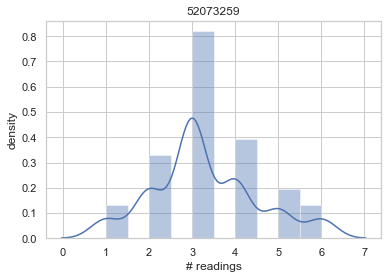

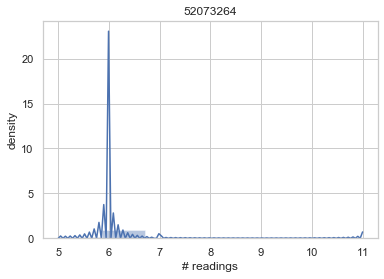

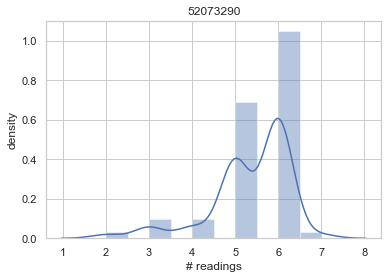

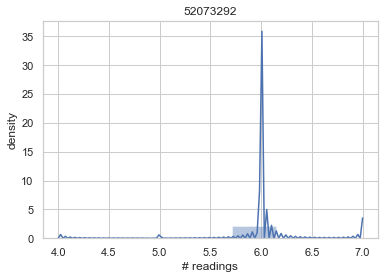

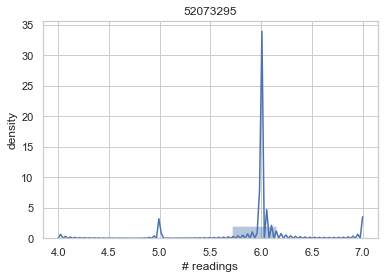

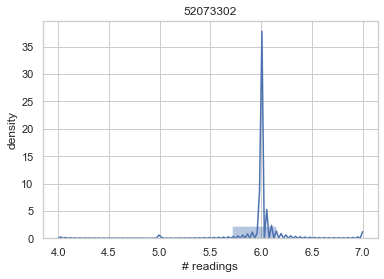

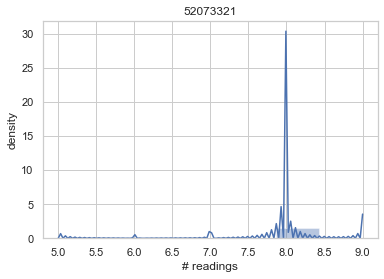

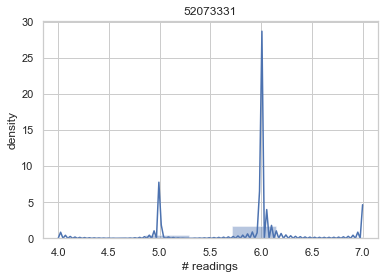

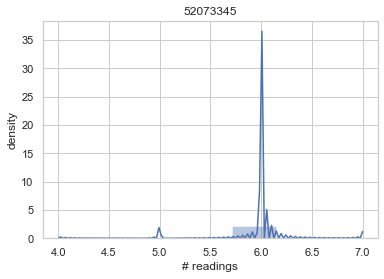

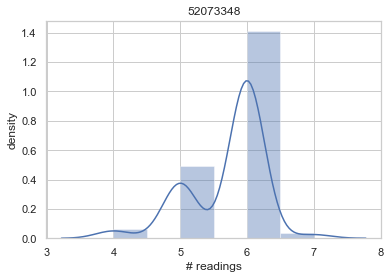

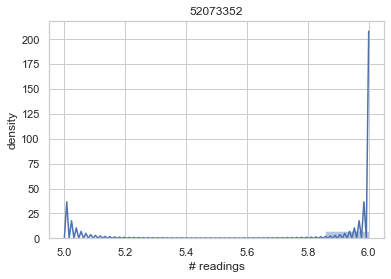

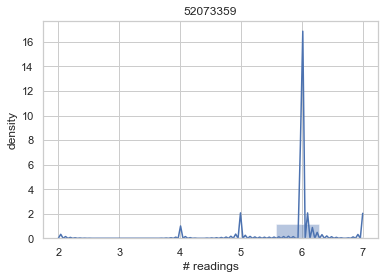

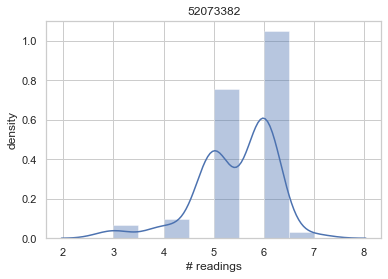

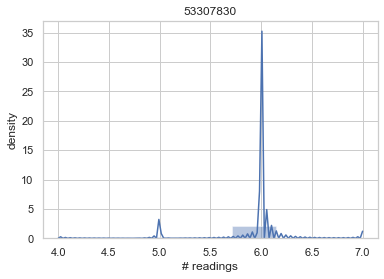

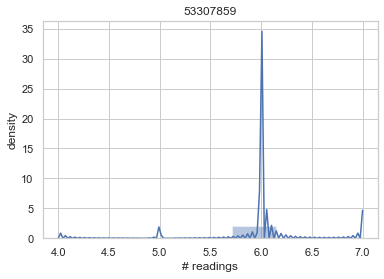

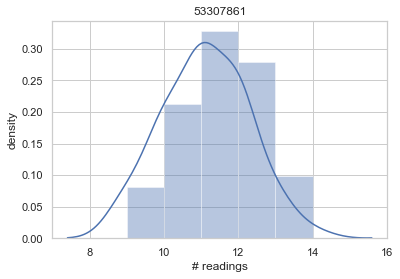

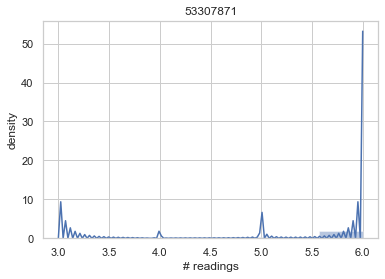

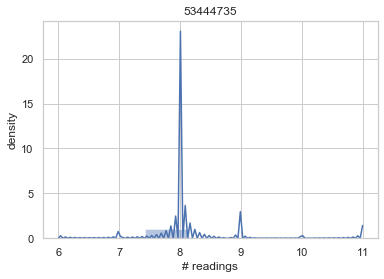

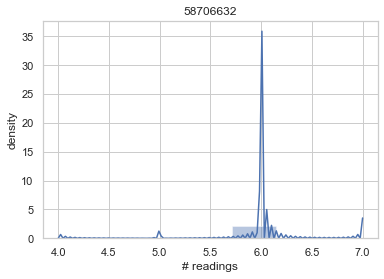

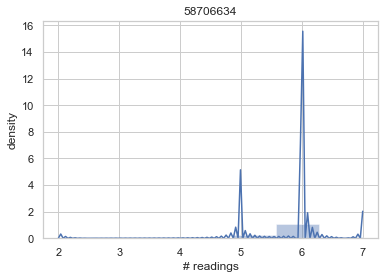

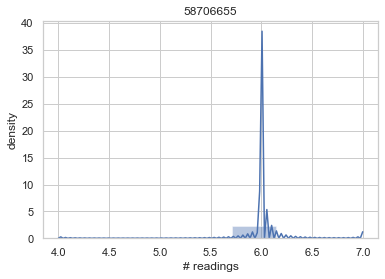

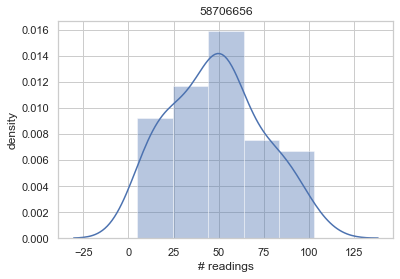

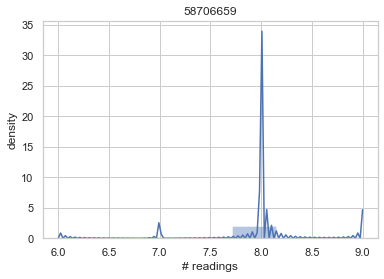

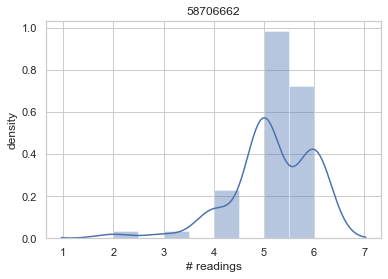

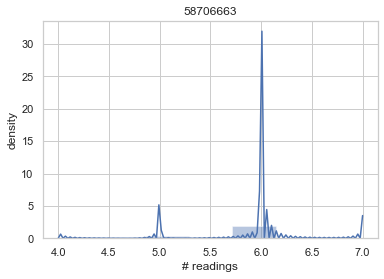

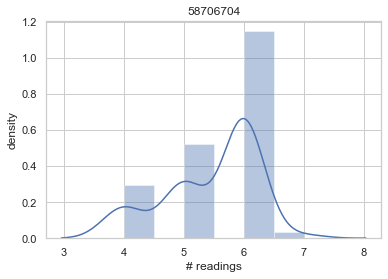

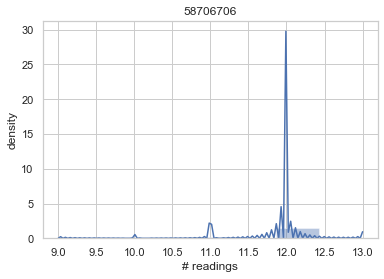

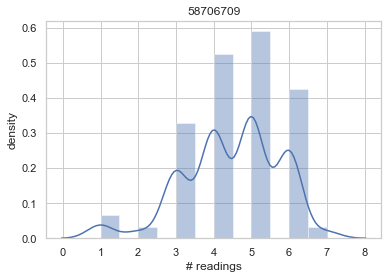

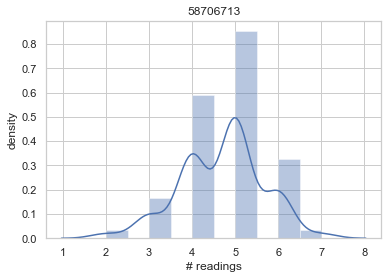

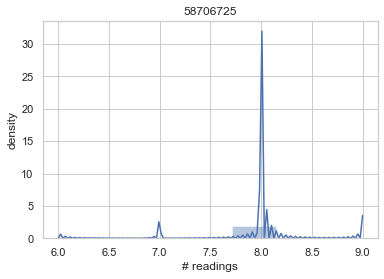

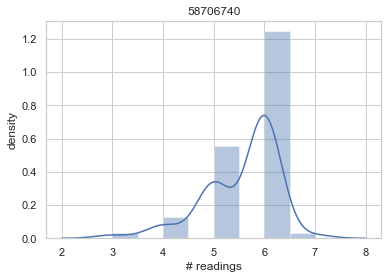

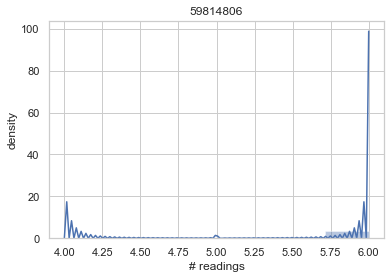

In [10]:
with PdfPages(dir_export +"Frequency number of readings barplot _windows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
#         data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYQAAAEXCAYAAACtTzM+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nO3deXxU9b3/8dfMZN+AhGwECCDyVQyiBAFxbdXaWuvVn9tV216rFr217b3W9ra9atW6tHbx2kVb666V1lZbd22rokXZJCgY0S+yExIIECD7ZLbfH2ewETFMwpycJPN+Ph48yMw5c87nZJn3fM/3fL/HF4vFEBER8XtdgIiIDAwKBBERARQIIiISp0AQERFAgSAiInEKBBERASDN6wJE+psxxgc8CLxjrf1Z/LntQF231X5qrX3UGFMMPAxUAlFgjrV2Qfw1XwS+A8SAduCb1tqlxphM4JfAp4FW4BngBmtt1BgzFbgLGAY0A9daa18xxnwZ+Fa3/Q8DRgOjrbVbu9X+F6DeWvv1pH5TRFAgSIoxxhwK3AnMBN6JP2eAJmvtEft4yZ3AfGvt54wxRwDPGWMOBsYAPwWmWWsbjDGnAX8BxgL/ixMgU4Ag8Dvga8CvgaeAG621DxhjyoDXjDEnWGsfxgkejDHpwD+BH+8VBv8DHAc8ltRvikicThlJqrkSuBf4c7fnZgMRY8x8Y8wKY8wPjDEBY0wacDpwD4C19m3gA+CzOG/0l1lrG+LbWAqUGWMygGrgj9baTmttDHgSOMcYMxInSB6Ob28LsCK+ve6+CzRaa+/e84Qx5sT4er9N0vdB5GMUCJJSrLVft9bO3evpNOAlnDfc44FTgW8AIwG/tXZbt3XrcE7jrLfWPgcfnoK6HXjaWtsFLAbON8bkxQPiQqDcWrsdWAf8R/x1E3A+8Zfv2Xg8NK4Grur23CjgF8BFQCQp3wiRfdApI0l51tp7uj82xtwOfBP4E07/QHc+ur0pG2NycfojxvCvT/q3AbcCC4GdOKd4Do8vOwP4mTHmKmA58BzQ1W37c4CnrLVr49tPB/4AXBU/NXUghyrSI7UQJOUZY75kjDm821M+IAQ0Aj5jTGG3ZaOIdz4bY8YCC3AC4lPW2l3xdQqBn1trp1hrj8cJhdXxZX7gjPiyL+IEyepu2z8feKDb4+nABOB2Y8zbwBU4rY97D/S4RfamFoIIVAFnG2POBjKArwOPWmvDxpjncD61/zgeGpOBV40x+cCrwEPW2hv32t4ZwOnGmH8DcnFO/9wWX/Y7nNNLjxtjZgOH4ZyuwhgzApiIEzIAWGsX4oQG8XVuAEbqKiNxgwJBBG7EuQLoHSAdp8N5zyfwrwH3GmNqcU4ffclau9sY832cK4nOMsac1W1bJwH341zFVAsEgHustY/Hl8+Jb+96nEtSz7DWtsWXTQQarLUhl45TpEc+TX8tIiKgPgQREYlTIIiICKBAEBGROAWCiIgAg/Qqo5qamkzgKKABjdwUEUlUAGdk/JvV1dXBvRcOykDACYP5XhchIjJIHQe8vveTgzUQGgAmTZpERkZGjyvW1tZSVVXVL0V5JRWOEVLjOFPhGCE1jnMgHmNXVxerVq2C+Hvo3gZrIEQAMjIyyMzM3O/Kiawz2KXCMUJqHGcqHCOkxnEO4GPc56l2VwPBGHMhcC3O6M87rLV37rX8euASnLlewBnReSciItLvXAsEY0wFcAvO3PBBYIExZp61dmW31aYD/x6fr0VERDzk5mWnJwOvWGub4nO1PA6cs9c604H/jd+U5NfGmCwX6xERkR64GQij+GjHRQPOPWIBMMbkAW/h3JN2GjAcuM7FekREpAdu9iH4+ejNRXw4NykHwFrbCpy257Ex5uc4s0Rek+gOamtrE1qvpqYm0U0OWqlwjJAax5kKxwipcZyD7RjdDIQ6nGtd9ygD6vc8iN9c5GRr7f3xp/bclCRhVVVV++3Fr6mpobq6ujebHXRS4RghNY4zFY4RUuM4B+IxBoPBHj9IuxkILwE3GGOKgTbgbJy54PfoAH5ijJkHrMe5+flfXaxHRER64FogWGs3G2OuAebh3IXqXmvtEmPM88APrLVLjTGXA8/El78O/NytekRk4MjKHU5jU3u/7S87K438nJ4HsYrL4xCstXOBuXs9d1q3r58AnnCzBhEZeMJRWGYb+21/00yJAiEBmu1UREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQAlwPBGHOhMWalMeYDY8yVPaz3eWPMOjdrERGRnrkWCMaYCuAW4FjgCGCOMWbyPtYrBX4G+NyqRURE9s/NFsLJwCvW2iZrbRvwOHDOPta7F7jRxTpERCQBbgbCKKCh2+MGYHT3FYwx3wSWAYtcrENERBKQ5uK2/UCs22MfEN3zwBhTBZwNnMReQZGo2trahNarqanpy+YHlVQ4RkiN40yFY0zLHs6GjRv6bX/lwyJsWrer3/a3x2D7WboZCHXAcd0elwH13R6fC5QDS4EMYJQxZr61tvtrelRVVUVmZmaP69TU1FBdXZ1w0YNRKhwjpMZxpsIxAixfuYbKsZX9tr/yshJKCg/qt/3BwPxZBoPBHj9IuxkILwE3GGOKgTac1sCcPQuttdcD1wMYY8YBr/YmDEREJLlc60Ow1m4GrgHmAW8Dc621S4wxzxtjpru1XxER6Rs3WwhYa+cCc/d67rR9rLceGOdmLSIi0jONVBYREUCBICIicQoEEREBFAgiIhKnQBAREUCBICIicQoEEREBFAgiIhKnQBAREUCBICIicQoEEREBXJ7LSERSUyQS5al/rqV+eyuhcJRwJMqnqscw/dBSr0uTHigQRCSpgqEIP31kKYvf3cLw/Ewy0vx0haK8vryeqy+cxvFH9ul+WNIPFAgikjStHSFuvn8xK9ft4IqzpvD5YycA0N4Z4of3Lebnj9YQjkQpyvG4UNkn9SGISFJ0BsP8712vYzc08Z2Lpn8YBgA5WenccNkspkwcyR1/fIvla/r/dpayfwoEEUmKP/7Dsq6+mf+9eAbHHVnxseVZmWlcd+kszNgRPL+ogVA4uo+tiJcUCCJywNY3NPPka2s4ZcZYjppc9onrZaYHuPj0w2jrjPDu2h39WKEkQoEgIgckGo1x1+PLyc1O5+LTD9vv+odNKGJCeS7LbKNaCQOMAkFEDsg/lmzgvfVNXPKFwyjIzUjoNZ86soSOYJiV69RKGEgUCCLSZ81tXTz47EqqDiri09PHJPy68eW5VBTnscw2Eo6olTBQKBBEpM+emb+W1o4Ql591OD6fr1evPWpyKe2dYfUlDCAKBBHpk/bOEM+8vpZZVWWMKy/o9esrivMoL8qhdu0OYrGYCxVKbykQRKRPXly4nraOEOeeNKnP25g0dgS7WoI0NXcmrzDpMwWCiPRaVyjCX19bwxGTipk0dkSftzOhYhg+YPUmDVQbCBQIItJrL725kV0tQc47gNYBOCOYK0ryWF23W6eNBgAFgoj0SjgS5Yl5qzmkcgRVBxUd8PYmjh7OrtYgO3brtJHXFAgi0isLVzTQ2NTOuSdN6vWVRfsyoWIYPh+srtNpI68pEESkV559Yy3lRblJu7dBdmYaFcV5rK7bpdNGHlMgiEjC1m7ezcp1TZx2zHj8/gNvHewxcfRwdrd2sV2njTylQBCRhD33xjoyMwKcfFTio5IT8eFpI11t5CkFgogkpKW9i1eX1XHitNHk5SQ2Z1GisjPTGF2cx7r63UndrvSOAkFEEvLSko10hSJ8/pjxrmx/TFk+O1uCtHaEXNm+7J8CQUT2KxKN8fyCdRw2oYjxo4a5so/RJfkA1DW2uLJ92T9X76lsjLkQuBZIB+6w1t651/KzgBuBAPAmMMda2+VmTSLSe8ve38qWHe18+XOTXdvHyGFZZGUEqGts5ZDKQtf2I5/MtRaCMaYCuAU4FjgCmGOMmdxteS7wa+AUa+1hQBZwsVv1iEjfvbBwPSPyMzn68HLX9uHz+Rhdkkfd1hZdfuoRN08ZnQy8Yq1tsta2AY8D5+xZGH9unLV2qzEmBygBdrpYj4j0QePOdmre28opMytJC7h7lnl0ST5tnWF2tQRd3Y/sm5s/3VFAQ7fHDcDo7itYa0PGmM8Bm4CRwN9drEdE+uDvizcQA06dWen6vkaX5AFQ19jq+r7k49zsQ/AD3dt9PuBjt0ay1r4AFBljbgV+A1yY6A5qa2sTWq+mpibRTQ5aqXCMkBrHOZCOMRKN8dzrDUwsz2LTuvfYtC45203LHs6GjRv2uSw7w4/d0EhBRltydgaUD4uwaV3/j3EYSD/LRCQUCMaYJ4DfWGtf6sW264Djuj0uA+q7bbMQmG6t3dMqeBR4rBfbp6qqiszMzB7Xqampobq6ujebHXRS4RghNY5zoB3jghX1tHZs5t8vnEr15LKkbXf5yjVUjt13i2P8tk2srtvFmDFj8SdhriSA8rISSgoPSsq2EjXQfpYAwWCwxw/SiZ4y+gtwnTFmlTHm2/E38/15CTjJGFMc7yM4G3ix23If8HtjzNj443OB1xOsR0T6wQsL1zNyeDbVhyRn3qJEjC7JoysUZdvOjn7bpzgSCgRr7aPW2hOAM3A6f980xjxijJnRw2s2A9cA84C3gbnW2iXGmOeNMdOttTuAOcCzxpjlgAG+e4DHIyJJUr+9lbdXbeOzsyoJJHHeov2pKN7Tj6DxCP0t4T4EY4wfOBiYFH9dI3CXMeY5a+31+3qNtXYuMHev507r9vWTwJN9qFtEXPbiwg0E/D5OnjF2/ysnUU5WOkXDsti0tbVfWyaSYAvBGHMzzpVA/4Nznn+itfZq4ATg6+6VJyJeCIYivLRkA7OmlFM0LLvf919RnMfWpjYiUY1H6E+JthBKgNOstcu7P2mtbTPGXJD8skTES6+/vZmW9hCfn+3OvEX7Uz4ylxWrt7N9VwelhTme1JCKEu1UDuwdBsaYxwG6XSUkIkPE8wvWMaY0Lym3yOyLsqJcALbsSN6lp7J/PbYQjDG/ASqA44wxxd0WpQMT3CxMRLzxwaadrNq4i8vPmpKUW2T2RV52Ovk56TTsaGPqwcX7f4Ekxf5OGd0HVAFTgSe6PR8GFrlVlIh454UF68nMCPCp6uTeBKe3yopyqd/WSiwW8yyYUk2PgWCtXQosNcb8I34ZqYgMYa3tXby2rI5PTR9Dbna6p7WUFeXywaZdtLSHKMhN7g15ZN/2d8roT9ba84AXjTEf6+631h7uWmUi0u9eenMjXeEop3nUmdxdeZHTmbxlR5sCoZ/s75TRbfH/dWmpyBAXiUR5Zv5aDptQxIQKd26C0xtFw7JJC/jZsqONSWNHeF1OSujxKiNrbU38/9eATfH/84DjcUYfi8gQsejdLTTu7ODfjh8Y14v4/T7KinJo2NHudSkpI9GBaXcD3zXGHArcg3OF0f1uFiYi/eup19ZQWpjDjMPcuwlOb5UV5bJjVwdd4YjXpaSERMchVAP/CZwFPGSt/Qrg/uToItIvVm3cyXvrm/jCcRP6dd6i/SkryiEGNDapldAfEg0Ev7U2CpwCvBJ/TsMHRYaIp/+5luzMNE7p53mL9qes0Bmg1rBdgdAfEg2E1caY53FOFb1qjHkUWOFeWSLSX3bs7uD15Zv5zMxKcrK8vdR0b5kZAQoLsjRiuZ8kGghfwZm19ARrbQiYD1ziWlUi0m+emb+WWCzG6cd6f6npvpQV5bClqY1YTBPduS3R+yG04YTACGPMNGAJcIibhYmI+1rbu3h+wXqOmVrx4fxBA01ZUS5doSi7WoJelzLkJXoLzR8C38a5B8KemI6h+YxEBrVnXl9HRzDMuScd7HUpn6hkhNNduXVnOyMKsjyuZmhLdPrrL+HcA6F+v2uKyKDQ3hnimflrmDG5jPGjvB+I9klGFGSSnuansamdQyoTuXuv9FWifQibFAYiQ8uLC9fT0h7ivJMHbusAwO/zUTIih6269NR1ibYQXjbG/AR4CvjwztfW2mWuVCUirgqGIvz1tTVMPXgkZhB86i4tzObtVdsJR6KkBRL9HCu9lWggXBz//9xuz6kPQWSQemnxBna1BPnOF6u9LiUhJYU5RGMxtu/qGLCd30NBQoFgrR2Y16OJSK91BsM89tIqJo8vZMpBI70uJyGl8QFqW5vaFQguSvQqozzgx8ChOK2EHwFXW2tbXaxNRFzw9Py17GwJ8r3/OGrQ3HgmLzud3Kw0GneqH8FNiZ6M+yWwGygFOoEC4HduFSUi7mhu6+KJeR8w87AyJo/35n7JfVVamKuOZZclGghHWmuvAULW2nbgIuAI98oSETf8+eVVdAbDfOm0Q70upddKCrPZ3dpFZ1fY61KGrEQDYe+5ZwNANMm1iIiLGpvaefb1dXx6+lgqywq8LqfXSgudAWqa+dQ9iQbCP40xtwHZxphTgb8Cr7pWlYgk3SMvvofPBxeeOjhnnflwxLICwTWJBsJ3gVacfoSbce6WdrVbRYlIctWu2c6rNXWcecJBFI/I9rqcPslIDzCiIFOB4KIerzIyxszjX3MXAez5ScwGXgA+7VJdIpIk4UiU3/xlBSUjsjnv5Elel3NASkfksL6hmVgsNmiukBpM9tdC+DVwJ1APtOFcbXQ7sB1Y7W5pIpIMz8xfy8YtLcw5cwpZGYmORR2YSgtz6OyK0NLe5XUpQ1KPvx3W2icAjDHfAWbH75qGMeY5YKH75YnIgdi+q4O5f3ufoyaXMrNq4Nwrua/2dCxvbeqgIDfT42qGnkT7EEYC3eedzQcG/gQoIiksFovxuyffIRqNMefMKV6XkxSFw7IJ+H260sglibYf5wKLjTF/AXw4o5U1ME1kAHt1WR0L32ngPz4/echM9xDw+ygens1WjVh2RaJzGf3AGFMDnBR/6lvW2hfcK0tEDsS2nR3c/ZcVHDqukLNOnNjjui3tXXR09u9gr7T0LCDUp9eWFOawcl0T0WgMv18dy8mUcA+TtfYpnOmvE2aMuRC4FkgH7rDW3rnX8n8DbsRpdawDvmKt3dmbfYjIR0WjMX7x2DIi0RhXXTCNwH7eNDs6wyyzjf1UnaOiKL3Pry0pzGHF6u00NXcycvjgvIR2oHJtYnFjTAVwC3AszjQXc4wxk7stLwB+A3zeWjsVWAHc4FY9Iqni2TfWsvyD7Vx6RhXlI4fGqaLuSuMD1DTRXfK5eaeJk4FXrLVN1to24HHgnG7L04ErrbWb449XAGNdrEdkyFu1cScPPLOS6YeWcuqsSq/LccWwvAwy0wMaoOYCNy9KHgU0dHvcAMzY88BauwNnCgyMMdnA94BfuViPyJC2uzXIjx56k8JhWVx1wbQhO3DL5/NRUpitQHCBm4Hg56OjnH3sY0I8Y8wwnGBYbq19qDc7qK2tTWi9mpqa3mx2UEqFY4TUOM6+HGMkGuP387azqyXIJaeU8MH77yT82rTs4WzYWNfrfR6IiqKJbNi4oc+vzwqEqNsdZO269QQC+w++8mERNq3b1ef99dVg+311MxDqgOO6PS7DGfH8IWNMOfA34BXgqt7uoKqqiszMngen1NTUUF09OG4T2FepcIyQGsfZ12N88Nl3Wbc1yH+dfyQnz+jdmdfGpnYqdwd6vc8DVTm276e0omm7+aB+Pdn5xQn1k5SXlVBSeFCf99cXA/H3NRgM9vhB2s1AeAm4wRhTjDPtxdnAnD0LjTEB4BngT9bam12sQ2RI+9uiDTwxbzWfO3pcr8NgsCop/NfMp0Ox49wrrgWCtXazMeYaYB6QAdxrrV1ijHke+AEwBpgGpBlj9nQ2L7XWXuZWTSJDzdL3tnLXE8uZdkgJc84aGqORE5GblU5eTrquNEoyV2e6stbOxRnl3P250+JfLsXdq5xEhrQPNu3kxw+/ybjyAr77pemkBVLrz6l0RI46lpMstX6DRIaITVtb+OG9ixmWm8H1l80iJ6vvA70Gq5LCHJrbuugI6paayaJAEBlkGra3ce1vFwBww1ePprAgaz+vGJrKCnUHtWRTIIgMIo1N7Vzz2zcIhaPcdMVsxpTme12SZ4pHZOPzwdYdbV6XMmQoEEQGicadThi0d4b54eVHM668wOuSPJWeFmDksGy2qIWQNAoEkUFgy442vn/XG7S0dXHjV2cxcfRwr0saEEqLnI7laCy2/5VlvxQIIgNc/fZWvn/XG7R3hLj5imMwlbo31R5lhTmEwlF2Nnd6XcqQoEAQGcA2bW3h+3e+Tlcowq1fO4aJY9Qy6K600BmUpo7l5FAgiAxQazfv5vt3vU40Brf+5zGMHzXM65IGnGF5GWRmBNiyQ4GQDK4OTBORvrEbmrj+nkVkZ6ZxyxWzGVWc53VJA5LP56OsUAPUkkUtBJEB5t21O7ju7gXk56Rz25XHKgz2o7Qwl6bmToKhiNelDHpqIYgMIHW70nj4zwsoKsjm6gunAc7YAzcN9jfSsqL4HdSa2lN6XEYyKBBEBohl7zfy4N82UJCbyWePrmRdQzPrGppd36+pHOH6Pty0Z+bTLTsUCAdKgSAyACx9byu3PLCE4mGZfO6Yg8jO1J9mojLTAxQWZLG1SSOWD5T6EEQ8tuz9Rm59cAmV5fl85bRxCoM+KC3MYUtTOzENUDsgCgQRD71lG7n5gcWMKcnnpstnk6Mw6JOyohyCXRF2tQa9LmVQUyCIeOSd1du5+f7FjC7J46YrZpOfk+F1SYNWeZEzQK1hu04bHQgFgogH7IYmbrp/EWUjc7np8tkU5CoMDsTw/EyyM9MUCAdIgSDSz9bV7+aGexYxPC+Lmy6fzbC8TK9LGvR8Ph/lRbnUKxAOiAJBpB/Vb2/lB79bSGZGgJuumJ2yN7dxw6jiXJrbumht7/K6lEFLgSDST5qaO/nB3QuJRmPcdPlsSuPXz0tylI90+hHUSug7BYJIP2jrCHHDPQvZ3Rrk+stmaQCVC0YOyyY9za9+hAOgQBBxWVcowi0PLGHjlha+f/EMJo0d3CODByq/X/0IB0qBIOKiaDTG7XOX8c6a7fz3BdOYZkq8LmlIKx/pTHTXGQx7XcqgpEAQcdF9z9Tyxop6LvnCYZw4bbTX5Qx5o+L9CA071EroCwWCiEuefG01T/9zLWccN4EzTzjI63JSQklhDn6/j/ptCoS+UCCIuGD+25u57+l3OebwUVx6RhU+n8/rklJCWsBPaWGO+hH6SIEgkmS1a7Zz+9xlTB5fyLcunIbfrzDoT6NG5rJtVztd4cF9nwcvKBBEkmjjlmZufmAJZUU5XHvJTDLSA16XlHJGjcwlFoMtaiX0mgJBJEmamju54d5FpKf5ueGrR2uyOo+Uj8zF7/exaWur16UMOgoEkSRo7wxx472LaGnr4vpLZ2kUsofS0wKUF+WyqbHF61IGHQWCyAEKhaP8+KE3Wd/QzHe/fBQTxwz3uqSUN7Y0nx27O2nrCHldyqCiQBA5ALFYjF//+W3eWrWNb5w7lemHlnpdkgBjSvMAqFMroVcUCCIH4JEX3uOVpZu46LOHcPKMSq/LkbiRw7PJzkxjo/oRekWBINJHT89fw59f/oBTZ1Vy/smTvC5HuvH5fIwuyWPT1hbdZ7kXXA0EY8yFxpiVxpgPjDFX9rDew8aYi92sRSSZ/vlWHfc+VcvRU8r5z7OnauDZADS2NJ+OYJgduzu9LmXQcC0QjDEVwC3AscARwBxjzOS91hlljHkGOMetOkSS7e1VjfzfH5YxeXwR376omoAGng1Ie6YY37hV/QiJcrOFcDLwirW2yVrbBjzOx9/4LwKeAv7kYh0iSbNq405ueWAJo0vyNfBsgMvNTqewIItNCoSEpbm47VFAQ7fHDcCM7itYa38KYIw5ti87qK2tTWi9mpqavmx+UEmFYwRvj7Nxd4gH/rGN7AwfZ8/Kxa5ckfR9pGUPZ8PGDUnfbk8qitI92OfEftnn8JwY67e2sqFuM5vWNbu+v70Ntr9LNwPBD3TvzfEB0WTuoKqqiszMnm9QXlNTQ3V1dTJ3O+CkwjGCt8e5tamdX/5qPtlZ6dz29eMoK8p1ZT/LV66hcmz/Xq2Ul5fX7/sE+mWfvoxm1m5ZR3NnJifN6N/fnYH4dxkMBnv8IO3mKaM6oLzb4zKg3sX9ibiiqbmT6367gK5QhB/Ome1aGEjyjSrOIz3NzzLb6HUpg4KbLYSXgBuMMcVAG3A2MMfF/Ykk3e7WINfdvYCdLZ3cdMVsKssLvC5JeiEt4GdceQFvrWokEo3pAoD9cK2FYK3dDFwDzAPeBuZaa5cYY543xkx3a78iydLWEeL6exayZXsb1106k0MqC70uSfpgQsUwWtpDrFy7w+tSBjw3WwhYa+cCc/d67rR9rHexm3WI9FZHMMyN9y5ifX0z13xlBodPLPa6JOmjyrJ8MtL8LFhRz5SJI70uZ0DTSGWRvQRDEW6+fzF2QxPf/mI1R00u87okOQDpaQGqDhrJgncaiEY1arknCgSRbkLhCLc+sIR31mznqgumcezUCq9LkiSYZkpoau5k1aadXpcyoLl6ykhkMAmFo9z28FKW2Ua+ed4RVB9aSmNTe7/WkJaeBWjK5mSbevBI0gI+FqxoUF9QDxQIIkA4EuUnj7zJ4ne38J9nH84pMytpbGrv98sVK4rS+3V/qSInK52pBxezYEU9Xzl9suae+gQ6ZSQpzwmDpSyq3cLlZ03htNnjvS5JXDD78FFsbWpn7ebdXpcyYCkQJKWFI1F+9mgNC99p4KtnVnH6sRO8LklcMvOwMtICPubV1HldyoClQJCUFY5E+envl/LG8nouPeMwzjjuIK9LEhcNy8tkZlU5ryzdRFco4nU5A5ICQVKS04H8JgtWNHDpGVWcecJEr0uSfvDZWZW0tHex8J2G/a+cghQIknJC4Qi3Pfwmi2q38NUzqzjzBLUMUsXhE4spLczhb4v6d3bXwUKBIF+CbsQAAA+USURBVCmlsyvMzfcvYfG7W7jirCk6TZRi/H4fp86q5J0129m8Tfdb3psCQVJGe2eIG+9dxFurGvnGeUfweXUgp6STjhqL3+/j72olfIwCQVJCS3sXP7h7ISvXNXH1hdV8Zmb/z/8vA0NhQRYzDyvj5aUbCYWTeouWQU+BIEPe9l0dfPfXr7Nm826+9+WjOGHaaK9LEo99ZmYlu1u7WKTO5Y9QIMiQtmlrC9/51Xy27+rgxjmzOHpK+f5fJEPekaaEUSNz+fMrqzThXTcKBBmyVq7bwXd/PZ9wJMqPvnaMprCWDwX8Ps4/xbCuvpnF76qVsIcCQYakeTWbuOY3C8jPyeAnXz+Og0YP97okGWBOOLKCiuJc5v7NqpUQp0CQISUajfH7F97j9rnLOHRcIT/7r+MpH6l7IMvHBQJ+zj/FsL6hmUW1aiWAAkGGkNb2Lm59cAmPvbSKU2aM5cY5R5Ofk+F1WTKAHX/kaCqKc/nD39VKAAWCDBGr63bx3//3GjXvb+WrZ1bxjfOOID1Nv97Ss4Dfx7/HWwkL3qn3uhzP6S9GBrVoNMbT89fwP7+aTyQS5UdXHssZxx2k+e4lYccdOZrKsnzue6qW9s7UvjmRAkEGrS072rjmt29wz5O1TD24mDu+daLuhiW9FvD7+Ob5R9LU3MkDz670uhxP6Y5pMuiEI1Gee2Mdv3/hPXw+H9887whOnjFWrQLps0ljR3DG8Qfx5GtrOP6ICqZMHOl1SZ5QIMigUvP+Vu59qpa6xlamHVLCledMpWREjtdlyRBw0WcPYfG7W/jVn97ml98+kayM1Ht71CkjGfBisRjLP9jGQy9v44Z7FhGNxrju0pnccNkshYEkTVZGGt847wgadrRx39PvEoul3lVHqReBMmiEwhEW1W7hqdfWYDfuJC/Lz6VnVPH5Y8brCiJxxZSDRnL2pybyxLzVVBTnptyNkxQIMqBEozFW1+1iXs0mXltWR0t7iJLCHL529uGMSNvBrBm6f4G468unTWZLUzv3P/MuxSNyOObwUV6X1G8UCOKpWCzGtp0dvL+hiWW2kZr3GtnVGiQt4OfoKeWcfNRYpk4qJuD3UVPT5HW5kgL8fh9XXTCNpt2d3P5oDYX5WRw6PjWuXlMgSL8IhaM0NXeyfVcH9dtaqWtsZVNjC6s37WJnSxCA3Ox0qk0JR00upfrQUo0yFs9kpge45isz+M6v5nPd7xbw7YuqmVU19GfKVSCkkFgsRigcJRiK0BWK0BWK0hWOEApHCUeihMJRIpEo4UiMaDRGOBIlEo0RicaIRp3nI9EY0UiUcDT24bpd4QjhcJSucJTOYJjOrggdwTBtHSFa2rtoae9id2vXR2pJC/gZVZzL1EnFHFJZiKkcwfjyAgIB9Q3IwDAsL5PbrjyWm+5fzK0PLuErpx/GmScM7UGPCoRBLByJOp+4m9Opn7+GXa1d7G4N0toeorW9i9aOEB3B8If/gqEIbl04kRbwk57mJzM9QGZGgMz0ALnZ6ZQV5XJQxTCG52cyIj+L4fmZlBbmMHJYNn7/R/+wduzu7HEfBSPKaWxqd+cA9iEYivTbvmRgGlGQxa1fO4Y7/vAW9z/zLmvrd3PZGVUMy8v0ujRXKBAGuGg0RuPOducUy9YWNm9rpWF7G/Xb22ja3cHe83EF/D6yM9PIygyQlZFGdmYaw/IySU/zk5HmJy3NT1rgX/8CAR8Bv/PP7/fh98X/7/61z4fPx0e+NpUjWLN5N4H4Ool+agqFo9Q1OqeMequiKJ01trHXr+srUzmi3/YlA1dWRhr/86XpPPYPy2MvraLmvUYu+cJkPj197Mc+1Ax2CoQBpLW9i3X1zayr3836hmbWNzSzcWsLwa5/fVLNz8lgVHEuVQcVUVqYQ8mIHFqadxGMZpKTlUZmeqBfmrQ5WelkpAVc34/IQOD3+7jg1EOYffgo7npiOb947G2eX7Ces06cyOwp5UPmVKcCwQORSJT67W1s2NL8YQCsq29m+66OD9cpyM1gXHkBp86sZGxZPqNL8hlTmk9B7sc7WpevDNOwW2/OIm6rLC/gR187lleWbuRPL3/ATx5ZSvGIbD47axzHTB1FRXGe1yUeEFcDwRhzIXAtkA7cYa29c6/lRwD3AgXAP4ErrLVhN2vqTx3BMFt2tFG/rY1NjS3UbXVO+2xqbCEUjgLOJ4/RJXlMHl/IhFHDGD9qGONGFTAiP3NId16JDFZ+v4+TZ1TyqeljeXPlFp765xoeeeE9HnnhPcaU5jNjcimHjiuks3Pw9UG5FgjGmArgFqAaCAILjDHzrLXdpxP8PXCZtXaRMeY+4KvAb9yqKVlC4Wi3q2eC7GwOsrMlyI7dHWzb1cH2XR1sbWpnV/xyyj1KRmQzuiSfqZOKGVeez9iyAsaW5pORrk/3IoNNwO9jVlU5s6rKadzZzuLaLSyqbeDJ19bwxLzVADw87++MLs1ndEkeFcV5jByWTeGwLIoKssjPzSBtgJ1qcrOFcDLwirW2CcAY8zhwDvDD+ONKINtauyi+/oPAjSQWCAGArq6u/a0HQDD4rzfmrnCEV2vqaG3vIhqLEY06HbfhaJRoNBa/9DJGKOJcktkVitLVFaazK0pnV4iOoHPJ5r6kB/wf/rAPriihpDCHkhHZFI/Ioawol8x9vPHHomGCwQNrFMWikX6flCoSDuGnfz8BxaK+ft1nKhwjpMZxhkNdBIPuffAalhPgMzMq+MyMCrrCETY0NPNGjaUrlkvDjjYWrajb5/tGVmYaudnpZGcEyMxIIzPduVIvPS1Aeppz0Uea308g4Mfvd1onAb+PYw4fRXEf5vHq9p65z2+Gm4EwCuh+o9IGYMZ+lo9OcNvlAKtWrUpo5dra2o8Wlgv0eJtdH87360B+gWJAG0TaaNkOLdsPYFMJKOrnMVy7t+3q932G2vr3OFPhGCE1jrOhbhcNdf23P4DpE+P9CQfnAX3pW4jF/0U/tmTr5rVs3XwAxTnvoWv2ftLNQPDjHM0ePj56ZPtb3pM3geNwQmTwnagTEfFGACcM3tzXQjcDoQ7nTXuPMqB+r+XlPSz/RNXV1UHg9QMtUEQkBX2sZbCHm6eeXwJOMsYUG2NygLOBF/cstNZuADqNMcfEn/oS8IKL9YiISA9cCwRr7WbgGmAe8DYw11q7xBjzvDFmeny1i4D/M8a8j3OS7Zdu1SMiIj3zpeJdgURE5OMG1kWwIiLiGQWCiIgACgQREYlTIIiICJACs50aY34GjLTWXux1LclmjPkCcD3OuOu/W2v/y+OSXGGM+SLw/fjDF6y13/aynmQyxhQAC4DTrbXrjTEnA7cD2cBj1tprPS0wSfZxnHOAb+IMTl0KXG6tTWwumgFq72Ps9vzXgXOstSd6VFrChnQLwRhzEvAfXtfhBmPMBOC3wJnA4cA0Y8znvK0q+eJjWH4JnABMBY6Lv2kOesaYmTgDLCfFH2cD9wP/BhwKHDUUfqb7OM5JwHeA2Ti/u37gSs8KTIK9j7Hb85OB73lSVB8M2UAwxhTizLZ6q9e1uOQsnE+QddbaEHA+sNjjmtwQwPk9zcWZRj0d6OjxFYPHV3HeCPeM0J8BfGCtXRefBv73wLleFZdEex9nEPiatbbZWhsD3gHGelVckux9jBhjMoG7gR94VVRvDeVTRnfjDIwb43UhLpkIdBljnsb5Y3oWuM7bkpLPWttijLkOeB9oB17DaZYPetbaywCMMXueOpAJHwesvY8zPkvBhvhzxcDXgYs9Ki8p9vGzBPgRTotvnRc19cWQbCEYYy4DNllrX/a6Fhel4UwxfilwNDCTIXh6zBhzOHAJUInzhhkBhkwfwl4OZMLHQSd+z5SXgfusta96XE5SGWNOAcZaax/wupbeGJKBgHP65DPGmLdx7r9whjHm/zyuKdm2AC9Za7dZazuAv/LR6cWHilOBl621jdbaIM59M070tCL39HnCx8HGGHMITkvvIWvtTV7X44ILgMPi70H3AtONMY95XNN+DclTRtbaU/Z8bYy5GDjRWnuVdxW54lngIWPMcKAF+BzwpLcluWI58BNjTC7OKaMv8AlT9w4BiwFjjJmIc5rhQpxTDkOKMSYf+DtwjbX2Ea/rcYO19pI9XxtjTgRusNae711FiRmqLYQhz1q7GPgJzpUNK3HOyQ6q5mkirLV/B/4A1AArcDqVf+xpUS6x1nbinEt/Audn+j7wuJc1ueQyoBS42hjzdvzfD70uSjS5nYiIxKmFICIigAJBRETiFAgiIgIoEEREJE6BICIiwBAdhyDySYwxf8OZZXM9sMJaa3p+RdL22wpUASOB71lrz+mP/Yr0hloIkjKMMWnABGutBWYBS/q7BmvtUoWBDFQahyApwRjzPHAIUIAzRUQFzgjvn1tr7+y23onAL4A2IA84CvgMcC2QgTNa+tvW2oXGmFKcSRRLcaaZ2ACcZ61tNMYcB/wKZ26iN4EvApOBccCvrbVVxpgHgWZgCs4kjCuAL1trW40xpwG34czd9DbOvFXHAp3AwzgtDYDnrLVDblJD8YZaCJISrLWnAT/FCYAjgPnA2d3DoJsq4AJr7eE4M8neCpxmrT0SmAP8JT6Vxr8DC621RwMTcMLiS8aYDODPwNXx18zDueHNvlQDn8W5/8E44FxjTBHwCPDFeK3zcAIMnGmW11prpwHHAQcbY4b19fsi0p0CQVLJVOCt+NeHAe9+wnqb4lM0A5yCM+Hcy/GJyh7FmYF0orX2F8ACY8y3gLtwgiQP5xN/aM9su9baP+C0RvblRWttMH5Pi3eAQuB4YKW1dnn89Q/htCQAXgTOjrd4Lsfpj9jdy++DyD4pECQlxN9Avwz8zBhTi3OfgSXGmH3dqau129cBnNlWj9jzD6f/odYYcxvObLrbgN/hTNjmi7/Ox0eFP6G07jf7icVfF97H66MA1to3gfHx/Y2LH0P1J2xbpFcUCJIqzgPWW2urcPoD7ou/we/rlFF3L+NMpX4IQPzc/gqcU0CnAnfEZ+xsxGlNBOLLffF1McacAYzoRa1vAJPi94LAGHM2MByIGWN+DFxnrX0S+C+cVk5VL7Yt8okUCJIqjsZ5owXn3PtribzIWrsSp9/gj8aY5cBNwBnW2lac1sHPjDErgKdxZp6dGD/9cyZwU/w00//DCYyEWGubcObTf9gYswwneMI4fRR3AEfEWzlLcabJ/mOi2xbpia4yEhlgjDEFOK2YG6y17caYacBzwKj4PYhFXKFAEBmAjDE3A2cBofi/b1lr53tblQx1CgQREQHUhyAiInEKBBERARQIIiISp0AQERFAgSAiInEKBBERAeD/A9WYutqKkGvmAAAAAElFTkSuQmCC
        ax = sns.distplot(g["voltajeA"]) #any columns will work
        ax.set(xlabel='# readings', ylabel='density', title = n)
        pdf.savefig(figure)

    

### Number of readings per each day of the data: LinePLot

In [ ]:
with PdfPages(dir_export + "Number of readings per each day of the data LinePLot _windows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        plt.title(n)
        plt.ylabel("#readings")
        plt.xlabel("days")
        g["voltajeA"].plot()
        pdf.savefig(figure)

    

### Number of readings per each day of the data: BarPLot

In [ ]:
with PdfPages(dir_export + "Number of readings per each day of the data BarPLot _windows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        ax = sns.barplot(x = g.index, y = "voltajeA", data =g)
        ax.set(xlabel='days', ylabel='#readings', title = n)
        pdf.savefig(figure)

    

## Generating graphs of variance and std of all meters acording to the numer of readings in each day 

In [11]:
var_dict = {}
std_dict = {}
for n, g in df.groupby("medidor"):
    #g["fecha"] = pd.to_datetime(g["fecha"])
    g.set_index("fecha", inplace = True)
    g = g.resample("D").count()
    variance = g["voltajeA"].var()
    std = g["voltajeA"].std()
    var_dict[n] = variance
    std_dict[n] = std

    

In [12]:
s1 = pd.Series(var_dict)
s2 = pd.Series(std_dict)

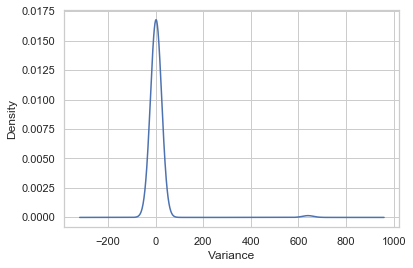

In [13]:
fig = plt.figure()
s1.plot.kde()
plt.xlabel("Variance")
plt.savefig(dir_export + "Densidad_var_numero_dias_windows.jpg")

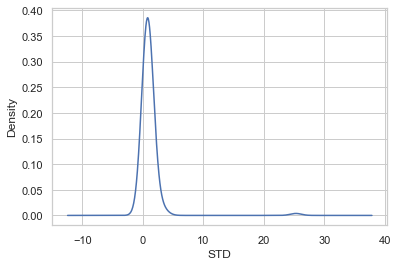

In [14]:
fig = plt.figure()
s2.plot.kde()
plt.xlabel("STD")
plt.savefig(dir_export + "Densidad_std_numero_dias_windows.jpg")

In [16]:
n = (s2 - s2.min()) / (s2.max() - s2.min())

In [17]:
quantil = s2.quantile(0.72)
meters_q = (s2[s2<quantil])

In [18]:
len(meters_q)

80

In [20]:
qqq = (s2[s2<= 1])

In [21]:
meters_q.max()

0.9815232947526394

In [22]:
meters_q.index

Int64Index([15029835, 15029844, 15029846, 15029847, 15029977, 15842885,
            15842894, 16567743, 16567746, 16567760, 16567761, 16567763,
            16951175, 16951176, 16951180, 16951181, 16951201, 16951203,
            16951205, 16951207, 16951208, 16951209, 16951216, 16951219,
            16951220, 16951221, 16951222, 20037228, 28006904, 28877074,
            35924863, 35924864, 35924866, 35924882, 35925134, 35925291,
            35925294, 35925308, 35925506, 35946575, 35947180, 35947190,
            41175730, 52071420, 52071428, 52071447, 52073194, 52073196,
            52073200, 52073201, 52073218, 52073240, 52073264, 52073290,
            52073292, 52073295, 52073302, 52073321, 52073331, 52073345,
            52073348, 52073352, 52073359, 52073382, 53307830, 53307859,
            53307871, 53444735, 58706632, 58706634, 58706655, 58706659,
            58706662, 58706663, 58706704, 58706706, 58706713, 58706725,
            58706740, 59814806],
           dtype='int64')

In [23]:
df_meters_uniform = df[df["medidor"].isin(qqq.index)]

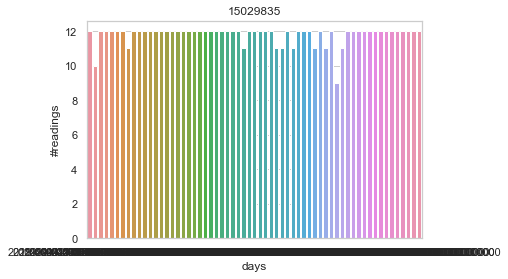

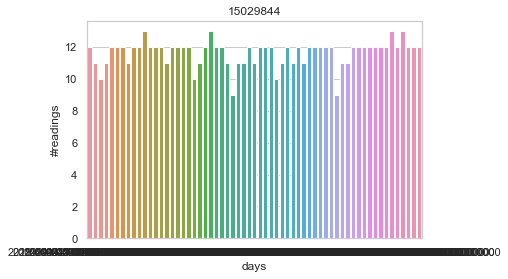

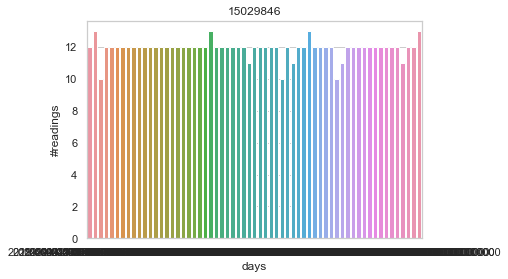

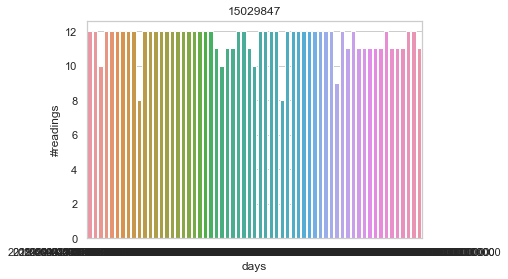

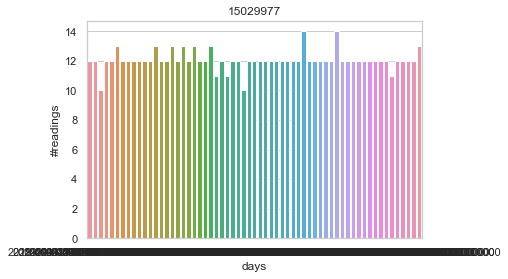

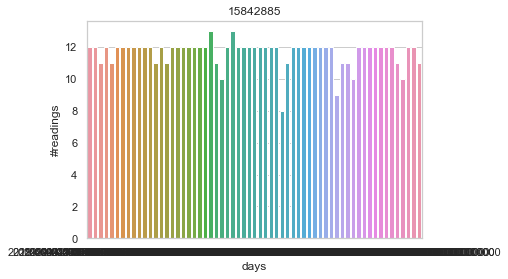

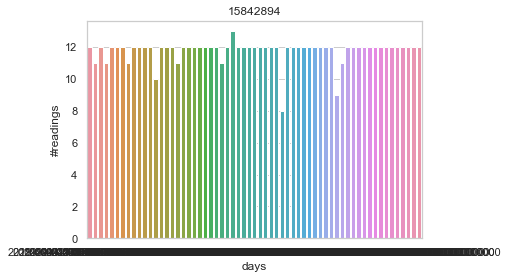

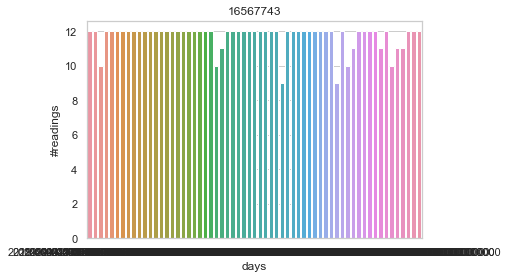

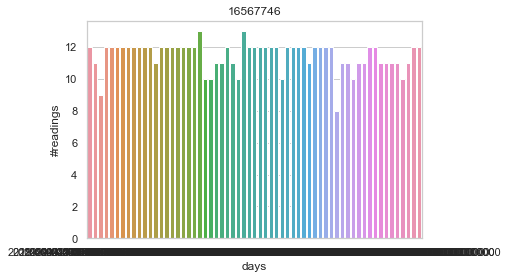

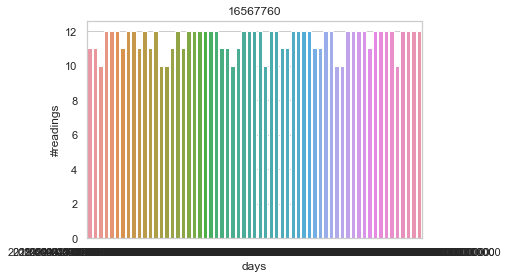

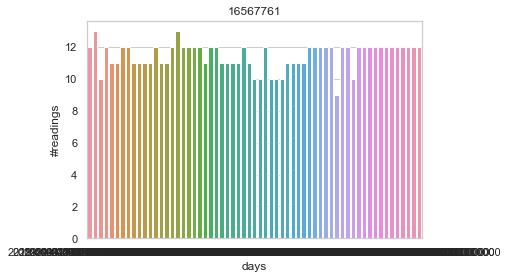

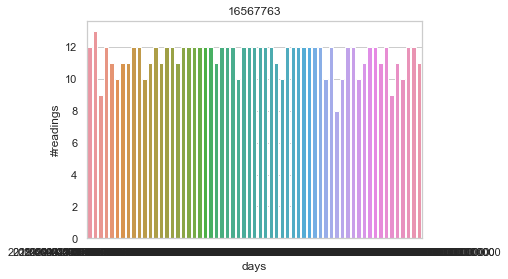

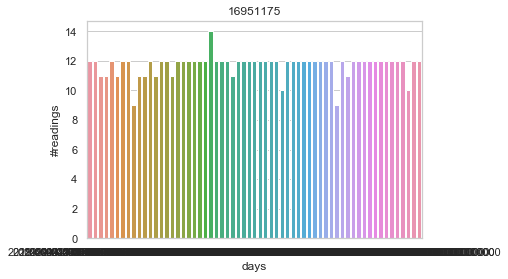

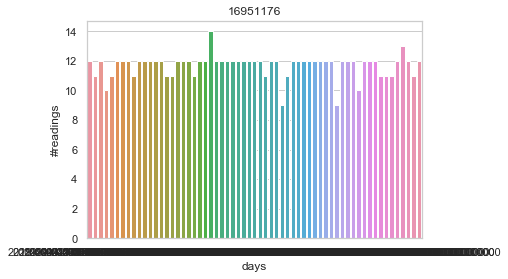

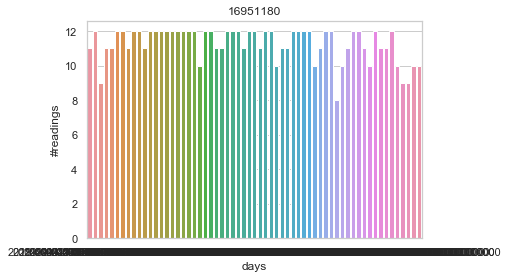

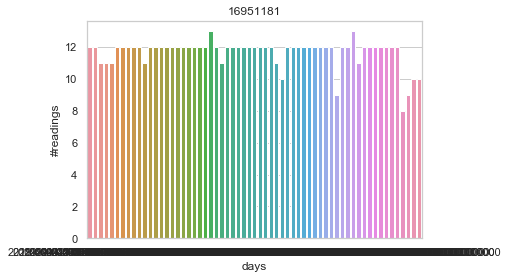

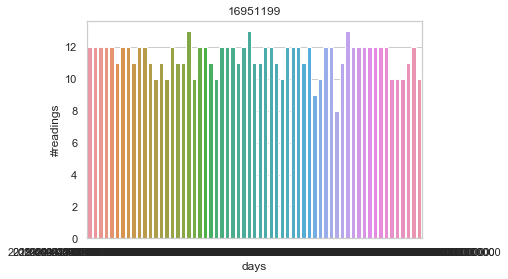

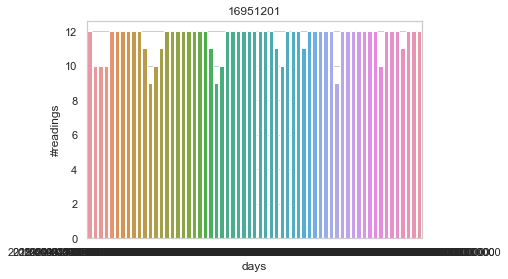

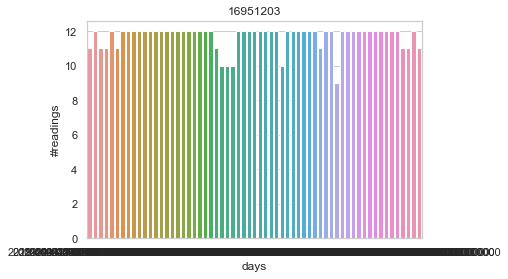

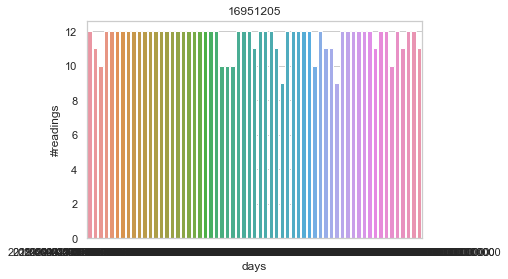

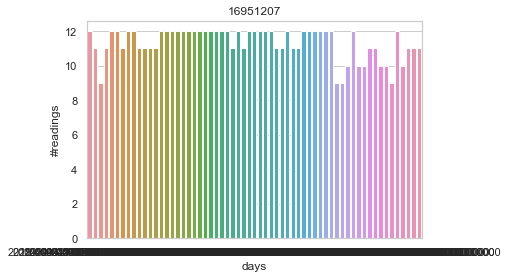

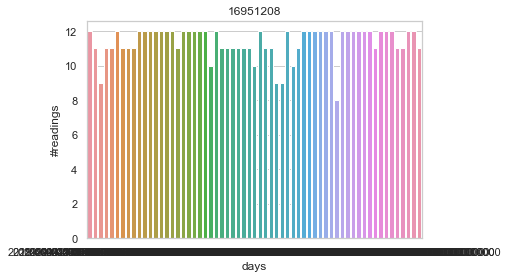

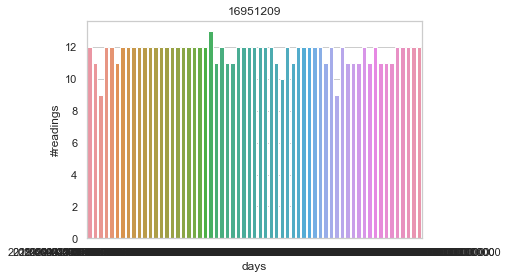

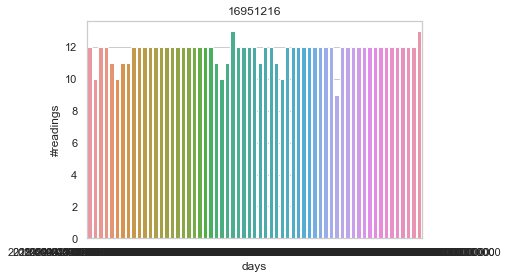

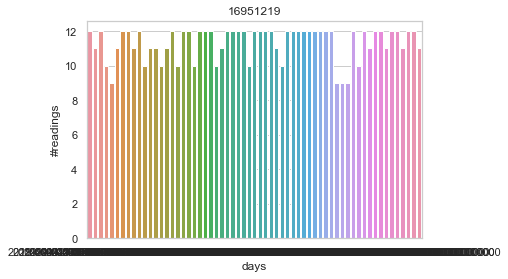

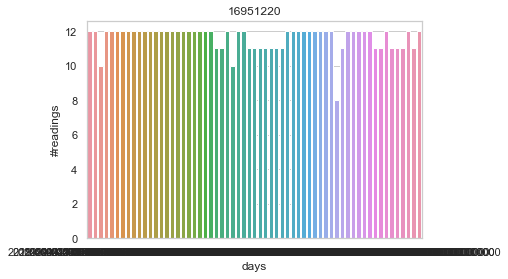

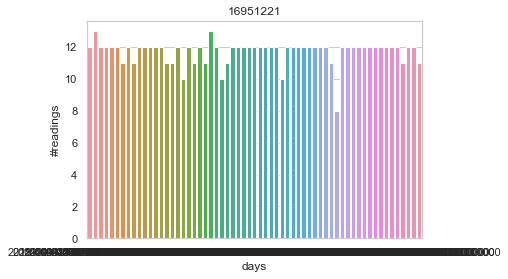

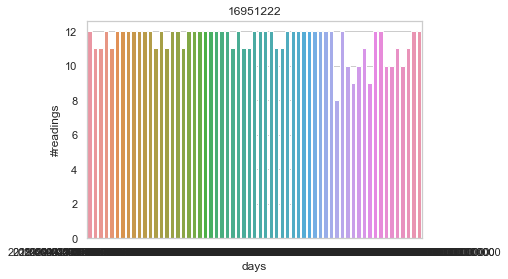

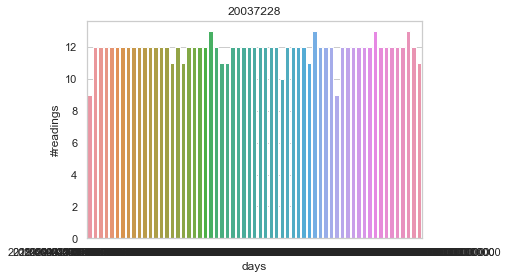

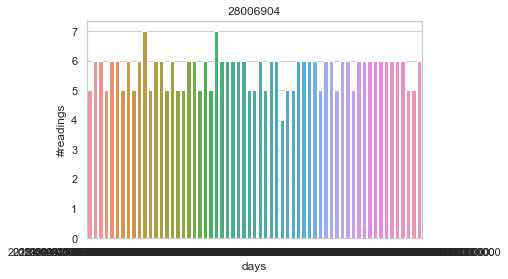

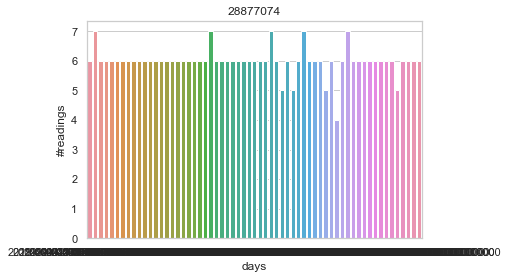

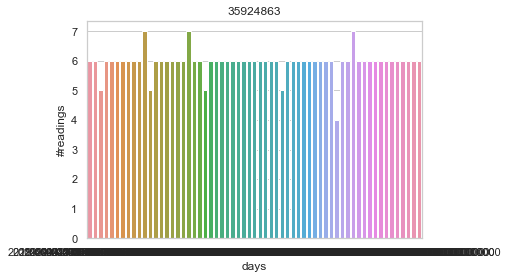

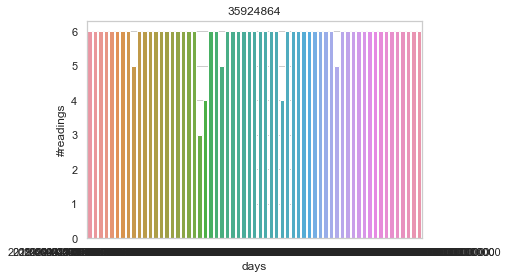

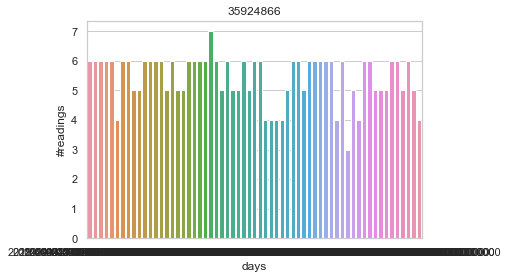

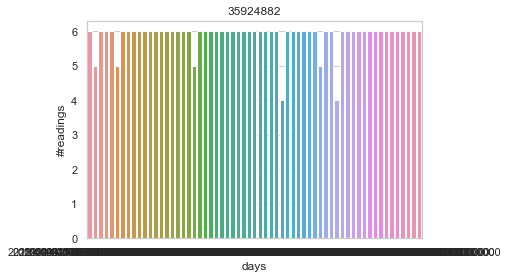

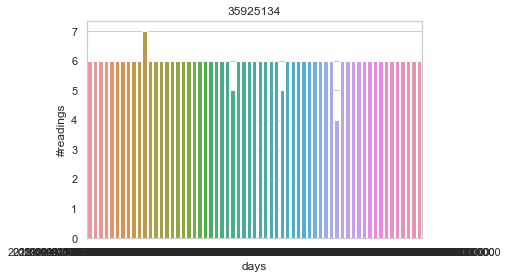

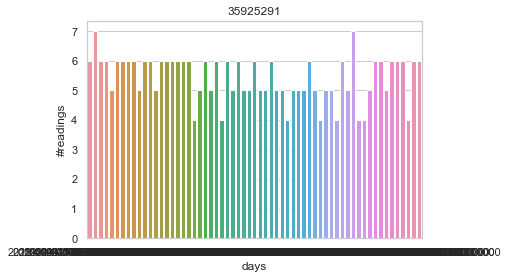

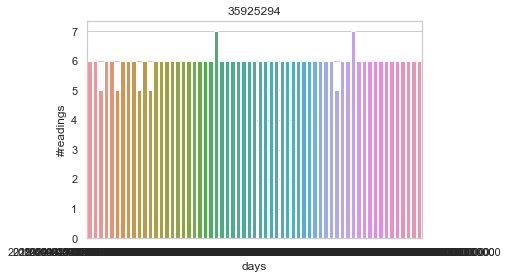

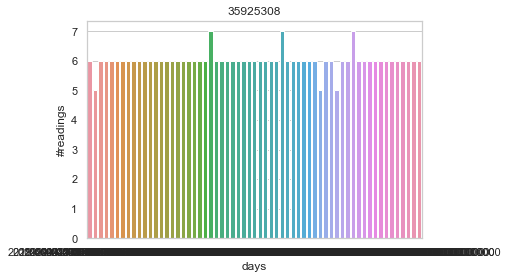

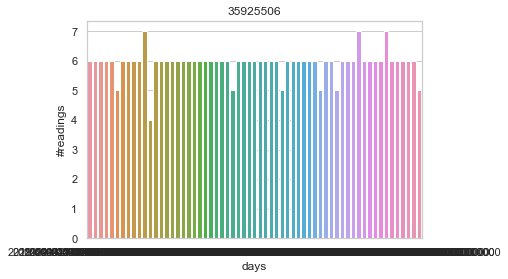

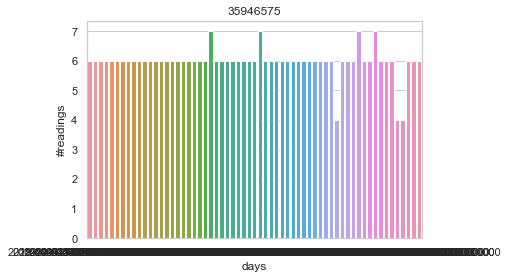

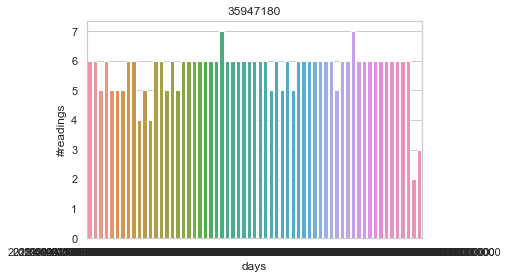

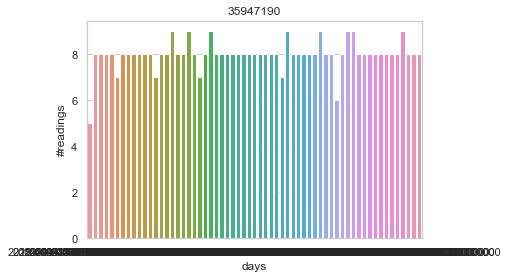

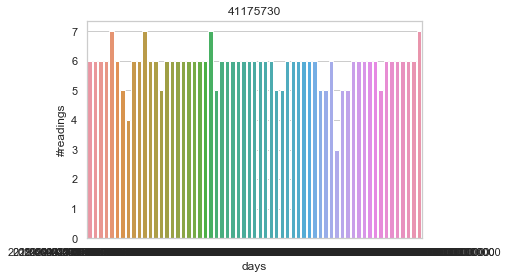

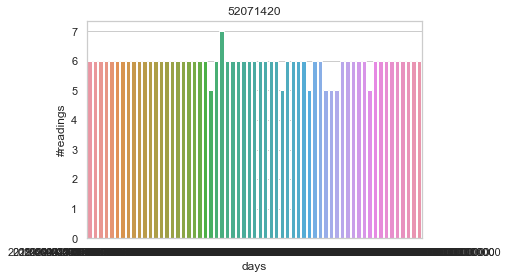

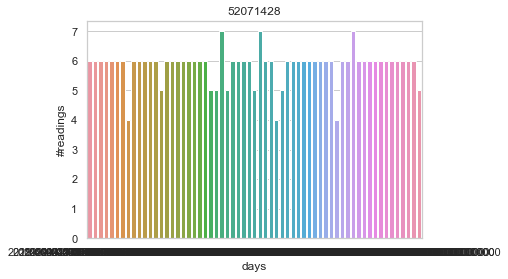

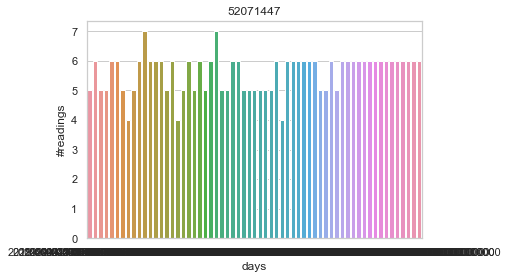

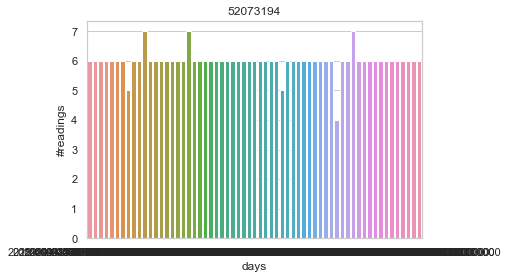

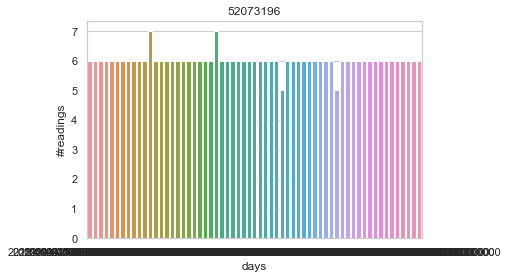

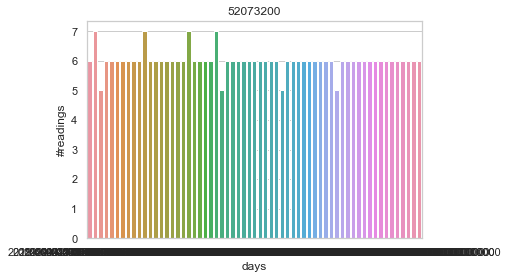

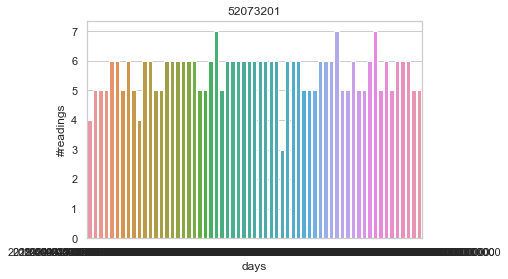

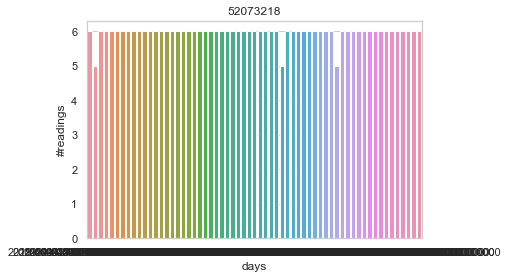

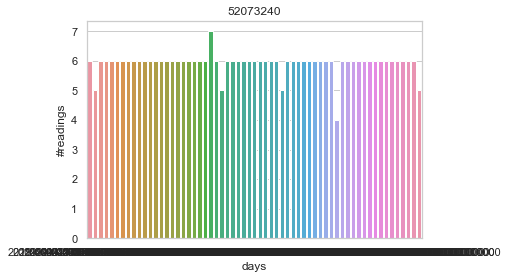

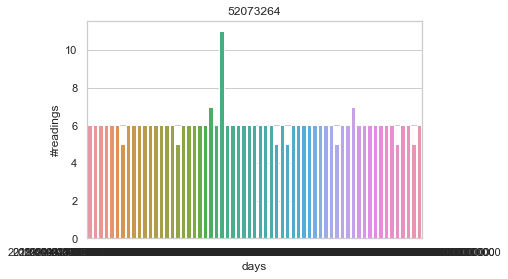

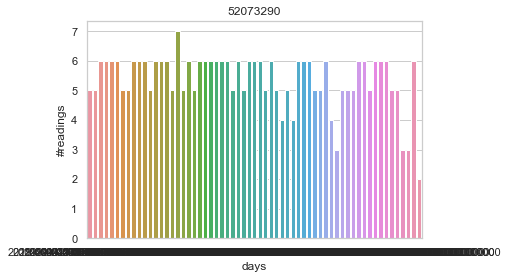

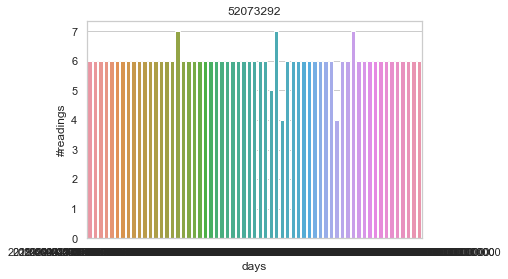

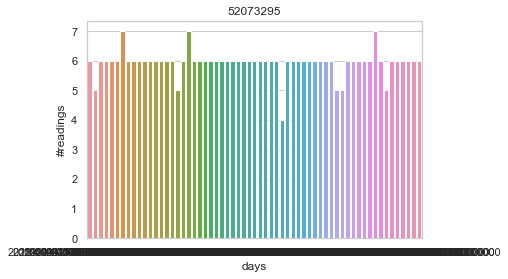

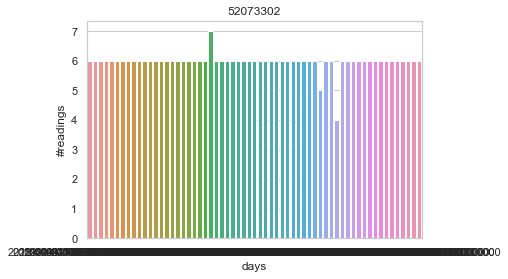

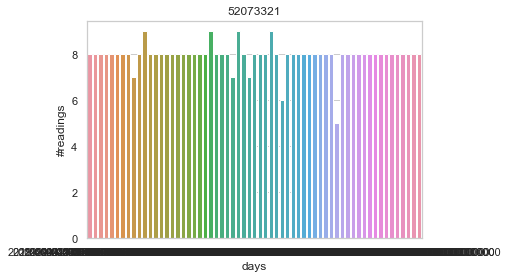

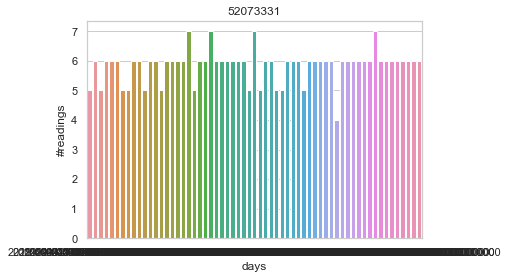

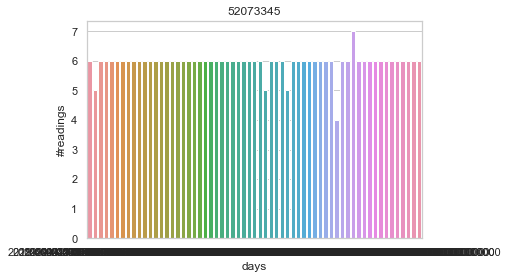

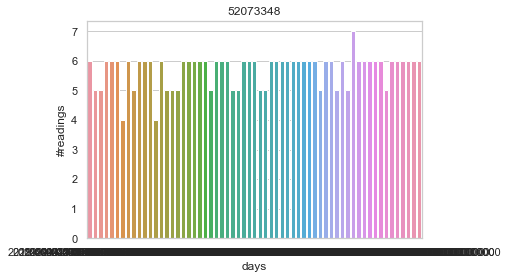

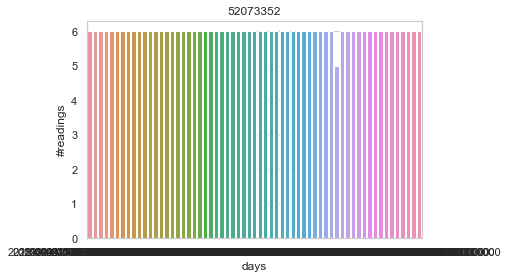

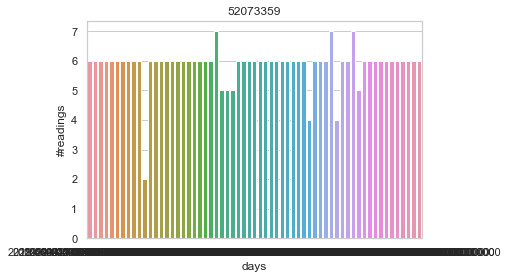

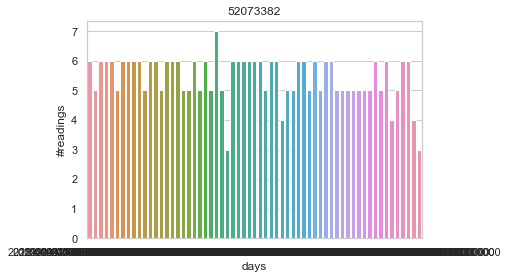

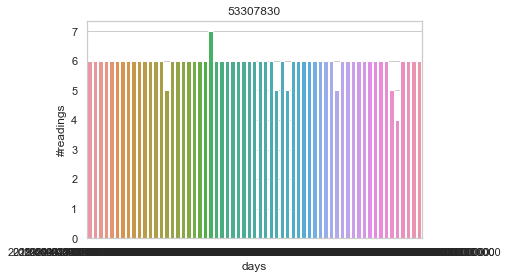

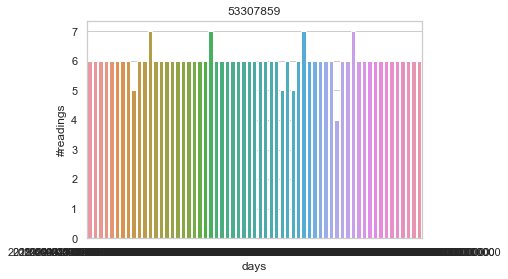

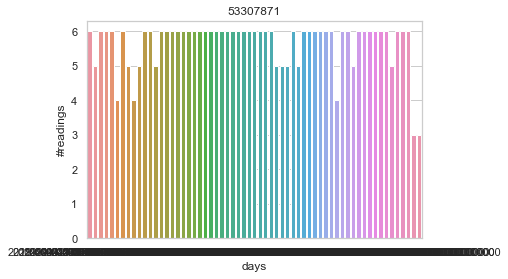

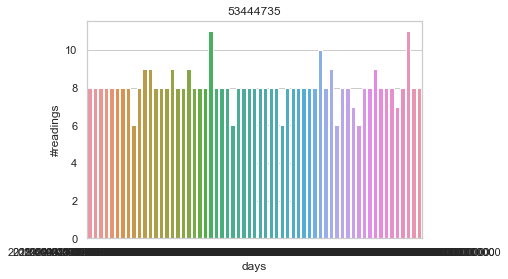

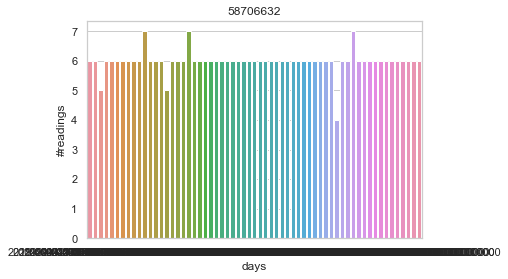

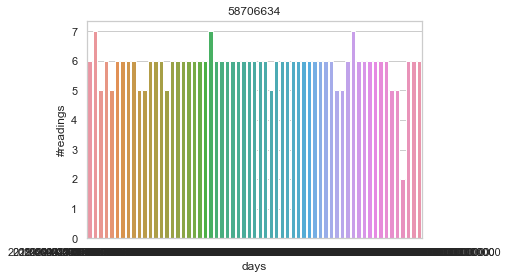

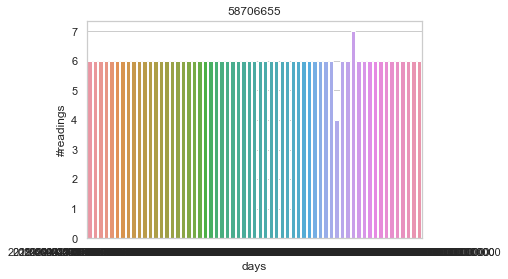

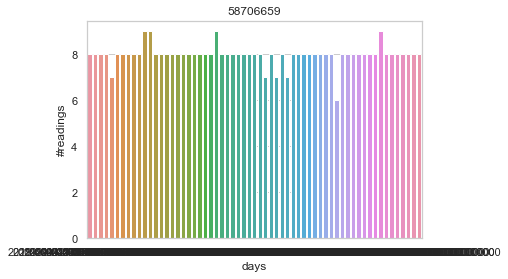

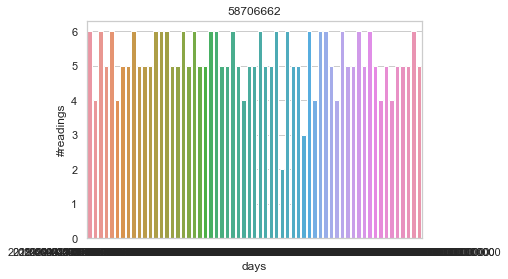

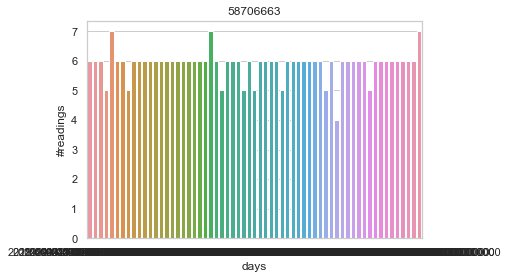

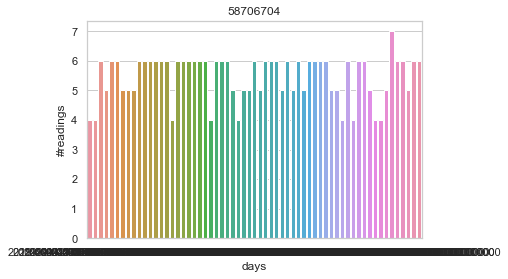

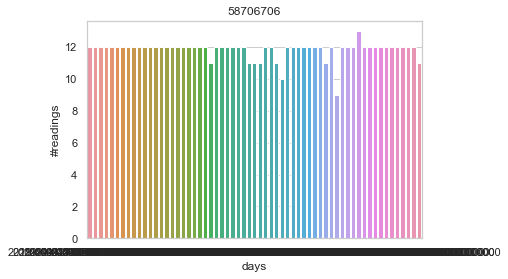

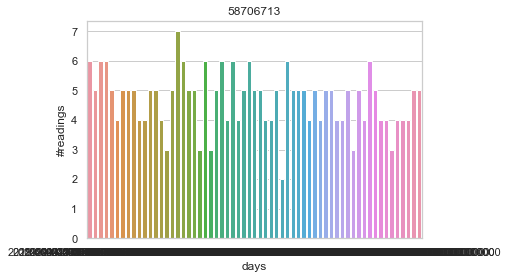

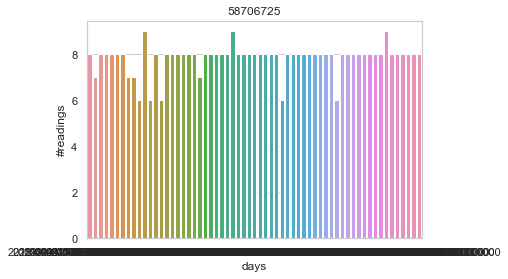

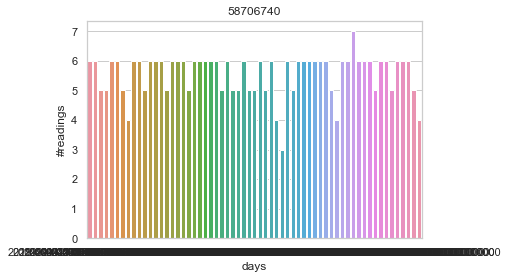

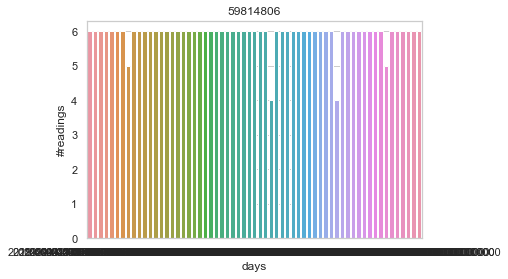

In [ ]:
for n,g in df_meters_uniform.groupby("medidor"):
    g.set_index("fecha", inplace = True)
    g = g.resample("D").count()
    figure = plt.figure()
    ax = sns.barplot(x = g.index, y = "voltajeA", data =g)
    ax.set(xlabel='days', ylabel='#readings', title = n)


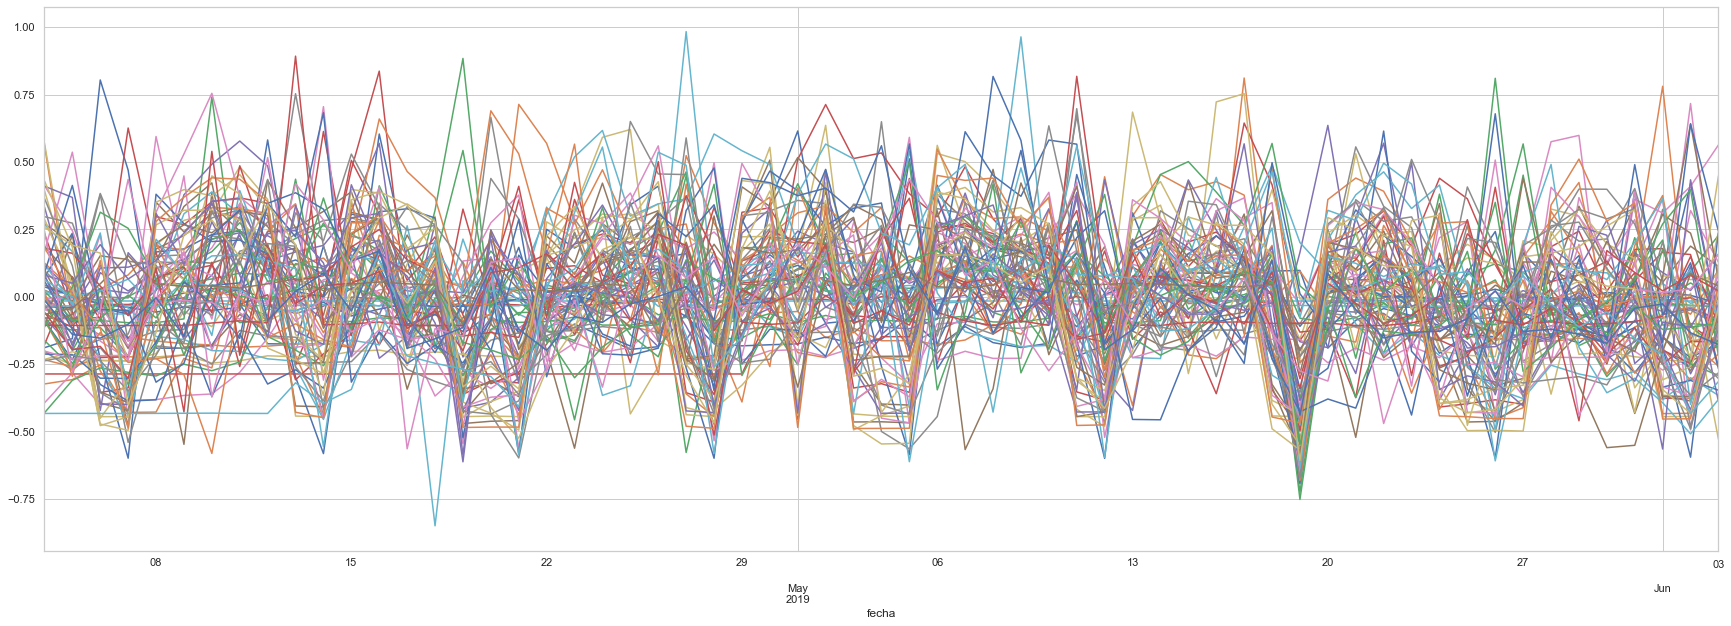

In [25]:
plt.figure(figsize=(30,10))
for n,g in df_meters_uniform.groupby("medidor"):
    g.set_index("fecha", inplace = True)
    g = g.resample("D").sum()
    g["kwh_consumido"] =(g["kwh_consumido"] - g["kwh_consumido"].mean()) / (g["kwh_consumido"].max() - g["kwh_consumido"].min())
    g["kwh_consumido"].plot()


### Filtrado de medidores que tienen latitud y longitud 0

In [38]:
df_filtceros = df.loc[(df['Latitud']!=0) & (df['Longitud']!=0),:]
df_filtceros

medidor               fecha  lectura_id_orig  voltajeA  voltajeB  \
0      15029828 2019-04-04 01:00:58          1141410  117.4806  117.7270   
1      15029828 2019-04-04 03:00:58          1141840  117.3321  117.5873   
2      15029828 2019-04-04 05:00:58          1142271  118.3265  118.3270   
3      15029828 2019-04-04 07:01:01          1142711  119.8214  119.9720   
4      15029828 2019-04-04 09:01:02          1143130  114.6726  114.8017   
5      15029828 2019-04-04 11:00:58          1143509  114.6649  114.8677   
6      15029828 2019-04-04 13:00:59          1143880  114.8444  115.3403   
7      15029828 2019-04-04 15:01:02          1144272  114.6778  114.8357   
8      15029828 2019-04-04 17:01:02          1144628  116.9224  117.2767   
9      15029828 2019-04-04 19:01:02          1145053  114.1925  114.8132   
10     15029828 2019-04-04 21:01:05          1145457  117.5392  117.8100   
11     15029828 2019-04-05 01:01:01          1146342  116.3292  116.4811   
12     15029828 2019-04-05 03:01:02          1146775  117.1580  115.7159   
13     15029828 2019-04-05 05:01:02          1147222  117.8144  117.9999   
14     15029828 2019-04-05 09:01:03          1148042  116.4599  116.4413   
15     15029828 2019-04-05 13:08:58          1149035  114.3455  114.0721   
16     15029828 2019-04-05 15:40:19          1149560  117.0340  116.8882   
17     15029828 2019-04-05 17:40:18          1149951  117.3378  117.1492   
18     15029828 2019-04-05 19:40:17          1150347  115.3972  116.1736   
19     15029828 2019-04-05 21:10:21          1150696  115.7649  116.0876   
20     15029828 2019-04-05 23:10:22          1151095  117.0613  117.5679   
21     15029828 2019-04-06 01:10:22          1151561  116.7214  115.9408   
22     15029828 2019-04-06 03:10:24          1151966  117.2874  117.5181   
23     15029828 2019-04-06 05:10:25          1152384  118.2599  117.9589   
24     15029828 2019-04-06 07:10:23          1152796  118.7317  117.9507   
25     15029828 2019-04-06 11:10:26          1153513  116.4383  116.1652   
26     15029828 2019-04-06 13:10:26          1153845  116.6304  116.6429   
27     15029828 2019-04-06 15:10:26          1154204  116.2677  116.1883   
28     15029828 2019-04-06 17:10:26          1154528  117.7125  117.3089   
29     15029828 2019-04-06 19:10:24          1154910  114.8396  115.1581   
...         ...                 ...              ...       ...       ...   
60584  59814806 2019-05-30 01:24:23          1419405  126.9000    0.0000   
60585  59814806 2019-05-30 05:24:21          1420206  127.8000    0.0000   
60586  59814806 2019-05-30 09:24:22          1420977  124.9000    0.0000   
60587  59814806 2019-05-30 13:24:22          1421728  125.5000    0.0000   
60588  59814806 2019-05-30 17:24:23          1422537  125.4000    0.0000   
60589  59814806 2019-05-30 21:24:26          1423273  125.2000    0.0000   
60590  59814806 2019-05-31 01:24:26          1424111  125.8000    0.0000   
60591  59814806 2019-05-31 05:24:28          1424863  126.0000    0.0000   
60592  59814806 2019-05-31 09:24:25          1425605  125.2000    0.0000   
60593  59814806 2019-05-31 13:24:25          1426317  123.2000    0.0000   
60594  59814806 2019-05-31 17:24:26          1427012  125.7000    0.0000   
60595  59814806 2019-05-31 21:24:27          1427767  125.1000    0.0000   
60596  59814806 2019-06-01 01:24:27          1428795  126.6000    0.0000   
60597  59814806 2019-06-01 05:24:27          1429590  127.5000    0.0000   
60598  59814806 2019-06-01 09:24:28          1430349  125.3000    0.0000   
60599  59814806 2019-06-01 13:24:28          1431022  124.0000    0.0000   
60600  59814806 2019-06-01 17:24:29          1431759  125.3000    0.0000   
60601  59814806 2019-06-01 21:24:30          1432506  124.8000    0.0000   
60602  59814806 2019-06-02 01:24:31          1433311  126.5000    0.0000   
60603  59814806 2019-06-02 05:24:31          1434079  127.7000    0.0000   
60604  59814806 2019-06-02 09:24:31          1434808  12

In [41]:
df_ultima_medicion=df_filtceros[df_filtceros["medidor"].isin(qqq.index)]
df_ultima_medicion["hora"] = df_ultima_medicion["fecha"].dt.hour
df_ultima_medicion["date"] = df_ultima_medicion["fecha"].dt.date

In [42]:
df_max_dia=df_ultima_medicion.groupby(['medidor','date'])['hora'].max().unstack()
df_max_dia

date      2019-04-04  2019-04-05  2019-04-06  2019-04-07  2019-04-08  \
medidor                                                                
15029835          22          23          23          23          23   
15029844          23          22          22          22          23   
15029846          22          22          22          22          22   
15029847          23          22          22          22          22   
15029977          22          22          22          22          22   
15842885          22          22          22          22          22   
15842894          22          22          22          22          22   
16567743          23          22          22          22          22   
16567746          22          22          22          22          22   
16567760          22          22          22          22          22   
16567761          22          22          22          22          22   
16567763          22          22          22          22          21   
16951175          22          22          22          22          22   
16951176          22          23          23          23          23   
16951180          22          22          18          22          23   
16951199          23          22          22          22          22   
16951201          22          22          22          22          22   
16951203          22          22          22          22          22   
16951205          22          22          22          22          22   
16951207          22          22          22          22          22   
16951208          22          22          22          22          22   
16951209          22          22          22          22          22   
16951216          23          22          22          22          21   
16951219          22          22          22          22          22   
16951220          22          22          22          22          22   
16951221          22          22          22          22          22   
16951222          23          22          22          22          22   
28006904          23          22          22          22          22   
28877074          20          22          22          22          22   
35924863          22          22          21          21          21   
...              ...         ...         ...         ...         ...   
52073194          21          20          20          20          20   
52073200          20          22          21          21          21   
52073201          23          21          21          21          21   
52073218          23          20          20          20          20   
52073240          23          20          20          20          20   
52073290          23          20          20          20          20   
52073292          20          20          20          20          20   
52073295          21          20          20          20          20   
52073302          21          20          20          20          20   
52073321          23          20          20          20          20   
52073345          23          22          22          22          22   
52073348          23          22          22          22          22   
52073352          22          22          22          22          22   
52073359          21          22          22          22          22   
52073382          21          22          22          22          22   
53307830          21          22          22          21          21   
53307859          21          20          20          20          20   
53307871          23          20          20          20          21   
53444735          20          23          21          21          21   
58706632          21          22          21          21          21   
58706634          20          22          22          22          22   
58706655          21          22          22          22          22   
58706659          23          20        

In [46]:
df_max_dia['Min_hora_max']= df_max_dia.min(axis=1)
df_max_dia['Min_hora_max']

medidor
15029835    22
15029844    18
15029846    22
15029847    20
15029977    22
15842885    20
15842894    20
16567743    22
16567746    20
16567760    20
16567761    20
16567763    20
16951175    22
16951176    21
16951180    18
16951199    21
16951201    22
16951203    21
16951205    20
16951207    22
16951208    22
16951209    22
16951216    21
16951219    22
16951220    20
16951221    20
16951222    20
28006904    20
28877074    20
35924863    20
            ..
52073194    20
52073200    20
52073201    17
52073218    20
52073240    17
52073290     8
52073292    20
52073295    20
52073302    20
52073321    18
52073345    20
52073348    18
52073352    20
52073359    20
52073382    13
53307830    17
53307859    20
53307871     8
53444735    17
58706632    20
58706634    18
58706655    20
58706659    20
58706662    12
58706663    20
58706704    12
58706706    22
58706725    18
58706740    17
59814806    20
Name: Min_hora_max, Length: 72, dtype: int64

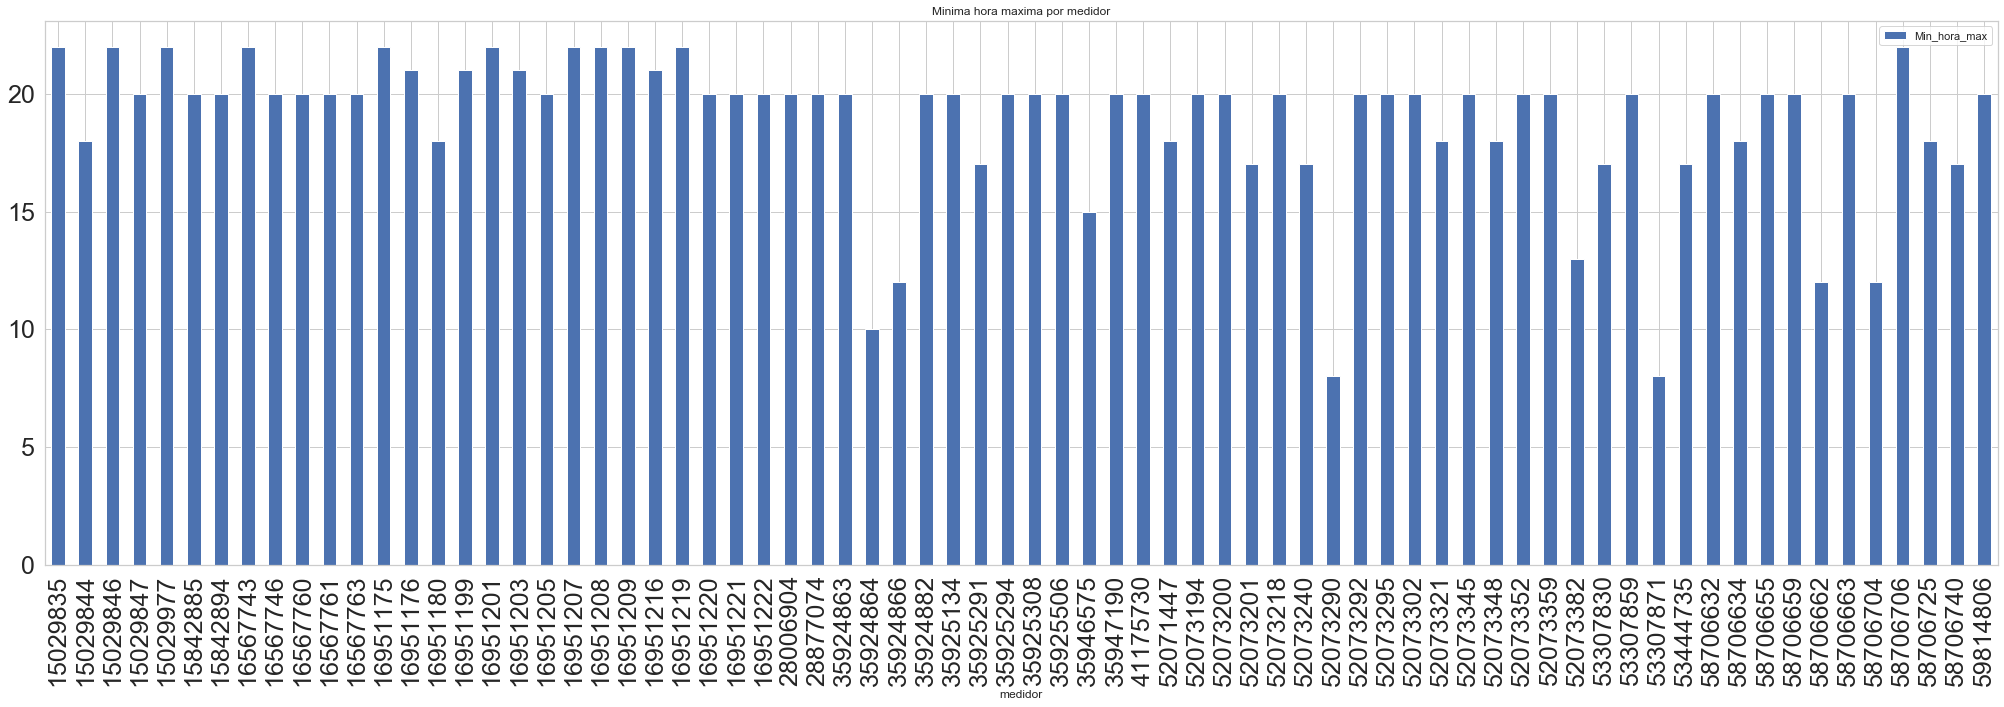

In [44]:
ax = df_max_dia['Min_hora_max'].plot(kind='bar', title ="Minima hora maxima por medidor",figsize=(35,10),legend=True, fontsize=25)
ax

In [47]:
df_min_dia=df_ultima_medicion.groupby(['medidor','date'])['hora'].min().unstack()
df_min_dia

date      2019-04-04  2019-04-05  2019-04-06  2019-04-07  2019-04-08  \
medidor                                                                
15029835           0           0           1           1           1   
15029844           1           1           0           0           0   
15029846           0           0           0           0           0   
15029847           1           1           0           0           0   
15029977           0           0           0           0           0   
15842885           0           0           0           0           2   
15842894           0           0           0           0           0   
16567743           1           1           0           0           0   
16567746           1           0           0           0           0   
16567760           0           0           0           0           0   
16567761           0           0           0           0           0   
16567763           0           0           0           0           0   
16951175           0           0           0           0           0   
16951176           0           0           1           1           1   
16951180           0           0           0           0           0   
16951199           1           1           0           0           0   
16951201           0           0           0           4           0   
16951203           0           0           0           0           0   
16951205           0           0           0           0           0   
16951207           0           0           0           0           0   
16951208           0           0           0           0           0   
16951209           0           0           0           0           0   
16951216           1           1           0           0           0   
16951219           0           0           0           0           0   
16951220           0           0           0           0           0   
16951221           0           0           0           0           0   
16951222           1           1           0           0           2   
28006904           3           3           2           2           2   
28877074           0           0           2           2           2   
35924863           2           2           2           1           1   
...              ...         ...         ...         ...         ...   
52073194           1           1           0           0           0   
52073200           0           0           2           1           1   
52073201           3           3           1           1           1   
52073218           3           3           0           0           0   
52073240           3           3           0           0           0   
52073290           3           3           0           0           0   
52073292           0           0           0           0           0   
52073295           1           1           0           0           0   
52073302           1           1           0           0           0   
52073321           1           1           0           0           0   
52073345           3           3           2           2           2   
52073348           3           3           2           2           2   
52073352           2           2           2           2           2   
52073359           1           1           2           2           2   
52073382           1           1           2           2           2   
53307830           1           1           2           2           1   
53307859           1           1           0           0           0   
53307871           3           3           0           0           0   
53444735           0           0           1           1           1   
58706632           2           1           2           1           1   
58706634           0           0           2           2           2   
58706655           1           1           2           2           2   
58706659           1           1        

In [49]:
df_min_dia['Max_hora_min']= df_min_dia.max(axis=1)
df_min_dia['Max_hora_min']

medidor
15029835     1
15029844     2
15029846     1
15029847     4
15029977     2
15842885     5
15842894     1
16567743     1
16567746     2
16567760     1
16567761     2
16567763     1
16951175     2
16951176     3
16951180     2
16951199     1
16951201     4
16951203     2
16951205     2
16951207     0
16951208     0
16951209     0
16951216     3
16951219     2
16951220     0
16951221     0
16951222     2
28006904     5
28877074     6
35924863     3
            ..
52073194     3
52073200     3
52073201     6
52073218     5
52073240     5
52073290    14
52073292     9
52073295     7
52073302     3
52073321     6
52073345     3
52073348     6
52073352     2
52073359    19
52073382     5
53307830     3
53307859     4
53307871    15
53444735     7
58706632     3
58706634    18
58706655     3
58706659     3
58706662     5
58706663     6
58706704    10
58706706     1
58706725     4
58706740     3
59814806     4
Name: Max_hora_min, Length: 72, dtype: int64

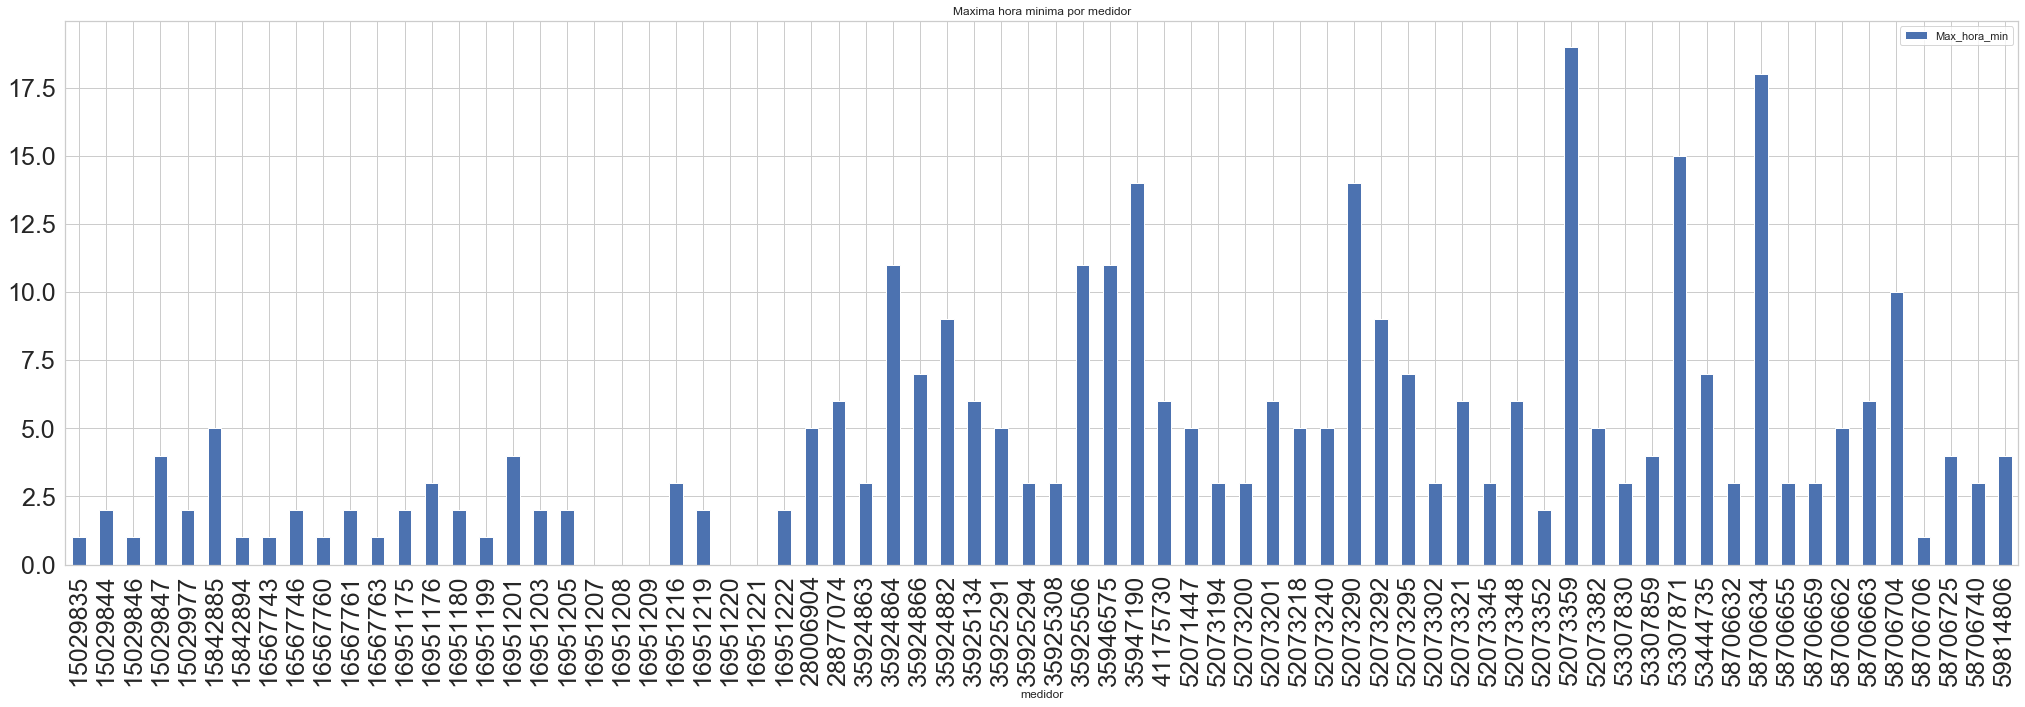

In [50]:
ax = df_min_dia['Max_hora_min'].plot(kind='bar', title ="Maxima hora minima por medidor",figsize=(35,10),legend=True, fontsize=25)
ax

In [52]:
df_filtceros['hora'] = df_filtceros['fecha'].dt.hour

In [54]:
df_filtrado_horas = df_filtceros.loc[(df_filtceros['hora']>=8) & (df_filtceros['hora']<=19),:]
df_filtrado_horas

medidor               fecha  lectura_id_orig  voltajeA  voltajeB  \
4      15029828 2019-04-04 09:01:02          1143130  114.6726  114.8017   
5      15029828 2019-04-04 11:00:58          1143509  114.6649  114.8677   
6      15029828 2019-04-04 13:00:59          1143880  114.8444  115.3403   
7      15029828 2019-04-04 15:01:02          1144272  114.6778  114.8357   
8      15029828 2019-04-04 17:01:02          1144628  116.9224  117.2767   
9      15029828 2019-04-04 19:01:02          1145053  114.1925  114.8132   
14     15029828 2019-04-05 09:01:03          1148042  116.4599  116.4413   
15     15029828 2019-04-05 13:08:58          1149035  114.3455  114.0721   
16     15029828 2019-04-05 15:40:19          1149560  117.0340  116.8882   
17     15029828 2019-04-05 17:40:18          1149951  117.3378  117.1492   
18     15029828 2019-04-05 19:40:17          1150347  115.3972  116.1736   
25     15029828 2019-04-06 11:10:26          1153513  116.4383  116.1652   
26     15029828 2019-04-06 13:10:26          1153845  116.6304  116.6429   
27     15029828 2019-04-06 15:10:26          1154204  116.2677  116.1883   
28     15029828 2019-04-06 17:10:26          1154528  117.7125  117.3089   
29     15029828 2019-04-06 19:10:24          1154910  114.8396  115.1581   
36     15029828 2019-04-07 09:10:26          1157757  117.4396  117.5319   
37     15029828 2019-04-07 11:10:26          1158113  116.9756  116.9406   
38     15029828 2019-04-07 15:10:28          1158841  115.3887  115.5478   
39     15029828 2019-04-07 17:10:30          1159208  117.0205  116.8766   
45     15029828 2019-04-08 09:10:29          1162522  116.0592  116.3544   
46     15029828 2019-04-08 11:10:29          1162881  113.9265  113.8277   
47     15029828 2019-04-08 13:10:33          1163226  114.3474  114.5445   
48     15029828 2019-04-08 15:10:30          1163621  115.5537  114.9421   
49     15029828 2019-04-08 17:10:30          1163992  117.0869  117.2521   
53     15029828 2019-04-09 09:00:55          1167233  114.0954  113.9169   
54     15029828 2019-04-09 11:00:53          1167582  112.2822  112.6620   
55     15029828 2019-04-09 17:16:13          1168776  115.7303  116.2589   
56     15029828 2019-04-09 19:16:12          1169170  114.6317  115.1382   
62     15029828 2019-04-10 09:16:14          1171981  112.9006  113.2480   
...         ...                 ...              ...       ...       ...   
60553  59814806 2019-05-24 17:24:04          1393246  125.1000    0.0000   
60557  59814806 2019-05-25 09:24:06          1396630  123.7000    0.0000   
60558  59814806 2019-05-25 13:24:07          1397398  124.1000    0.0000   
60559  59814806 2019-05-25 17:24:07          1398182  125.0000    0.0000   
60563  59814806 2019-05-26 09:24:11          1401530  126.0000    0.0000   
60564  59814806 2019-05-26 13:24:12          1402285  124.7000    0.0000   
60565  59814806 2019-05-26 17:24:10          1403109  125.6000    0.0000   
60569  59814806 2019-05-27 09:24:14          1406446  126.5000    0.0000   
60570  59814806 2019-05-27 13:24:13          1407242  125.2000    0.0000   
60571  59814806 2019-05-27 17:24:14          1408071  125.5000    0.0000   
60575  59814806 2019-05-28 09:24:16          1411401  125.2000    0.0000   
60576  59814806 2019-05-28 13:24:16          1412170  124.5000    0.0000   
60580  59814806 2019-05-29 09:24:21          1416242  125.4000    0.0000   
60581  59814806 2019-05-29 13:24:22          1417001  124.5000    0.0000   
60582  59814806 2019-05-29 17:24:23          1417789  124.6000    0.0000   
60586  59814806 2019-05-30 09:24:22          1420977  124.9000    0.0000   
60587  59814806 2019-05-30 13:24:22          1421728  125.5000    0.0000   
60588  59814806 2019-05-30 17:24:23          1422537  125.4000    0.0000   
60592  59814806 2019-05-31 09:24:25          1425605  125.2000    0.0000   
60593  59814806 2019-05-31 13:24:25          1426317  123.2000    0.0000   
60594  59814806 2019-05-31 17:24:26          1427012  12

In [55]:
df_filt_meters_uniform = df_filtrado_horas[df_filtrado_horas["medidor"].isin(qqq.index)]

In [ ]:
for n,g in df_filt_meters_uniform.groupby("medidor"):
    g.set_index("fecha", inplace = True)
    g = g.resample("D").count()
    figure = plt.figure()
    ax = sns.barplot(x = g.index, y = "voltajeA", data =g)
    ax.set(xlabel='days', ylabel='#readings', title = n)

# CLUSTERS GEOGRAFICOS

### Dataset de medidores filtrados con su latitud y longitud

In [32]:
df_filtrado_geo = df_filtrado_horas[['medidor','Latitud','Longitud']].groupby('medidor').mean()
df_filtrado_geo

Latitud  Longitud
medidor                    
15029828 -1.85053  -79.4001
15029835 -1.56845  -79.4733
15029844 -1.62801  -79.5566
15029846 -1.54981  -79.7512
15029847 -1.79919  -79.5334
15029974 -1.56032  -79.7599
15029977 -1.44379  -79.7628
15842884 -1.55775  -79.7517
15842885 -1.79843  -79.5270
15842894 -1.84812  -79.5505
15842921 -1.80610  -79.3035
16567733 -1.19584  -79.4249
16567738 -1.77115  -79.6313
16567740 -1.77115  -79.6313
16567743 -1.79777  -79.5306
16567746 -1.78370  -79.6816
16567753  0.00000    0.0000
16567757 -1.26879  -79.4269
16567758 -1.26879  -79.4269
16567759 -1.45009  -79.7651
16567760 -1.44995  -79.7651
16567761 -1.43453  -79.4659
16567762 -1.55790  -79.5285
16567763 -1.55790  -79.5285
16567764 -1.55790  -79.5285
16951175 -1.77600  -79.5371
16951176 -1.77600  -79.5371
16951177 -1.77600  -79.5371
16951179 -1.43453  -79.4659
16951180 -1.55790  -79.5285
...           ...       ...
52073290 -1.43925  -79.4658
52073292 -1.44450  -79.4576
52073295 -1.59453  -79.7246
52073302 -1.79869  -79.5301
52073321 -1.79777  -79.5312
52073331  0.00000    0.0000
52073345 -1.79993  -79.5280
52073348 -1.44192  -79.4607
52073352 -1.80424  -79.5349
52073359 -1.79935  -79.5368
52073382 -1.80095  -79.5392
53307830 -1.55706  -79.7553
53307859 -1.83367  -79.6092
53307861 -1.56128  -79.7567
53307871 -1.54452  -79.5282
53444735 -1.72475  -79.5170
58706632 -1.81002  -79.5421
58706634 -1.44835  -79.4679
58706655 -1.79918  -79.5316
58706656 -1.96033  -79.3981
58706659 -1.80011  -79.5385
58706662 -1.80861  -79.5414
58706663 -1.59054  -79.5439
58706704 -1.64375  -79.8022
58706706 -1.44136  -79.4604
58706709 -1.67630  -79.6371
58706713  0.00000    0.0000
58706725 -1.85471  -79.5523
58706740 -1.42994  -79.4603
59814806 -1.79876  -79.5300

[112 rows x 2 columns]

In [33]:
df_filtrado_horas.loc[df_filtrado_horas['Latitud']==0,'Latitud']
df_filtrado_horas.head

<bound method NDFrame.head of         medidor               fecha  lectura_id_orig  voltajeA  voltajeB  \
3      15029828 2019-04-04 07:01:01          1142711  119.8214  119.9720   
4      15029828 2019-04-04 09:01:02          1143130  114.6726  114.8017   
5      15029828 2019-04-04 11:00:58          1143509  114.6649  114.8677   
6      15029828 2019-04-04 13:00:59          1143880  114.8444  115.3403   
7      15029828 2019-04-04 15:01:02          1144272  114.6778  114.8357   
8      15029828 2019-04-04 17:01:02          1144628  116.9224  117.2767   
9      15029828 2019-04-04 19:01:02          1145053  114.1925  114.8132   
10     15029828 2019-04-04 21:01:05          1145457  117.5392  117.8100   
14     15029828 2019-04-05 09:01:03          1148042  116.4599  116.4413   
15     15029828 2019-04-05 13:08:58          1149035  114.3455  114.0721   
16     15029828 2019-04-05 15:40:19          1149560  117.0340  116.8882   
17     15029828 2019-04-05 17:40:18          1149951  117.

In [34]:
df_ceros= df_filtrado_geo.loc[df_filtrado_geo['Latitud']==0,:]
df_ceros

Latitud  Longitud
medidor                    
16567753      0.0       0.0
16951181      0.0       0.0
20037228      0.0       0.0
35947180      0.0       0.0
52071420      0.0       0.0
52071428      0.0       0.0
52071455      0.0       0.0
52073196      0.0       0.0
52073264      0.0       0.0
52073331      0.0       0.0
58706713      0.0       0.0

In [35]:
df_filtrado_geovalida = df_filtrado_geo.loc[df_filtrado_geo['Latitud']!=0,:]
df_filtrado_geovalida

Latitud  Longitud
medidor                    
15029828 -1.85053  -79.4001
15029835 -1.56845  -79.4733
15029844 -1.62801  -79.5566
15029846 -1.54981  -79.7512
15029847 -1.79919  -79.5334
15029974 -1.56032  -79.7599
15029977 -1.44379  -79.7628
15842884 -1.55775  -79.7517
15842885 -1.79843  -79.5270
15842894 -1.84812  -79.5505
15842921 -1.80610  -79.3035
16567733 -1.19584  -79.4249
16567738 -1.77115  -79.6313
16567740 -1.77115  -79.6313
16567743 -1.79777  -79.5306
16567746 -1.78370  -79.6816
16567757 -1.26879  -79.4269
16567758 -1.26879  -79.4269
16567759 -1.45009  -79.7651
16567760 -1.44995  -79.7651
16567761 -1.43453  -79.4659
16567762 -1.55790  -79.5285
16567763 -1.55790  -79.5285
16567764 -1.55790  -79.5285
16951175 -1.77600  -79.5371
16951176 -1.77600  -79.5371
16951177 -1.77600  -79.5371
16951179 -1.43453  -79.4659
16951180 -1.55790  -79.5285
16951182 -1.43453  -79.4659
...           ...       ...
52073240 -1.79881  -79.5310
52073259 -1.79840  -79.5291
52073290 -1.43925  -79.4658
52073292 -1.44450  -79.4576
52073295 -1.59453  -79.7246
52073302 -1.79869  -79.5301
52073321 -1.79777  -79.5312
52073345 -1.79993  -79.5280
52073348 -1.44192  -79.4607
52073352 -1.80424  -79.5349
52073359 -1.79935  -79.5368
52073382 -1.80095  -79.5392
53307830 -1.55706  -79.7553
53307859 -1.83367  -79.6092
53307861 -1.56128  -79.7567
53307871 -1.54452  -79.5282
53444735 -1.72475  -79.5170
58706632 -1.81002  -79.5421
58706634 -1.44835  -79.4679
58706655 -1.79918  -79.5316
58706656 -1.96033  -79.3981
58706659 -1.80011  -79.5385
58706662 -1.80861  -79.5414
58706663 -1.59054  -79.5439
58706704 -1.64375  -79.8022
58706706 -1.44136  -79.4604
58706709 -1.67630  -79.6371
58706725 -1.85471  -79.5523
58706740 -1.42994  -79.4603
59814806 -1.79876  -79.5300

[101 rows x 2 columns]

## Aplicando DBSCAN para obtener clusters geograficos

In [110]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [131]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.1).fit(df_filtrado_geovalida)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(labels)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


[-1  0  0  1  0  1 -1  1  0  0 -1 -1  0  0  0  0 -1 -1 -1 -1  2  0  0  0
  0  0  0  2  0  2 -1 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  2  0  0  0  0  0  0  0  0  2  2  0 -1  2  2  0  0  0  0  0  0  0  0  0
  0  2  2  1  0  0  0  2  0  0  0  1  0  1  0  0  0  2  0 -1  0  0  0  1
  2  0  0  2  0]
Estimated number of clusters: 3
Estimated number of noise points: 12


In [132]:
df_filtrado_cluster = df_filtrado_geovalida
df_filtrado_cluster['ClustersGeograficos'] = labels
df_filtrado_cluster

Latitud  Longitud  ClustersGeograficos
medidor                                         
15029828 -1.85053  -79.4001                   -1
15029835 -1.56845  -79.4733                    0
15029844 -1.62801  -79.5566                    0
15029846 -1.54981  -79.7512                    1
15029847 -1.79919  -79.5334                    0
15029974 -1.56032  -79.7599                    1
15029977 -1.44379  -79.7628                   -1
15842884 -1.55775  -79.7517                    1
15842885 -1.79843  -79.5270                    0
15842894 -1.84812  -79.5505                    0
15842921 -1.80610  -79.3035                   -1
16567733 -1.19584  -79.4249                   -1
16567738 -1.77115  -79.6313                    0
16567740 -1.77115  -79.6313                    0
16567743 -1.79777  -79.5306                    0
16567746 -1.78370  -79.6816                    0
16567757 -1.26879  -79.4269                   -1
16567758 -1.26879  -79.4269                   -1
16567759 -1.45009  -79.7651                   -1
16567760 -1.44995  -79.7651                   -1
16567761 -1.43453  -79.4659                    2
16567762 -1.55790  -79.5285                    0
16567763 -1.55790  -79.5285                    0
16567764 -1.55790  -79.5285                    0
16951175 -1.77600  -79.5371                    0
16951176 -1.77600  -79.5371                    0
16951177 -1.77600  -79.5371                    0
16951179 -1.43453  -79.4659                    2
16951180 -1.55790  -79.5285                    0
16951182 -1.43453  -79.4659                    2
...           ...       ...                  ...
52073240 -1.79881  -79.5310                    0
52073259 -1.79840  -79.5291                    0
52073290 -1.43925  -79.4658                    2
52073292 -1.44450  -79.4576                    2
52073295 -1.59453  -79.7246                    1
52073302 -1.79869  -79.5301                    0
52073321 -1.79777  -79.5312                    0
52073345 -1.79993  -79.5280                    0
52073348 -1.44192  -79.4607                    2
52073352 -1.80424  -79.5349                    0
52073359 -1.79935  -79.5368                    0
52073382 -1.80095  -79.5392                    0
53307830 -1.55706  -79.7553                    1
53307859 -1.83367  -79.6092                    0
53307861 -1.56128  -79.7567                    1
53307871 -1.54452  -79.5282                    0
53444735 -1.72475  -79.5170                    0
58706632 -1.81002  -79.5421                    0
58706634 -1.44835  -79.4679                    2
58706655 -1.79918  -79.5316                    0
58706656 -1.96033  -79.3981                   -1
58706659 -1.80011  -79.5385                    0
58706662 -1.80861  -79.5414                    0
58706663 -1.59054  -79.5439                    0
58706704 -1.64375  -79.8022                    1
58706706 -1.44136  -79.4604                    2
58706709 -1.67630  -79.6371                    0
58706725 -1.85471  -79.5523                    0
58706740 -1.42994  -79.4603                    2
59814806 -1.79876  -79.5300                    0

[101 rows x 3 columns]

In [133]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

NameError: name 'labels_true' is not defined

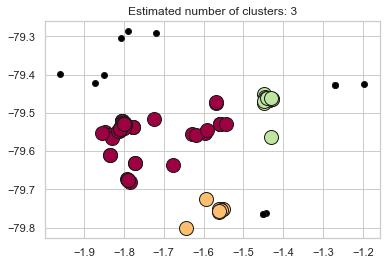

In [134]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    #print(type(xy))
    #print(xy)
    xy = df_filtrado_cluster[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_filtrado_geovalida[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.show()

## Clúster de factor de potencia

In [ ]:
#medidores = list(df_filtrado_horas["medidor"].unique())
#nodos = open("nodos.csv", "w")
#nodos.write("id,label,powerfactor\n")
#nodo_1 = []
#for i,m in enumerate(medidores):
 #   lat = str(df_filtrado_horas[df_filtrado_horas["medidor"]==m]["Latitud"].unique()[0])
 #   long = str(df_filtrado_horas[df_filtrado_horas["medidor"]==m]["Longitud"].unique()[0])
#    powerfactor=str(df_filtrado_horas[df_filtrado_horas["medidor"]==m]["powerfactorsystem"].mean())
#  if not(lat == "0.0" and long == "0.0"):
  #      nodos.write(str(i+1)+","+str(m)+","+powerfactor+"\n")
   #     nodo_1.append(m)
#nodos.close()

In [80]:
df_factorP=df_final[["medidor","powerfactorsystem"]].groupby("medidor").mean()
dff=df_factorP.sample(int(df_factorP.shape[0]*0.80))
dff

powerfactorsystem
medidor                    
16951205          -0.314890
16951210           0.918363
35925134           0.831603
16951207           0.911226
52073218           0.956744
52071447           0.938221
16951182           0.931533
16567757           0.936074
15029828           0.206135
52073290           0.929342
15029844           0.797257
52073302           0.930703
58706706           0.956212
16951221           0.923372
35925294           0.861323
16567733           0.873851
58706634           0.810786
58706725           0.235271
15842884           0.000000
52073194           0.452559
16567761           0.892325
16951176           0.936057
59814806           0.968635
52073345           0.944576
15842885           0.000000
16951175           0.925621
35925506           0.938544
16567759           0.909507
16951216           0.796576
35924882           0.876877
...                     ...
52073359           0.852120
16567762           0.916771
52073295           0.844382
52073201           0.423291
16951177           0.989297
52073259           0.976312
35924863           0.887978
17548289           0.000000
16951219           0.946583
16951180           0.914514
15029974           0.949793
16951203           0.009632
58706662           0.943081
15029835           0.829890
15842921           0.000000
35946575           0.921343
58706656           0.889871
15029977           0.938049
53444735           0.844377
16951222           0.955623
58706655           0.926943
35925308           0.980073
15029846           0.908722
20037214           0.489075
35924864           0.802324
52073321           0.970216
53307830           0.934269
52073200           0.891863
16567758           0.910493
52073240           0.954375

[80 rows x 1 columns]

k: 1  cost: 7.744391788350654
k: 2  cost: 0.8420230679780225
k: 3  cost: 0.3772486924236945
k: 4  cost: 0.24118191657190877
k: 5  cost: 0.14363462180046319
k: 6  cost: 0.0663271510378363
k: 7  cost: 0.04113208589315526
k: 8  cost: 0.026290870222843377
k: 9  cost: 0.017799322808809206


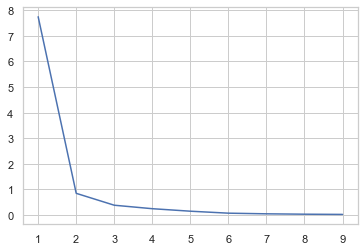

In [81]:
from sklearn.cluster import KMeans
 
A=dff
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [135]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random')
X=dff.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [136]:
kmeans.cluster_centers_

array([[0.78078947, 2.        ],
       [0.77137748, 0.71186441]])

In [137]:
distance=kmeans.fit_transform(X)
distance

array([[1.12383232, 1.48341276],
       [1.29649456, 0.13757388],
       [1.28954272, 0.05081359],
       [0.72547117, 2.00424888],
       [0.34261193, 1.01536204],
       [0.33295494, 1.01231655],
       [0.32965429, 1.011298  ],
       [1.29862165, 0.15528433],
       [1.40669552, 0.57465439],
       [0.72918019, 2.00550938],
       [0.2892955 , 1.00013559],
       [1.29795145, 0.14991366],
       [0.34232419, 1.01526991],
       [0.7279103 , 2.00507604],
       [0.30184816, 1.00323758],
       [0.71920222, 2.00216396],
       [1.28873826, 0.02999625],
       [0.60863141, 1.13911821],
       [1.0496543 , 2.1470054 ],
       [0.77999751, 2.02675485],
       [1.29380126, 0.11153588],
       [0.73066426, 2.00601794],
       [0.3491883 , 1.01748994],
       [1.29972724, 0.16378618],
       [0.82343508, 1.26871281],
       [0.32682274, 1.01043362],
       [1.29893725, 0.15775459],
       [0.31953403, 1.00825012],
       [1.28838204, 0.01578667],
       [0.30684258, 1.00460585],
       [0.

In [138]:
labels=kmeans.labels_
labels

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [139]:
df_consumo = dff
df_consumo['ClustersConsumo'] = labels
df_consumo

powerfactorsystem  ClustersConsumo
medidor                                     
16951205          -0.314890                0
16951210           0.918363                1
35925134           0.831603                1
16951207           0.911226                0
52073218           0.956744                0
52071447           0.938221                0
16951182           0.931533                0
16567757           0.936074                1
15029828           0.206135                1
52073290           0.929342                0
15029844           0.797257                0
52073302           0.930703                1
58706706           0.956212                0
16951221           0.923372                0
35925294           0.861323                0
16567733           0.873851                0
58706634           0.810786                1
58706725           0.235271                0
15842884           0.000000                0
52073194           0.452559                0
16567761           0.892325                1
16951176           0.936057                0
59814806           0.968635                0
52073345           0.944576                1
15842885           0.000000                0
16951175           0.925621                0
35925506           0.938544                1
16567759           0.909507                0
16951216           0.796576                1
35924882           0.876877                0
...                     ...              ...
52073359           0.852120                0
16567762           0.916771                0
52073295           0.844382                0
52073201           0.423291                0
16951177           0.989297                1
52073259           0.976312                0
35924863           0.887978                0
17548289           0.000000                0
16951219           0.946583                0
16951180           0.914514                0
15029974           0.949793                0
16951203           0.009632                0
58706662           0.943081                0
15029835           0.829890                1
15842921           0.000000                0
35946575           0.921343                0
58706656           0.889871                0
15029977           0.938049                0
53444735           0.844377                1
16951222           0.955623                0
58706655           0.926943                0
35925308           0.980073                1
15029846           0.908722                0
20037214           0.489075                1
35924864           0.802324                0
52073321           0.970216                1
53307830           0.934269                0
52073200           0.891863                0
16567758           0.910493                1
52073240           0.954375                0

[80 rows x 2 columns]

In [55]:
dfff = pd.DataFrame()
count=0
for n,g in df_final.groupby("medidor"):
    g.set_index("fecha", inplace = True)
    g = g.resample("8H").mean()
    if(count==0):
        dfff=g
    else:
        dfff=pd.concat(dfff,g)
dfff

medidor  lectura_id_orig  voltajeA  voltajeB  \
fecha                                                                  
2019-04-04 08:00:00  59814806.0        1143376.5    125.10       0.0   
2019-04-04 16:00:00  59814806.0        1144920.5    126.20       0.0   
2019-04-05 00:00:00         NaN              NaN       NaN       NaN   
2019-04-05 08:00:00  59814806.0        1148354.0    124.40       0.0   
2019-04-05 16:00:00  59814806.0        1150172.5    125.85       0.0   
2019-04-06 00:00:00         NaN              NaN       NaN       NaN   
2019-04-06 08:00:00  59814806.0        1153380.5    125.60       0.0   
2019-04-06 16:00:00  59814806.0        1154777.0    125.20       0.0   
2019-04-07 00:00:00         NaN              NaN       NaN       NaN   
2019-04-07 08:00:00  59814806.0        1157971.5    125.35       0.0   
2019-04-07 16:00:00  59814806.0        1159466.5    123.95       0.0   
2019-04-08 00:00:00         NaN              NaN       NaN       NaN   
2019-04-08 08:00:00  59814806.0        1162730.5    123.35       0.0   
2019-04-08 16:00:00  59814806.0        1164236.5    124.85       0.0   
2019-04-09 00:00:00         NaN              NaN       NaN       NaN   
2019-04-09 08:00:00  59814806.0        1167500.0    123.15       0.0   
2019-04-09 16:00:00  59814806.0        1169035.0    125.05       0.0   
2019-04-10 00:00:00         NaN              NaN       NaN       NaN   
2019-04-10 08:00:00  59814806.0        1172233.0    123.30       0.0   
2019-04-10 16:00:00  59814806.0        1173721.5    123.50       0.0   
2019-04-11 00:00:00         NaN              NaN       NaN       NaN   
2019-04-11 08:00:00  59814806.0        1176800.5    123.60       0.0   
2019-04-11 16:00:00  59814806.0        1178240.0    123.90       0.0   
2019-04-12 00:00:00         NaN              NaN       NaN       NaN   
2019-04-12 08:00:00  59814806.0        1181304.5    125.50       0.0   
2019-04-12 16:00:00  59814806.0        1182763.0    124.30       0.0   
2019-04-13 00:00:00         NaN              NaN       NaN       NaN   
2019-04-13 08:00:00  59814806.0        1185817.0    123.70       0.0   
2019-04-13 16:00:00  59814806.0        1187226.5    123.50       0.0   
2019-04-14 00:00:00         NaN              NaN       NaN       NaN   
...                         ...              ...       ...       ...   
2019-05-25 00:00:00         NaN              NaN       NaN       NaN   
2019-05-25 08:00:00  59814806.0        1397014.0    123.90       0.0   
2019-05-25 16:00:00  59814806.0        1398579.0    125.15       0.0   
2019-05-26 00:00:00         NaN              NaN       NaN       NaN   
2019-05-26 08:00:00  59814806.0        1401907.5    125.35       0.0   
2019-05-26 16:00:00  59814806.0        1403526.5    125.05       0.0   
2019-05-27 00:00:00         NaN              NaN       NaN       NaN   
2019-05-27 08:00:00  59814806.0        1406844.0    125.85       0.0   
2019-05-27 16:00:00  59814806.0        1408482.5    125.30       0.0   
2019-05-28 00:00:00         NaN              NaN       NaN       NaN   
2019-05-28 08:00:00  59814806.0        1411785.5    124.85       0.0   
2019-05-28 16:00:00  59814806.0        1413758.0    124.10       0.0   
2019-05-29 00:00:00         NaN              NaN       NaN       NaN   
2019-05-29 08:00:00  59814806.0        1416621.5    124.95       0.0   
2019-05-29 16:00:00  59814806.0        1418178.5    124.85       0.0   
2019-05-30 00:00:00         NaN              NaN       NaN       NaN   
2019-05-30 08:00:00  59814806.0        1421352.5    125.20       0.0   
2019-05-30 16:00:00  59814806.0        1422905.0    125.30       0.0   
2019-05-31 00:00:00         NaN              NaN       NaN       NaN   
2019-05-31 08:00:00  59814806.0        1425961.0    124.20       0.0   
2019-05-31 16:00:00  59814806.0        1427389.5    125.40       0.0   
2019-06-01 00:00:00         NaN              NaN       NaN       NaN   
2019-06-01 08:00:00  59814806.0        1430685.5    124.65      

In [49]:
dfff.index

DatetimeIndex(['2019-04-04 08:00:00', '2019-04-04 16:00:00',
               '2019-04-05 00:00:00', '2019-04-05 08:00:00',
               '2019-04-05 16:00:00', '2019-04-06 00:00:00',
               '2019-04-06 08:00:00', '2019-04-06 16:00:00',
               '2019-04-07 00:00:00', '2019-04-07 08:00:00',
               ...
               '2019-05-31 16:00:00', '2019-06-01 00:00:00',
               '2019-06-01 08:00:00', '2019-06-01 16:00:00',
               '2019-06-02 00:00:00', '2019-06-02 08:00:00',
               '2019-06-02 16:00:00', '2019-06-03 00:00:00',
               '2019-06-03 08:00:00', '2019-06-03 16:00:00'],
              dtype='datetime64[ns]', name='fecha', length=182, freq='8H')

## CLUSTERS ELECTRICOS

In [99]:
df_factorP=df_final[["medidor","voltajeA","voltajeB","voltajeC","corrienteA","corrienteB","corrienteC","angvoltajeA","angvoltajeB","angvoltajeC","angcorrienteA","angcorrienteB","angcorrienteC"]].groupby("medidor").mean()
dfelec=df_factorP.sample(int(df_factorP.shape[0]*0.80))
dfelec

voltajeA    voltajeB    voltajeC  corrienteA  corrienteB  \
medidor                                                                
15029977  265.135933  267.446445  262.749819    0.592831    0.642152   
58706656  115.892625    0.000000  115.993247    0.586877    0.000000   
58706659  121.806061    0.000000  121.681543    0.945730    0.000000   
16567761  646.825966  655.005816  646.686385    0.564917    0.989007   
16567743  130.351915  131.182465  129.594833    0.596552    0.126957   
52073295  134.859176  145.129213  131.000000    0.037828    0.151311   
16951203  113.188466  114.299465  112.765293    1.664673    1.681204   
52073163  241.767280    0.000000    0.000000   32.971268    0.000000   
35924864  244.440845    0.000000    0.000000    1.585211    0.000000   
16951220  653.377586  653.587006  658.963188    2.954649    2.950019   
16567746  136.374277  135.437763  137.376968    1.497748    1.452087   
17548289  244.063634    0.000000    0.000000    1.000054    0.000000   
16567758  110.483201  109.581130  110.262352    0.755189    1.194170   
16567740  635.333360  653.624751  642.858211    1.504507    0.826175   
16951216  378.181863  378.331878  197.198366    0.509462    0.588115   
16567764  642.859514  651.099873  636.622304    1.045163    0.875201   
58706663  123.366412    0.000000  122.481679    0.620992    0.000000   
52073259  126.658125  125.329375  125.252500    0.556250    0.475625   
16951221  657.961792  653.504193  653.440567    2.534405    1.684117   
16951180  642.411897  651.107562  637.238687    1.399546    1.517974   
52073352  123.145149    0.000000  122.983955    0.316045    0.000000   
16951222  658.330666  653.582282  653.271475    1.881299    0.672599   
15029846  114.517834  108.377002  108.465714    2.304072    3.034337   
52073359  121.820000    0.000000  121.793200    0.178000    0.000000   
16567759  112.305557  119.037224  120.244328    0.471144    0.835134   
16951177  107.014244  106.095830  105.853545    1.937402    2.011326   
41175730  234.895669    0.000000    0.000000   44.003937    0.000000   
58706725  111.936145  110.927108  109.910843    0.584940    0.681024   
35924882  236.854941    0.000000    0.000000   44.759684    0.000000   
52073292  128.055200  128.550000  129.404000    0.329600    0.300800   
...              ...         ...         ...         ...         ...   
52071447  128.751383  130.358103  130.322925    0.243083    0.198814   
16567733  114.101775  109.513284  109.182750    1.065624    1.282470   
16951175  107.004751  106.094772  105.819590    0.616730    0.571198   
52073201  111.969231  124.310256  110.017094    0.231624    0.207692   
59814806  124.509237    0.000000  124.386345    0.893976    0.000000   
15029974  111.074371  108.936353  108.434914    1.265905    1.177736   
52073290  129.409649  128.114912  129.419298    0.951316    0.532456   
20037214  146.327860  144.517288  132.089719    0.310937    0.280951   
16951195  138.931408  140.141070  139.690740    0.675376    0.724361   
52073321  127.738544  129.619946  128.086792    2.111321    1.684636   
16567762  642.425525  652.109110  637.203831    1.045639    0.991222   
52073198  201.862500  113.592130  113.512963    1.167593    1.335648   
16951199  672.472996  672.600800  678.474870    0.098458    0.082696   
15842885  247.485006    0.000000    0.000000   14.176574    0.000000   
52073194  121.500787  119.955906  122.059843    1.912205    1.799606   
16951212  107.471152  109.366157  109.793923    0.791227    0.985599   
20037205  130.804189  129.440191  130.611817    1.889555    2.072810   
16951205  113.256347  114.294408  112.809963    1.567588    1.243630   
28006904  244.308560    0.000000    0.000000    2.022179    0.000000   
53307871  119.498268  119.399134  208.607359    0.976623    0.838961   
16951219  658.132845  653.618983  653.530250    2.066495    2.119724   
35924866  246.895495    0.000000    0.000000   13.700000    0.000000   
52073348  127.713095  128.991667  127.019048    1.38

In [128]:
dfelec_escalado = (dfelec-dfelec.min())/(dfelec.max()-dfelec.min())
dfelec_escalado
dfelec_escalado.fillna(0, inplace=True)
dfelec_escalado

voltajeA  voltajeB  voltajeC  corrienteA  corrienteB  corrienteC  \
medidor                                                                      
15029977  0.279725  0.397630  0.387265    0.013143    0.049061    0.010130   
58706656  0.015825  0.000000  0.170962    0.013010    0.000000    0.010265   
58706659  0.026281  0.000000  0.179346    0.021028    0.000000    0.023469   
16567761  0.954650  0.973840  0.953147    0.012519    0.075561    0.022313   
16567743  0.041392  0.195038  0.191009    0.013226    0.009700    0.010521   
52073295  0.049362  0.215773  0.193080    0.000742    0.011560    0.003062   
16951203  0.011043  0.169937  0.166204    0.037092    0.128445    0.031026   
52073163  0.238403  0.000000  0.000000    0.736601    0.000000    0.461303   
35924864  0.243131  0.000000  0.000000    0.035316    0.000000    0.031024   
16951220  0.966234  0.971731  0.971242    0.065915    0.225383    0.043821   
16567746  0.052041  0.201364  0.202479    0.033362    0.110940    0.027367   
17548289  0.242464  0.000000  0.000000    0.022242    0.000000    0.000000   
16567758  0.006259  0.162921  0.162515    0.016770    0.091235    0.017677   
16567740  0.934328  0.971787  0.947505    0.033513    0.063120    0.017745   
16951216  0.479619  0.562491  0.290649    0.011280    0.044932    0.010352   
16567764  0.947636  0.968033  0.938314    0.023250    0.066866    0.019277   
58706663  0.029040  0.000000  0.180525    0.013772    0.000000    0.011488   
52073259  0.034861  0.186335  0.184609    0.012325    0.036338    0.001179   
16951221  0.974341  0.971608  0.963102    0.056525    0.128667    0.035337   
16951180  0.946844  0.968045  0.939222    0.031168    0.115974    0.027191   
52073352  0.028649  0.000000  0.181265    0.006958    0.000000    0.007326   
16951222  0.974993  0.971724  0.962853    0.041932    0.051387    0.019403   
15029846  0.013394  0.161131  0.159867    0.051378    0.231825    0.052862   
52073359  0.026306  0.000000  0.179510    0.003874    0.000000    0.003179   
16567759  0.009482  0.176980  0.177227    0.010424    0.063805    0.022025   
16951177  0.000125  0.157740  0.156017    0.043186    0.153666    0.036311   
41175730  0.226252  0.000000  0.000000    0.983114    0.000000    0.525465   
58706725  0.008829  0.164923  0.161997    0.012966    0.052031    0.007866   
35924882  0.229717  0.000000  0.000000    1.000000    0.000000    1.000000   
52073292  0.037331  0.191124  0.190728    0.007261    0.022981    0.004626   
...            ...       ...       ...         ...         ...         ...   
52071447  0.038562  0.193812  0.192082    0.005328    0.015189    0.004067   
16567733  0.012658  0.162821  0.160924    0.023707    0.097981    0.022260   
16951175  0.000109  0.157738  0.155967    0.013677    0.043640    0.003916   
52073201  0.008887  0.184820  0.162154    0.005072    0.015868    0.005106   
59814806  0.031061  0.000000  0.183332    0.019872    0.000000    0.015384   
15029974  0.007305  0.161963  0.159822    0.028182    0.089980    0.016959   
52073290  0.039726  0.190477  0.190750    0.021153    0.040680    0.006535   
20037214  0.069642  0.214863  0.194686    0.006844    0.021465    0.005003   
16951195  0.056563  0.208357  0.205889    0.014987    0.055341    0.013436   
52073321  0.036771  0.192715  0.188786    0.047072    0.128707    0.035426   
16567762  0.946868  0.969534  0.939171    0.023260    0.075730    0.020162   
52073198  0.167841  0.168885  0.167306    0.025985    0.102044    0.022159   
16951199  1.000000  1.000000  1.000000    0.002097    0.006318    0.001791   
15842885  0.248513  0.000000  0.000000    0.316656    0.000000    0.000000   
52073194  0.025741  0.178346  0.179903    0.042623    0.137491    0.031037   
16951212  0.000933  0.162602  0.161825    0.017576    0.075300    0.017193   
20037205  0.042192  0.192447  0.192508    0.042117    0.158364    0.023110   
16951205  0.011163  0.169929  0.166270    0.034923    0.095014    0.027620   
28006904  0.242897  0.000000  0.

k: 1  cost: 63.04807668131829
k: 2  cost: 32.165409226269695
k: 3  cost: 23.338220788772034
k: 4  cost: 19.064990077922488
k: 5  cost: 15.629787482626451
k: 6  cost: 13.52826087957234
k: 7  cost: 11.741961701061996
k: 8  cost: 10.180857191986021
k: 9  cost: 9.106065254002276


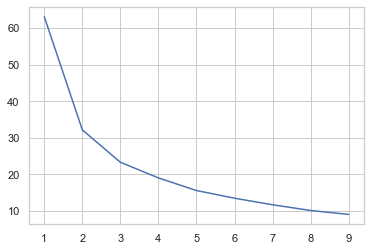

In [117]:
from sklearn.cluster import KMeans
 
A=dfelec_escalado
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [122]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random')
X=dfelec_escalado.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [123]:
kmeans.cluster_centers_

array([[ 5.55352701e-02,  2.03465286e-01],
       [ 1.38640801e-01, -5.55111512e-17],
       [ 9.60424388e-01,  9.73531812e-01]])

In [124]:
distance=kmeans.fit_transform(X)
distance

array([[8.91635914e-01, 2.96582126e-01, 4.21917663e-01],
       [1.35647808e+00, 2.07304251e-01, 1.22816109e-01],
       [1.34921747e+00, 2.05557598e-01, 1.12359653e-01],
       [5.78308183e-03, 1.18401193e+00, 1.27052562e+00],
       [1.20443888e+00, 1.64634914e-02, 2.17937905e-01],
       [1.18500302e+00, 1.37691316e-02, 2.33513820e-01],
       [1.24382083e+00, 5.57111553e-02, 2.12507926e-01],
       [1.21205571e+00, 2.73566695e-01, 9.97622185e-02],
       [1.20924548e+00, 2.76749193e-01, 1.04489760e-01],
       [6.08277983e-03, 1.19147184e+00, 1.27639034e+00],
       [1.19222577e+00, 4.07689594e-03, 2.19196290e-01],
       [1.20964125e+00, 2.76297496e-01, 1.03822754e-01],
       [1.25200631e+00, 6.38114742e-02, 2.09924353e-01],
       [2.61549469e-02, 1.16730222e+00, 1.25598078e+00],
       [6.32557323e-01, 5.55649282e-01, 6.57770447e-01],
       [1.39205579e-02, 1.17490743e+00, 1.26157092e+00],
       [1.34730865e+00, 2.05183111e-01, 1.09600556e-01],
       [1.21504980e+00, 2.68489

In [125]:
labels=kmeans.labels_
labels

array([1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0,
       2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1,
       1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1])

In [132]:
df_elec_cluster = dfelec
df_elec_cluster['ClustersElectricos'] = labels
df_elec_cluster

voltajeA    voltajeB    voltajeC  corrienteA  corrienteB  \
medidor                                                                
15029977  265.135933  267.446445  262.749819    0.592831    0.642152   
58706656  115.892625    0.000000  115.993247    0.586877    0.000000   
58706659  121.806061    0.000000  121.681543    0.945730    0.000000   
16567761  646.825966  655.005816  646.686385    0.564917    0.989007   
16567743  130.351915  131.182465  129.594833    0.596552    0.126957   
52073295  134.859176  145.129213  131.000000    0.037828    0.151311   
16951203  113.188466  114.299465  112.765293    1.664673    1.681204   
52073163  241.767280    0.000000    0.000000   32.971268    0.000000   
35924864  244.440845    0.000000    0.000000    1.585211    0.000000   
16951220  653.377586  653.587006  658.963188    2.954649    2.950019   
16567746  136.374277  135.437763  137.376968    1.497748    1.452087   
17548289  244.063634    0.000000    0.000000    1.000054    0.000000   
16567758  110.483201  109.581130  110.262352    0.755189    1.194170   
16567740  635.333360  653.624751  642.858211    1.504507    0.826175   
16951216  378.181863  378.331878  197.198366    0.509462    0.588115   
16567764  642.859514  651.099873  636.622304    1.045163    0.875201   
58706663  123.366412    0.000000  122.481679    0.620992    0.000000   
52073259  126.658125  125.329375  125.252500    0.556250    0.475625   
16951221  657.961792  653.504193  653.440567    2.534405    1.684117   
16951180  642.411897  651.107562  637.238687    1.399546    1.517974   
52073352  123.145149    0.000000  122.983955    0.316045    0.000000   
16951222  658.330666  653.582282  653.271475    1.881299    0.672599   
15029846  114.517834  108.377002  108.465714    2.304072    3.034337   
52073359  121.820000    0.000000  121.793200    0.178000    0.000000   
16567759  112.305557  119.037224  120.244328    0.471144    0.835134   
16951177  107.014244  106.095830  105.853545    1.937402    2.011326   
41175730  234.895669    0.000000    0.000000   44.003937    0.000000   
58706725  111.936145  110.927108  109.910843    0.584940    0.681024   
35924882  236.854941    0.000000    0.000000   44.759684    0.000000   
52073292  128.055200  128.550000  129.404000    0.329600    0.300800   
...              ...         ...         ...         ...         ...   
52071447  128.751383  130.358103  130.322925    0.243083    0.198814   
16567733  114.101775  109.513284  109.182750    1.065624    1.282470   
16951175  107.004751  106.094772  105.819590    0.616730    0.571198   
52073201  111.969231  124.310256  110.017094    0.231624    0.207692   
59814806  124.509237    0.000000  124.386345    0.893976    0.000000   
15029974  111.074371  108.936353  108.434914    1.265905    1.177736   
52073290  129.409649  128.114912  129.419298    0.951316    0.532456   
20037214  146.327860  144.517288  132.089719    0.310937    0.280951   
16951195  138.931408  140.141070  139.690740    0.675376    0.724361   
52073321  127.738544  129.619946  128.086792    2.111321    1.684636   
16567762  642.425525  652.109110  637.203831    1.045639    0.991222   
52073198  201.862500  113.592130  113.512963    1.167593    1.335648   
16951199  672.472996  672.600800  678.474870    0.098458    0.082696   
15842885  247.485006    0.000000    0.000000   14.176574    0.000000   
52073194  121.500787  119.955906  122.059843    1.912205    1.799606   
16951212  107.471152  109.366157  109.793923    0.791227    0.985599   
20037205  130.804189  129.440191  130.611817    1.889555    2.072810   
16951205  113.256347  114.294408  112.809963    1.567588    1.243630   
28006904  244.308560    0.000000    0.000000    2.022179    0.000000   
53307871  119.498268  119.399134  208.607359    0.976623    0.838961   
16951219  658.132845  653.618983  653.530250    2.066495    2.119724   
35924866  246.895495    0.000000    0.000000   13.700000    0.000000   
52073348  127.713095  128.991667  127.019048    1.38